<a href="https://colab.research.google.com/github/izzyasi/Churn-Analise-exploratoria/blob/main/Isabelly_Aprendizado_de_M%C3%A1quina_Churn_An%C3%A1lise_explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
########################################################################################################################

# Bank Churn Data Exploration And Churn Prediction = cancelamentos de cliente
##### Objetivo: fazer uma análise exploratória do dados

In [ ]:
########################################################################################################################

# Significado das colunas
##### CLIENTNUM: Client number. Unique identifier for the customer holding the account
##### Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
##### Customer_Age: Demographic variable - Customer's Age in Years
##### Gender: Demographic variable - M=Male, F=Female
##### Dependent_count: Demographic variable - Number of dependents
##### Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
##### Marital_Status: Demographic variable - Married, Single, Divorced, Unknown
##### Income_Category: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
##### Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
##### Months_on_book: Period of relationship with bank
##### Total_Relationship_Count: Total no. of products held by the customer
##### Months_Inactive_12_mon: No. of months inactive in the last 12 months
##### Contacts_Count_12_mon: No. of Contacts in the last 12 months
##### Credit_Limit: Credit Limit on the Credit Card:
##### Total_Revolving_Bal: Total Revolving Balance on the Credit Card
##### Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
##### Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
##### Total_Trans_Amt: Total Transaction Amount (Last 12 months)
##### Total_Trans_Ct: Total Transaction Count (Last 12 months)
##### Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
##### Avg_Utilization_Ratio: Average Card Utilization Ratio




# Importanto pacotes

In [ ]:
# Carrega a biblioteca pandas e atribui um alias chamado "pd"
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Deixar colunas e linhas aparentes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Conectando com o drive

In [ ]:
# Conexão com o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Leitura da tabela de dados

In [ ]:
# Faz a leitura do arquivo BankChurners.xlsx
df = pd.read_excel('/content/drive/MyDrive/BankChurners.xlsx')
df.shape

(10127, 21)

# Exercício treinamento

In [ ]:
#1. Escolha uma variável categórica e tire a frequência simples e relativa
     # a. Analise o resultado das frequências

# Frequência simples
df['Card_Category'].value_counts(dropna=False)

,count
Card_Category,
Blue,9436
Silver,555
Gold,116
Platinum,20


In [ ]:
#Frequência relativa (%)

df['Card_Category'].value_counts(normalize=True) * 100

,proportion
Card_Category,
Blue,93.176656
Silver,5.480399
Gold,1.145453
Platinum,0.197492


In [ ]:
#2. Crie um novo dataframe com 3 colunas numéricas e 2 categóricas
#a. Das variáveis numéricas calcule: média, mediana, moda e desvio padrão
#b. Das variáveis categóricas encontre as categorias mais e menos frequentes
#c. Analise o resultado dos itens a e b

df_num_cat = df[['Dependent_count','Credit_Limit','Total_Relationship_Count','Card_Category','Education_Level']]
df_num_cat.head(5)

,Dependent_count,Credit_Limit,Total_Relationship_Count,Card_Category,Education_Level
0,3,12691.0,5,Blue,High School
1,5,8256.0,6,Blue,Graduate
2,3,3418.0,4,Blue,Graduate
3,4,3313.0,3,Blue,High School
4,3,4716.0,5,Blue,Uneducated


In [ ]:
#a. Das variáveis numéricas calcule: média, mediana, moda e desvio padrão

df_num_cat = df[['Dependent_count','Credit_Limit','Total_Relationship_Count']].mean()

df_num_cat.head(5)

,0
Dependent_count,2.346203
Credit_Limit,8631.953698
Total_Relationship_Count,3.812580


In [ ]:
df_num_cat = df[['Dependent_count','Credit_Limit','Total_Relationship_Count']].median()

df_num_cat.head(5)

,0
Dependent_count,2.0
Credit_Limit,4549.0
Total_Relationship_Count,4.0


In [ ]:
df_num_cat = df[['Dependent_count','Credit_Limit','Total_Relationship_Count']].mode()

df_num_cat.head(5)

,Dependent_count,Credit_Limit,Total_Relationship_Count
0,3,34516.0,3


In [ ]:
df_num_cat = df[['Dependent_count','Credit_Limit','Total_Relationship_Count']].std()

df_num_cat.head(5)

,0
Dependent_count,1.298908
Credit_Limit,9088.776650
Total_Relationship_Count,1.554408


In [ ]:
#b. Das variáveis categóricas encontre as categorias mais e menos frequentes

df_num_cat = df[['Card_Category','Education_Level']].mode()

df_num_cat.head(5)

,Card_Category,Education_Level
0,Blue,Graduate


In [ ]:
df_num_cat = df[['Card_Category','Education_Level']].value_counts()

df_num_cat.tail(20100)

Card_Category  Education_Level
Platinum       Post-Graduate      3
               Uneducated         3
               Unknown            3
               Doctorate          2
               High School        1
Name: count, dtype: int64

In [ ]:
#3. Crie um novo dataframe apenas com o ID do cliente e o limite de crédito

df_id_credit = df[['CLIENTNUM','Credit_Limit']]
df_id_credit.head(5)

,CLIENTNUM,Credit_Limit
0,768805383,12691.0
1,818770008,8256.0
2,713982108,3418.0
3,769911858,3313.0
4,709106358,4716.0


# Checagem da tabela de dados

In [ ]:
# Mostra o número linhas, número de colunas
print('Shape do df original:', df.shape)

Shape do df original: (10127, 21)


In [ ]:
# Mostra o total de linhas do df
len(df)

10127

In [ ]:
# Primeiras cinco linhas do dataset
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1335.0,1144,42,1625.0,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1541.0,1291,33,3714.0,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2594.0,1887,20,2333.0,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1405.0,1171,20,2333.0,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2175.0,816,28,2.5,0.000


In [ ]:
# ultimas cinco linhas do dataset
df.tail(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [ ]:
# Cinco amostras aleatórias do dataset
df.sample(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7419,719740008,Attrited Customer,51,F,4,High School,Married,Less than $40K,Blue,41,3,3,4,2791.0,940,1851.0,0.813,2584,49,0.441,0.337
1402,710616183,Existing Customer,46,F,3,Uneducated,Single,Unknown,Blue,33,5,3,4,19995.0,0,19995.0,0.650,1879,34,0.700,0.000
1115,757266933,Existing Customer,52,M,2,Post-Graduate,Married,$60K - $80K,Blue,45,4,1,4,11819.0,929,10890.0,0.773,2431,46,0.484,0.079
6734,720210483,Existing Customer,43,F,3,High School,Unknown,Unknown,Blue,28,6,2,3,6720.0,2143,4577.0,0.814,5049,85,0.735,0.319
3819,778924158,Existing Customer,45,F,2,High School,Single,Less than $40K,Blue,26,4,3,4,1438.3,0,1438.3,0.710,3749,77,0.604,0.000


In [ ]:
# Informações do dataset como data type, quantidades, dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# Frequencia da coluna Income_Category
# Aqui mostra todas as possibilidades que existem na coluna com o número
#   de vezes que aparece
# df['Income_Category'].value_counts(dropna=False)

# OU

# A opção normalize=True mostra a distribuição %
df.Income_Category.value_counts(dropna=False, normalize=True)

,proportion
Income_Category,
Less than $40K,0.351634
$40K - $60K,0.176755
$80K - $120K,0.151575
$60K - $80K,0.138442
Unknown,0.109805
$120K +,0.071788


In [ ]:
# Apenas mostra as colunas do seu dataframe em ordem alfabética
# Não está alterando o seu dataframe
sorted(df.columns)

['Attrition_Flag',
 'Avg_Open_To_Buy',
 'Avg_Utilization_Ratio',
 'CLIENTNUM',
 'Card_Category',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Customer_Age',
 'Dependent_count',
 'Education_Level',
 'Gender',
 'Income_Category',
 'Marital_Status',
 'Months_Inactive_12_mon',
 'Months_on_book',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Ct_Chng_Q4_Q1',
 'Total_Relationship_Count',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Total_Trans_Ct']

In [ ]:
# Criando um dataset menor para facilitar
df_menor = df[[
 'Attrition_Flag',
 'Avg_Open_To_Buy',
 'Avg_Utilization_Ratio',
 'CLIENTNUM',
 'Card_Category',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Customer_Age',
 'Dependent_count',
 'Education_Level',
 'Gender',
 'Income_Category',
 'Marital_Status',
 'Months_Inactive_12_mon',
 'Months_on_book'
]]
df_menor.shape

(10127, 15)

In [ ]:
# Mostra o número de linhas do dataframe
len(df_menor)

10127

In [ ]:
# Mostra as 4 primeiras linhas do dataframe
df_menor.head(4)

,Attrition_Flag,Avg_Open_To_Buy,Avg_Utilization_Ratio,CLIENTNUM,Card_Category,Contacts_Count_12_mon,Credit_Limit,Customer_Age,Dependent_count,Education_Level,Gender,Income_Category,Marital_Status,Months_Inactive_12_mon,Months_on_book
0,Existing Customer,11914.0,0.061,768805383,Blue,3,12691.0,45,3,High School,M,$60K - $80K,Married,1,39
1,Existing Customer,7392.0,0.105,818770008,Blue,2,8256.0,49,5,Graduate,F,Less than $40K,Single,1,44
2,Existing Customer,3418.0,0.000,713982108,Blue,0,3418.0,51,3,Graduate,M,$80K - $120K,Married,1,36
3,Existing Customer,796.0,0.760,769911858,Blue,1,3313.0,40,4,High School,F,Less than $40K,Unknown,4,34


# Comando df.describe()
##### Estatísticas descritivas das variáveis (colunas numéricas)
##### count = total de registros
##### mean = média
##### std = desvio padrão
##### min = mínimo
##### 25% = 1o quartil
##### 50% = 2o quartil = mediana
##### 75% = 3o quartil
##### max = máximo


###################################
###################################
###################################


##### Estatísticas das variáveis (colunas object)
# Comando df.describe(include='object')
##### count = total de registros
##### unique = contagem de categorias únicas
##### top = categoria mais frequente
##### freq = frequencia da categoria mais frequente

In [ ]:
# Estatísticas do dataset
df_menor.describe()

,Avg_Open_To_Buy,Avg_Utilization_Ratio,CLIENTNUM,Contacts_Count_12_mon,Credit_Limit,Customer_Age,Dependent_count,Months_Inactive_12_mon,Months_on_book
count,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7469.139637,0.274894,7.391776e+08,2.455317,8631.953698,46.325960,2.346203,2.341167,35.928409
std,9090.685324,0.275691,3.690378e+07,1.106225,9088.776650,8.016814,1.298908,1.010622,7.986416
min,3.000000,0.000000,7.080821e+08,0.000000,1438.300000,26.000000,0.000000,0.000000,13.000000
25%,1324.500000,0.023000,7.130368e+08,2.000000,2555.000000,41.000000,1.000000,2.000000,31.000000
50%,3474.000000,0.176000,7.179264e+08,2.000000,4549.000000,46.000000,2.000000,2.000000,36.000000
75%,9859.000000,0.503000,7.731435e+08,3.000000,11067.500000,52.000000,3.000000,3.000000,40.000000
max,34516.000000,0.999000,8.283431e+08,6.000000,34516.000000,73.000000,5.000000,6.000000,56.000000


In [ ]:
# Estatísticas de colunas categoricas, a inclusão de 'o' ou 'object'
# df_menor.describe(include='o')
df_menor.describe(include='object')

,Attrition_Flag,Card_Category,Education_Level,Gender,Income_Category,Marital_Status
count,10127,10127,10127,10127,10127,10127
unique,2,4,7,2,6,4
top,Existing Customer,Blue,Graduate,F,Less than $40K,Married
freq,8500,9436,3128,5358,3561,4687


In [ ]:
df['Education_Level'].value_counts(dropna=False)

,count
Education_Level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [ ]:
# Média da variável Credit_Limit
df_menor['Credit_Limit'].mean()

8631.953698034955

In [ ]:
# Soma da variável Credit_Limit
df_menor['Credit_Limit'].sum()

87415795.1

In [ ]:
# Cálculo da média pela fórmula
df_menor['Credit_Limit'].sum()/len(df_menor)

8631.953698034955

In [ ]:
87415795.1/10127

8631.953698034955

In [ ]:
# Desvio padrão da variável Credit_Limit
df_menor['Credit_Limit'].std()

9088.776650223155

In [ ]:
# Contagem da variável Credit_Limit
df_menor['Credit_Limit'].count()

10127

In [ ]:
# Moda da variável Credit_Limit
df_menor['Credit_Limit'].mode()

,Credit_Limit
0,34516.0


In [ ]:
# Mediana da variável Credit_Limit
df_menor['Credit_Limit'].median()

4549.0

In [ ]:
# Menor valor da variável Credit_Limit
df_menor['Credit_Limit'].min()

1438.3

In [ ]:
# Maior valor da variável LotArea
df_menor['Credit_Limit'].max()

34516.0

In [ ]:
# Média de todas as colunas numericas
df_menor.mean()

TypeError: Could not convert ['Existing CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited Customer'
 'BlueBlueBlueBlueBlueBlueGoldSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBluePlatinumBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueGoldBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBluePlatinumBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueSilverBlueBlueBlueGoldSilverSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueSilverBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueSilverBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBluePlatinumBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverSilverBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverGoldBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBluePlatinumBlueBlueBlueSilverBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueGoldBlueSilverBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueSilverSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverGoldGoldBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueSilverSilverGoldSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueGoldGoldSilverBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverGoldGoldBlueBlueBlueSilverSilverBlueSilverSilverSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverBlueBlueBluePlatinumBlueBlueBlueBlueBlueBlueBlueBlueGoldSilverBlueBlueBlueBlueBlueSilverBlueBlueSilverGoldBlueBlueBlueGoldBlueBlueBlueGoldBlueBlueBlueBlueBluePlatinumBlueBlueBlueBlueBlueBlueGoldBlueBlueSilverBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverGoldBlueBlueSilverBlueBlueBlueSilverBlueBlueSilverBlueBlueGoldBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueBlueGoldBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueSilverSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverBlueGoldBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueGoldBlueBlueSilverGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueGoldBlueBlueBlueBlueSilverBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverPlatinumSilverBluePlatinumBlueGoldBlueSilverSilverBluePlatinumSilverBlueSilverBlueGoldSilverBlueSilverBlueBlueSilverSilverSilverBlueBlueBlueBlueSilverBlueSilverBlueBlueBluePlatinumSilverBlueBlueBlueGoldBlueSilverBlueBlueBluePlatinumBlueBlueSilverSilverBlueBlueBlueBlueBlueBlueBlueBlueBluePlatinumBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverSilverBlueBlueBlueBlueSilverBlueBlueBlueSilverSilverBlueSilverGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBluePlatinumBlueBlueBlueBlueSilverBlueSilverSilverBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueGoldBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueSilverBlueBlueBlueGoldBlueSilverBlueBlueSilverBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueGoldBlueBlueBlueSilverBlueBlueBlueSilverSilverBlueBlueSilverBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueSilverBlueBlueSilverBlueBlueSilverBlueBlueBlueBluePlatinumGoldBlueSilverSilverBlueBlueBlueSilverSilverBlueBlueBluePlatinumBlueBlueGoldSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueGoldBlueBlueSilverSilverBlueGoldSilverBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueBlueBlueGoldBlueSilverBlueSilverBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueSilverGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueGoldSilverBlueBlueBlueGoldBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueSilverSilverSilverBlueBlueBlueSilverPlatinumSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverPlatinumBlueBlueSilverBlueBlueBlueSilverBlueSilverBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueBlueBlueBlueSilverGoldGoldBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBluePlatinumSilverBlueBlueBlueBlueGoldBlueBlueBlueGoldSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueGoldBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueSilverBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueSilverBlueSilverBlueBlueSilverBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueSilverBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverPlatinumBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverBlueBlueBlueBlueGoldBlueBlueBlueSilverBlueBlueSilverBlueSilverBluePlatinumBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueSilverBlueGoldSilverBlueBlueBlueBlueBlueBlueSilverBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueGoldBlueBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverGoldBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueBlueSilverBlueSilverSilverBlueBlueBlueBlueBlueSilverBlueSilverBlueGoldBlueBlueBlueBlueBlueGoldBlueSilverBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueGoldBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueBlueSilverBlueBlueBlueBlueBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueGoldBlueSilverBlueBlueBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverSilverBlueBlueSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueBlueSilverBlueBlueGoldSilverBlueSilverBlueBlueBlueBlueBlueBlueBlueBlueBlueSilverBlueSilverBlueBlueBlueSilverBlueBlueBlueBlueBlueSilverBlueGoldBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueBlueSilver'
 'High SchoolGraduateGraduateHigh SchoolUneducatedGraduateUnknownHigh SchoolUneducatedGraduateUneducatedUnknownCollegeGraduateGraduateUnknownPost-GraduateUnknownHigh SchoolGraduateDoctorateGraduateHigh SchoolUnknownUnknownGraduateHigh SchoolUnknownUneducatedHigh SchoolUnknownUneducatedGraduateCollegeGraduateCollegeGraduateHigh SchoolGraduateDoctorateGraduateUnknownCollegeHigh SchoolGraduateUneducatedDoctorateDoctorateHigh SchoolCollegeUnknownGraduateHigh SchoolUnknownGraduateGraduateGraduateUneducatedGraduateHigh SchoolUnknownGraduateHigh SchoolPost-GraduateHigh SchoolUneducatedCollegeUneducatedGraduateDoctorateGraduateGraduateGraduateUneducatedCollegeGraduateGraduateUneducatedGraduateGraduateGraduateUnknownUnknownGraduateGraduateGraduateHigh SchoolUneducatedHigh SchoolUnknownHigh SchoolHigh SchoolGraduateGraduateUnknownGraduateGraduateDoctorateCollegeUnknownCollegeUnknownGraduateGraduateHigh SchoolPost-GraduatePost-GraduateUneducatedUnknownUnknownGraduateUnknownHigh SchoolUneducatedGraduateGraduateHigh SchoolHigh SchoolDoctorateHigh SchoolGraduateDoctorateHigh SchoolHigh SchoolCollegeGraduateGraduateGraduateHigh SchoolUneducatedGraduateUnknownGraduateGraduateDoctorateGraduateHigh SchoolCollegeCollegePost-GraduateHigh SchoolUnknownGraduateGraduateCollegeUneducatedGraduateGraduateGraduateHigh SchoolHigh SchoolGraduateGraduateUneducatedCollegeUnknownHigh SchoolDoctorateUneducatedGraduateHigh SchoolCollegeUneducatedUnknownUneducatedUneducatedUneducatedUneducatedGraduateHigh SchoolUneducatedHigh SchoolUnknownHigh SchoolHigh SchoolGraduateUneducatedGraduateUneducatedUneducatedUneducatedGraduateUneducatedGraduateGraduateUneducatedPost-GraduateCollegeHigh SchoolPost-GraduateGraduateGraduateGraduateDoctoratePost-GraduateHigh SchoolHigh SchoolUneducatedHigh SchoolCollegeUnknownGraduateCollegeGraduateGraduateHigh SchoolGraduatePost-GraduateGraduateCollegeHigh SchoolUnknownGraduateHigh SchoolHigh SchoolCollegeGraduateUnknownHigh SchoolUneducatedUnknownUneducatedGraduateGraduateGraduateHigh SchoolCollegeUneducatedGraduateGraduateUneducatedUnknownGraduatePost-GraduateCollegeCollegeUneducatedGraduateUneducatedUnknownUnknownHigh SchoolCollegeCollegeGraduateUneducatedDoctorateHigh SchoolGraduateDoctoratePost-GraduateHigh SchoolUnknownHigh SchoolHigh SchoolHigh SchoolUnknownUneducatedUneducatedGraduateCollegePost-GraduateUnknownUnknownUneducatedGraduateUnknownGraduateHigh SchoolGraduateUnknownUneducatedUneducatedGraduateHigh SchoolUneducatedGraduateUneducatedUneducatedHigh SchoolGraduateHigh SchoolUneducatedHigh SchoolGraduateUneducatedHigh SchoolGraduateGraduateDoctorateGraduateDoctorateDoctorateGraduateCollegeHigh SchoolHigh SchoolHigh SchoolHigh SchoolHigh SchoolHigh SchoolUneducatedPost-GraduateCollegeUneducatedGraduateHigh SchoolGraduateGraduateUneducatedHigh SchoolGraduateUneducatedGraduateGraduateGraduateHigh SchoolUnknownHigh SchoolHigh SchoolGraduateGraduateUneducatedHigh SchoolUneducatedHigh SchoolUneducatedPost-GraduatePost-GraduateUnknownGraduateGraduateUneducatedGraduateGraduateHigh SchoolGraduateUnknownHigh SchoolHigh SchoolGraduateUneducatedGraduateUneducatedHigh SchoolGraduateHigh SchoolHigh SchoolHigh SchoolUneducatedGraduateHigh SchoolGraduateGraduateUneducatedGraduateUneducatedUneducatedGraduateUneducatedUneducatedGraduateHigh SchoolGraduateGraduateUnknownGraduateGraduateGraduateHigh SchoolUneducatedUnknownGraduateHigh SchoolHigh SchoolPost-GraduateHigh SchoolGraduateUneducatedHigh SchoolGraduateGraduateUneducatedHigh SchoolHigh SchoolGraduatePost-GraduateGraduateUnknownGraduateGraduateCollegeHigh SchoolUnknownPost-GraduateUneducatedGraduateCollegeHigh SchoolUneducatedUneducatedUneducatedCollegeUnknownHigh SchoolGraduateCollegeGraduateCollegeGraduateUneducatedGraduatePost-GraduateUnknownHigh SchoolPost-GraduateGraduateUnknownUneducatedUnknownGraduateGraduateHigh SchoolGraduateCollegeHigh SchoolUneducatedHigh SchoolHigh SchoolUnknownGraduateUnknownUnknownCollegeHigh SchoolGraduateUneducatedUnknownDoctorateUnknownUnknownGraduateGraduateGraduateCollegeGraduateGraduateUneducatedGraduateUnknownHigh SchoolGraduateUnknownUneducatedHigh SchoolUneducatedUneducatedPost-GraduateHigh SchoolGraduateGraduateUnknownUneducatedPost-GraduateGraduatePost-GraduateGraduateUneducatedUnknownUneducatedPost-GraduateDoctorateUneducatedCollegeGraduatePost-GraduateHigh SchoolGraduateHigh SchoolUnknownUneducatedGraduateGraduatePost-GraduateGraduateHigh SchoolGraduateGraduateCollegeCollegeHigh SchoolHigh SchoolUneducatedCollegeGraduateHigh SchoolUnknownCollegeUnknownCollegeGraduateHigh SchoolCollegeCollegeUneducatedHigh SchoolPost-GraduatePost-GraduateHigh SchoolUneducatedUneducatedUnknownHigh SchoolGraduateGraduateCollegeGraduateGraduateGraduateUnknownUnknownGraduateCollegeHigh SchoolHigh SchoolUneducatedGraduateUnknownHigh SchoolHigh SchoolGraduateCollegeHigh SchoolUnknownDoctorateDoctorateHigh SchoolGraduateUnknownGraduateHigh SchoolCollegeGraduatePost-GraduateCollegeGraduateGraduateUnknownPost-GraduateHigh SchoolUneducatedUnknownUnknownCollegeGraduateUnknownGraduateGraduateCollegeHigh SchoolGraduateUneducatedDoctorateGraduateCollegeGraduateGraduateHigh SchoolUnknownUneducatedUneducatedCollegeHigh SchoolUnknownGraduateGraduateDoctorateDoctorateHigh SchoolCollegeCollegeHigh SchoolHigh SchoolUnknownHigh SchoolGraduateUnknownGraduateGraduateUneducatedDoctorateUneducatedHigh SchoolUneducatedDoctorateUneducatedUneducatedUnknownUnknownUnknownDoctorateHigh SchoolUneducatedGraduateGraduateCollegeGraduateGraduatePost-GraduateGraduateHigh SchoolUnknownGraduateCollegeGraduateCollegeGraduateGraduateHigh SchoolHigh SchoolPost-GraduateHigh SchoolGraduateUnknownCollegePost-GraduateDoctorateCollegeGraduateUnknownGraduateGraduateGraduateHigh SchoolUneducatedCollegeGraduateGraduateGraduateUnknownGraduateHigh SchoolGraduateHigh SchoolUnknownUneducatedGraduatePost-GraduateHigh SchoolGraduatePost-GraduateGraduateUneducatedHigh SchoolCollegeUneducatedGraduateUnknownGraduateGraduateUneducatedGraduateDoctorateGraduateGraduateHigh SchoolHigh SchoolUnknownGraduatePost-GraduateUneducatedUnknownUneducatedHigh SchoolCollegeHigh SchoolHigh SchoolHigh SchoolGraduateUneducatedDoctoratePost-GraduateGraduateHigh SchoolCollegeDoctorateHigh SchoolHigh SchoolUneducatedHigh SchoolGraduateGraduateUnknownGraduateGraduateUneducatedHigh SchoolHigh SchoolGraduateCollegeUneducatedUnknownCollegeUneducatedDoctorateGraduateHigh SchoolUneducatedGraduateGraduatePost-GraduateGraduateHigh SchoolUnknownHigh SchoolGraduateGraduateUnknownUnknownUneducatedCollegeCollegeHigh SchoolPost-GraduateUnknownUnknownUnknownUnknownUnknownUneducatedPost-GraduateDoctorateGraduateGraduateCollegeHigh SchoolUnknownCollegeUneducatedPost-GraduateUnknownHigh SchoolHigh SchoolHigh SchoolUneducatedCollegePost-GraduateUnknownGraduateUneducatedUnknownHigh SchoolGraduateUnknownUnknownGraduateCollegeUneducatedUnknownCollegeUnknownUneducatedGraduateDoctorateUneducatedHigh SchoolHigh SchoolDoctoratePost-GraduateDoctorateUnknownUneducatedDoctoratePost-GraduateCollegeHigh SchoolGraduateGraduateUnknownHigh SchoolDoctorateHigh SchoolUnknownUnknownUnknownDoctorateHigh SchoolPost-GraduatePost-GraduateHigh SchoolUnknownGraduateUnknownGraduatePost-GraduateHigh SchoolUnknownUnknownUnknownCollegeUnknownHigh SchoolUnknownHigh SchoolUneducatedPost-GraduateUneducatedHigh SchoolGraduateUneducatedGraduateUnknownGraduateHigh SchoolGraduateGraduateHigh SchoolUneducatedCollegeUnknownGraduateHigh SchoolGraduateGraduateGraduateHigh SchoolHigh SchoolGraduateUnknownUnknownGraduateCollegeGraduateUnknownGraduateHigh SchoolGraduateCollegeUneducatedGraduateGraduateUnknownCollegeCollegeHigh SchoolPost-GraduateHigh SchoolUneducatedUnknownUnknownDoctorateUnknownCollegeUnknownUneducatedGraduateUnknownUneducatedUneducatedUnknownUnknownHigh SchoolGraduateHigh SchoolHigh SchoolHigh SchoolUnknownGraduatePost-GraduateCollegeGraduateUnknownCollegeGraduateUneducatedDoctorateCollegeGraduateCollegeGraduateCollegeHigh SchoolHigh SchoolGraduateGraduateUnknownHigh SchoolHigh SchoolGraduateGraduateGraduateHigh SchoolGraduateUneducatedGraduateUnknownHigh SchoolCollegeGraduateGraduateCollegeUnknownUnknownUneducatedUnknownUneducatedHigh SchoolUnknownHigh SchoolUneducatedGraduateHigh SchoolGraduateUneducatedCollegeHigh SchoolUneducatedHigh SchoolCollegePost-GraduateHigh SchoolHigh SchoolGraduateUnknownGraduateUneducatedCollegeGraduateHigh SchoolGraduateGraduateUnknownUnknownUneducatedDoctorateUneducatedGraduateHigh SchoolHigh SchoolGraduateUneducatedUneducatedHigh SchoolHigh SchoolCollegeCollegeHigh SchoolGraduateHigh SchoolCollegeUneducatedGraduateHigh SchoolGraduateUnknownPost-GraduatePost-GraduateHigh SchoolGraduatePost-GraduateHigh SchoolUnknownUnknownCollegeHigh SchoolHigh SchoolHigh SchoolUneducatedGraduateGraduateCollegeHigh SchoolGraduateGraduateGraduatePost-GraduateDoctorateUnknownHigh SchoolHigh SchoolDoctorateHigh SchoolGraduateGraduateHigh SchoolUneducatedGraduateGraduateGraduateGraduateCollegeGraduateHigh SchoolHigh SchoolGraduateGraduateUneducatedPost-GraduateUneducatedUneducatedHigh SchoolHigh SchoolCollegeUnknownGraduateDoctorateGraduateCollegeGraduateUneducatedUneducatedUneducatedGraduateCollegeHigh SchoolHigh SchoolHigh SchoolPost-GraduateHigh SchoolGraduateHigh SchoolCollegeUnknownPost-GraduateGraduateGraduateGraduateUneducatedUneducatedUneducatedGraduateGraduateGraduateHigh SchoolGraduateGraduateHigh SchoolPost-GraduateGraduatePost-GraduateGraduateHigh SchoolGraduateGraduateUnknownGraduateGraduateHigh SchoolPost-GraduateGraduateUneducatedUneducatedCollegeGraduateCollegeGraduateUneducatedGraduateGraduateHigh SchoolGraduateHigh SchoolHigh SchoolHigh SchoolGraduateGraduateGraduateUnknownHigh SchoolGraduateUnknownHigh SchoolGraduatePost-GraduateHigh SchoolGraduateUnknownHigh SchoolGraduateGraduateGraduateGraduatePost-GraduateUneducatedUnknownGraduateUnknownGraduateCollegeHigh SchoolHigh SchoolUnknownCollegePost-GraduateGraduateDoctorateGraduateGraduateCollegeHigh SchoolDoctorateGraduateCollegeGraduateDoctorateGraduateGraduateHigh SchoolHigh SchoolPost-GraduateHigh SchoolUnknownGraduateGraduateGraduatePost-GraduateHigh SchoolGraduateHigh SchoolHigh SchoolGraduatePost-GraduatePost-GraduateHigh SchoolHigh SchoolUnknownGraduateUnknownGraduateGraduateUneducatedHigh SchoolHigh SchoolDoctorateGraduateHigh SchoolUneducatedGraduateGraduateGraduateHigh SchoolHigh SchoolUnknownUneducatedHigh SchoolGraduateUnknownHigh SchoolUnknownDoctoratePost-GraduateGraduateUneducatedHigh SchoolPost-GraduateUneducatedUneducatedPost-GraduateCollegeHigh SchoolUneducatedCollegeUnknownGraduateHigh SchoolDoctorateGraduateGraduateUnknownCollegePost-GraduateGraduateGraduateUnknownCollegePost-GraduateCollegeUnknownCollegeUneducatedGraduateGraduateHigh SchoolUnknownUnknownHigh SchoolHigh SchoolGraduateGraduateCollegeHigh SchoolGraduateHigh SchoolHigh SchoolHigh SchoolGraduateGraduateHigh SchoolGraduateCollegeHigh SchoolUnknownUneducatedGraduateHigh SchoolUnknownGraduateGraduateDoctorateCollegeUneducatedHigh SchoolUnknownUnknownUneducatedGraduateGraduateHigh SchoolGraduateGraduateHigh SchoolUnknownHigh SchoolCollegeUneducatedHigh SchoolUneducatedCollegeHigh SchoolCollegeCollegeHigh SchoolUneducatedCollegeHigh SchoolGraduateUnknownGraduateDoctorateUneducatedUneducatedUnknownDoctorateDoctorateHigh SchoolGraduateUnknownGraduateGraduateUneducatedCollegeCollegeUneducatedPost-GraduateUneducatedCollegeHigh SchoolGraduateUnknownCollegeGraduateHigh SchoolUnknownHigh SchoolHigh SchoolGraduateHigh SchoolGraduateUneducatedGraduateUneducatedHigh SchoolUneducatedPost-GraduateGraduateHigh SchoolGraduateUnknownHigh SchoolCollegeUnknownCollegeUneducatedGraduateGraduateCollegeHigh SchoolUneducatedGraduateHigh SchoolHigh SchoolUneducatedGraduateHigh SchoolHigh SchoolUnknownUnknownHigh SchoolHigh SchoolUneducatedHigh SchoolGraduateUneducatedHigh SchoolHigh SchoolCollegeUneducatedUnknownGraduateCollegeHigh SchoolGraduateUnknownUneducatedHigh SchoolGraduateCollegeHigh SchoolUneducatedGraduateHigh SchoolGraduatePost-GraduateUnknownGraduateHigh SchoolHigh SchoolUneducatedGraduateGraduateGraduateGraduateUneducatedCollegeGraduateUneducatedGraduateUnknownHigh SchoolHigh SchoolGraduateGraduateUneducatedHigh SchoolHigh SchoolCollegeGraduateUnknownGraduateGraduateUnknownUneducatedGraduateGraduateGraduateGraduateGraduateHigh SchoolHigh SchoolHigh SchoolGraduateGraduateGraduateHigh SchoolGraduateGraduateHigh SchoolPost-GraduateHigh SchoolUneducatedUnknownCollegeUnknownGraduateUnknownUneducatedGraduateGraduateCollegeUnknownGraduateGraduateGraduateUnknownHigh SchoolUneducatedHigh SchoolPost-GraduateGraduateUnknownHigh SchoolUnknownGraduateGraduateCollegeGraduateCollegeUneducatedHigh SchoolGraduateCollegeUnknownUneducatedPost-GraduateGraduateGraduateHigh SchoolGraduateUneducatedHigh SchoolPost-GraduateGraduateGraduateUnknownHigh SchoolCollegeDoctorateGraduateUneducatedUnknownHigh SchoolUneducatedCollegeDoctorateUnknownUneducatedGraduateUneducatedHigh SchoolHigh SchoolGraduateGraduateGraduateHigh SchoolHigh SchoolGraduateCollegeGraduateUneducatedGraduateUnknownUneducatedGraduateGraduateGraduateHigh SchoolUneducatedGraduateUneducatedPost-GraduateGraduateCollegeUneducatedUneducatedGraduateDoctorateUnknownCollegePost-GraduateGraduateGraduateUnknownHigh SchoolHigh SchoolGraduateHigh SchoolGraduateUneducatedGraduateUneducatedHigh SchoolCollegeHigh SchoolGraduatePost-GraduateHigh SchoolUneducatedGraduatePost-GraduateUnknownUnknownGraduateUnknownHigh SchoolPost-GraduatePost-GraduateGraduateGraduateGraduateHigh SchoolCollegeHigh SchoolHigh SchoolGraduateDoctorateHigh SchoolDoctorateUnknownPost-GraduateUneducatedHigh SchoolHigh SchoolGraduateUnknownGraduateGraduateUneducatedPost-GraduateUnknownUneducatedHigh SchoolHigh SchoolGraduateGraduateHigh SchoolGraduateUnknownGraduatePost-GraduateHigh SchoolDoctorateDoctorateHigh SchoolCollegeHigh SchoolHigh SchoolUnknownUnknownUneducatedGraduateCollegeUnknownDoctorateGraduateGraduateHigh SchoolGraduateUnknownHigh SchoolGraduateGraduateGraduateHigh SchoolCollegeUneducatedGraduateUnknownUnknownUnknownCollegeGraduatePost-GraduateCollegeUneducatedHigh SchoolGraduateUnknownPost-GraduatePost-GraduateHigh SchoolUnknownCollegeGraduateGraduateHigh SchoolGraduateCollegeHigh SchoolGraduateHigh SchoolUnknownUneducatedUneducatedHigh SchoolCollegeGraduatePost-GraduateCollegeGraduateUneducatedGraduateHigh SchoolGraduateGraduateCollegeHigh SchoolGraduateDoctorateGraduateUnknownCollegeGraduateUnknownUnknownGraduateUnknownHigh SchoolHigh SchoolGraduateHigh SchoolGraduateDoctorateCollegeUneducatedPost-GraduateCollegeCollegeUnknownUnknownGraduateGraduateUneducatedGraduateUneducatedGraduateUnknownUnknownGraduateHigh SchoolHigh SchoolUneducatedGraduateHigh SchoolUnknownCollegeCollegeUnknownGraduateGraduateGraduateCollegePost-GraduateGraduateUneducatedHigh SchoolHigh SchoolGraduateGraduateGraduateHigh SchoolUneducatedCollegeDoctorateCollegeGraduateHigh SchoolUnknownUnknownGraduateHigh SchoolGraduateGraduateGraduateCollegeHigh SchoolHigh SchoolGraduateGraduateGraduateUnknownCollegeUnknownGraduateUnknownCollegeGraduateGraduateGraduateHigh SchoolHigh SchoolGraduateHigh SchoolUnknownUnknownUneducatedCollegeGraduateCollegeHigh SchoolPost-GraduateGraduateCollegeGraduateCollegeUneducatedGraduateGraduatePost-GraduateCollegeGraduateUnknownHigh SchoolGraduateCollegeGraduateDoctorateHigh SchoolHigh SchoolGraduateUnknownGraduateGraduateGraduateHigh SchoolHigh SchoolGraduateCollegeCollegeGraduateGraduateUnknownGraduateUnknownUnknownGraduateGraduateUneducatedGraduatePost-GraduateDoctorateUnknownGraduateCollegeGraduateUnknownDoctorateUnknownGraduateUnknownGraduateHigh SchoolUnknownGraduateHigh SchoolGraduateGraduateUnknownGraduateUneducatedGraduateUnknownUneducatedCollegeUneducatedHigh SchoolGraduateUneducatedGraduateUneducatedUneducatedPost-GraduateHigh SchoolUneducatedHigh SchoolUnknownUneducatedGraduateHigh SchoolUnknownUnknownGraduateUneducatedHigh SchoolCollegeHigh SchoolGraduateGraduateUneducatedGraduateUnknownUneducatedUneducatedUneducatedUneducatedUnknownHigh SchoolUneducatedCollegeUneducatedGraduateCollegeUneducatedHigh SchoolCollegeHigh SchoolCollegeHigh SchoolUneducatedGraduateUneducatedHigh SchoolGraduateHigh SchoolGraduateCollegeUnknownHigh SchoolGraduateHigh SchoolUneducatedHigh SchoolUnknownGraduatePost-GraduateGraduateDoctorateHigh SchoolHigh SchoolUneducatedPost-GraduateUneducatedGraduatePost-GraduateGraduateGraduateGraduateGraduateGraduatePost-GraduateUneducatedUnknownHigh SchoolUnknownCollegeUnknownGraduateGraduateUneducatedPost-GraduateGraduateGraduateUnknownGraduateGraduateHigh SchoolGraduatePost-GraduateUnknownGraduateUnknownHigh SchoolGraduateHigh SchoolUneducatedGraduateGraduateHigh SchoolDoctorateGraduateHigh SchoolPost-GraduatePost-GraduateUneducatedCollegeGraduatePost-GraduateHigh SchoolUnknownGraduateCollegeUneducatedUneducatedPost-GraduateGraduateGraduateHigh SchoolGraduateHigh SchoolUneducatedGraduateUnknownHigh SchoolUneducatedUneducatedHigh SchoolCollegeGraduateHigh SchoolCollegeGraduateGraduateHigh SchoolCollegeCollegeUnknownHigh SchoolUneducatedCollegeHigh SchoolUnknownHigh SchoolPost-GraduateCollegeUneducatedGraduateGraduateUnknownHigh SchoolGraduateGraduateCollegeGraduateCollegeGraduateGraduateGraduateHigh SchoolHigh SchoolHigh SchoolGraduateCollegeHigh SchoolGraduateUneducatedHigh SchoolHigh SchoolGraduateHigh SchoolDoctorateHigh SchoolGraduateGraduateUneducatedGraduateUnknownGraduateCollegeGraduateHigh SchoolGraduateGraduateGraduateGraduateGraduateUnknownGraduateUnknownGraduateGraduateCollegeGraduateHigh SchoolHigh SchoolGraduateUnknownHigh SchoolCollegeGraduateGraduateHigh SchoolUneducatedCollegeHigh SchoolGraduateGraduateUnknownUnknownUnknownHigh SchoolGraduateGraduateHigh SchoolPost-GraduateUneducatedUneducatedUnknownGraduateDoctorateHigh SchoolGraduateHigh SchoolGraduateHigh SchoolHigh SchoolUnknownUnknownUneducatedUneducatedGraduateHigh SchoolGraduateUnknownGraduateUnknownHigh SchoolGraduateHigh SchoolGraduateHigh SchoolDoctorateUnknownUneducatedHigh SchoolCollegeCollegeGraduateCollegeHigh SchoolUneducatedPost-GraduateUneducatedGraduateUnknownUnknownUneducatedUneducatedCollegeCollegeGraduateGraduateHigh SchoolGraduateUnknownGraduateCollegeGraduateGraduateGraduateGraduateCollegeUnknownGraduateUnknownGraduateGraduateGraduateGraduateGraduateUneducatedGraduateGraduateCollegeGraduateGraduateUneducatedUneducatedHigh SchoolGraduateDoctorateHigh SchoolCollegeCollegeGraduateDoctorateUneducatedGraduateUneducatedHigh SchoolUneducatedUnknownHigh SchoolCollegeDoctorateCollegeCollegeUneducatedGraduateHigh SchoolUneducatedGraduateHigh SchoolUnknownGraduateHigh SchoolGraduateGraduateUnknownUneducatedUnknownHigh SchoolUnknownUneducatedGraduateGraduateHigh SchoolHigh SchoolGraduateUneducatedHigh SchoolGraduatePost-GraduateGraduateGraduateHigh SchoolUneducatedHigh SchoolGraduateHigh SchoolUneducatedGraduateUnknownGraduateGraduateGraduateCollegeHigh SchoolUneducatedGraduatePost-GraduateGraduateHigh SchoolDoctorateUnknownUneducatedUneducatedHigh SchoolPost-GraduateHigh SchoolGraduateGraduateDoctorateGraduateGraduateGraduateUneducatedUneducatedUneducatedGraduateHigh SchoolGraduatePost-GraduateHigh SchoolUnknownGraduateGraduateGraduateHigh SchoolCollegeUneducatedHigh SchoolHigh SchoolUnknownGraduateGraduateHigh SchoolHigh SchoolUnknownGraduateHigh SchoolCollegeCollegeHigh SchoolGraduateHigh SchoolDoctorateUneducatedGraduateCollegeUneducatedHigh SchoolPost-GraduateHigh SchoolUnknownGraduateCollegeGraduateUneducatedHigh SchoolUneducatedHigh SchoolUneducatedUneducatedHigh SchoolCollegeGraduateUnknownHigh SchoolHigh SchoolGraduateUneducatedHigh SchoolUnknownUneducatedHigh SchoolUneducatedCollegeUneducatedGraduateUnknownCollegeHigh SchoolGraduateCollegeHigh SchoolUneducatedGraduateCollegeUneducatedUneducatedUneducatedUneducatedPost-GraduatePost-GraduateDoctorateUnknownDoctorateHigh SchoolCollegeGraduateGraduateUnknownCollegeCollegeHigh SchoolGraduateGraduateHigh SchoolCollegeUneducatedCollegeDoctorateCollegeCollegeHigh SchoolGraduateUnknownHigh SchoolUneducatedHigh SchoolUnknownDoctorateGraduateCollegeDoctorateHigh SchoolUneducatedGraduateGraduateGraduateUneducatedGraduateUnknownUneducatedHigh SchoolUneducatedUnknownGraduateGraduateGraduateUneducatedHigh SchoolHigh SchoolCollegeCollegeCollegeGraduateGraduateHigh SchoolGraduateGraduateUneducatedDoctorateHigh SchoolGraduateGraduateHigh SchoolDoctorateGraduateUneducatedPost-GraduateDoctorateGraduateHigh SchoolUneducatedGraduateGraduateUnknownHigh SchoolUneducatedGraduateUnknownDoctorateUneducatedUneducatedGraduateUnknownHigh SchoolUneducatedGraduateGraduateUneducatedUnknownGraduateGraduateHigh SchoolUneducatedCollegeCollegeGraduatePost-GraduateGraduateGraduateUneducatedHigh SchoolCollegeUnknownGraduateGraduateUnknownGraduateUnknownHigh SchoolUneducatedGraduatePost-GraduateGraduateGraduateHigh SchoolUnknownUnknownDoctorateHigh SchoolUneducatedGraduateGraduateHigh SchoolHigh SchoolUneducatedGraduateGraduateGraduateUneducatedGraduateUneducatedGraduatePost-GraduateHigh SchoolGraduateGraduateHigh SchoolDoctorateHigh SchoolHigh SchoolDoctorateHigh SchoolUnknownUnknownGraduateGraduateCollegeUnknownUnknownGraduateUneducatedUnknownGraduateHigh SchoolUnknownUneducatedGraduateCollegeGraduatePost-GraduateUnknownUnknownGraduateCollegeCollegeHigh SchoolGraduateCollegeUneducatedUneducatedUneducatedUnknownCollegeHigh SchoolHigh SchoolGraduateUnknownGraduateCollegeHigh SchoolPost-GraduateHigh SchoolGraduateGraduateUneducatedDoctorateGraduateHigh SchoolGraduateHigh SchoolHigh SchoolUnknownUneducatedUnknownCollegeGraduateDoctorateGraduateGraduateGraduateDoctorateUnknownUneducatedGraduateHigh SchoolCollegeGraduateGraduateHigh SchoolHigh SchoolCollegeHigh SchoolUnknownGraduateCollegeDoctorateCollegeGraduateUneducatedUnknownGraduateGraduateDoctorateUneducatedGraduateHigh SchoolHigh SchoolGraduateUnknownGraduateGraduateUneducatedPost-GraduateUneducatedHigh SchoolCollegeHigh SchoolUneducatedUnknownGraduateGraduateCollegeGraduateCollegeCollegeHigh SchoolGraduateUneducatedCollegeGraduateGraduateGraduateUneducatedUneducatedHigh SchoolHigh SchoolCollegeUneducatedPost-GraduateHigh SchoolUneducatedCollegeDoctoratePost-GraduateGraduateGraduateHigh SchoolUnknownUnknownHigh SchoolGraduateUneducatedGraduateGraduateGraduateHigh SchoolDoctorateCollegeGraduateGraduateHigh SchoolGraduateHigh SchoolGraduateHigh SchoolUneducatedUneducatedPost-GraduateUnknownGraduatePost-GraduateGraduateUneducatedGraduateCollegeUneducatedGraduateUneducatedDoctorateUnknownGraduateHigh SchoolCollegeUneducatedHigh SchoolGraduateUneducatedGraduatePost-GraduateGraduateUnknownUnknownGraduateUneducatedHigh SchoolHigh SchoolHigh SchoolHigh SchoolGraduateDoctorateGraduateUnknownPost-GraduatePost-GraduateHigh SchoolUneducatedGraduateGraduateDoctorateGraduateCollegeUnknownDoctorateGraduateGraduateGraduateUneducatedGraduateGraduateUnknownHigh SchoolUneducatedUnknownGraduateGraduateHigh SchoolCollegeHigh SchoolGraduateGraduateGraduateUneducatedUneducatedHigh SchoolHigh SchoolUneducatedUnknownHigh SchoolHigh SchoolUneducatedUneducatedUnknownHigh SchoolHigh SchoolUnknownUnknownUnknownGraduateHigh SchoolUnknownUnknownHigh SchoolGraduateHigh SchoolUneducatedUneducatedGraduateGraduateGraduateUneducatedCollegeUneducatedUnknownGraduateHigh SchoolUneducatedUnknownGraduateUneducatedGraduateUnknownCollegePost-GraduateHigh SchoolGraduateCollegeGraduateUneducatedGraduateUneducatedHigh SchoolUnknownHigh SchoolUnknownCollegeGraduateGraduateGraduateUnknownCollegeGraduateGraduateCollegeHigh SchoolGraduateCollegeGraduateGraduateUneducatedCollegeUneducatedPost-GraduateUneducatedUnknownPost-GraduatePost-GraduateGraduateHigh SchoolGraduateUnknownHigh SchoolHigh SchoolGraduateGraduateUnknownCollegeGraduateUneducatedUneducatedUnknownUneducatedHigh SchoolGraduateGraduateHigh SchoolUnknownUnknownCollegeGraduateGraduateUneducatedHigh SchoolCollegePost-GraduateUnknownUneducatedCollegeUneducatedHigh SchoolPost-GraduateHigh SchoolGraduateUneducatedCollegeCollegeGraduateHigh SchoolGraduateHigh SchoolHigh SchoolGraduateUnknownGraduateGraduateCollegeCollegeHigh SchoolGraduatePost-GraduateGraduateUneducatedHigh SchoolGraduatePost-GraduateDoctorateCollegeUnknownUnknownUneducatedUnknownPost-GraduateCollegeHigh SchoolHigh SchoolHigh SchoolUneducatedUneducatedHigh SchoolGraduateDoctorateGraduateUneducatedGraduateUneducatedGraduateUnknownHigh SchoolGraduateCollegeUnknownHigh SchoolGraduateUneducatedUnknownUnknownUneducatedGraduateHigh SchoolCollegeHigh SchoolHigh SchoolPost-GraduateHigh SchoolGraduateCollegeDoctorateDoctorateUneducatedGraduateCollegeGraduateGraduateHigh SchoolUneducatedHigh SchoolHigh SchoolHigh SchoolDoctorateDoctorateUnknownGraduateGraduateGraduateGraduateGraduateHigh SchoolCollegePost-GraduateGraduateDoctorateHigh SchoolUneducatedUneducatedGraduateHigh SchoolGraduateGraduateCollegeGraduateGraduateGraduateUneducatedHigh SchoolCollegeUneducatedUnknownPost-GraduateUneducatedHigh SchoolDoctorateCollegeGraduateGraduateGraduateGraduateHigh SchoolHigh SchoolUneducatedUneducatedGraduateGraduateHigh SchoolHigh SchoolUneducatedGraduateUneducatedUnknownGraduateUneducatedHigh SchoolCollegeGraduateHigh SchoolGraduateUneducatedHigh SchoolCollegePost-GraduateCollegeUneducatedDoctorateUnknownPost-GraduateDoctorateUneducatedPost-GraduateHigh SchoolUneducatedGraduateGraduateDoctorateCollegeHigh SchoolUneducatedGraduateUnknownCollegeHigh SchoolGraduateGraduatePost-GraduateUneducatedHigh SchoolGraduateDoctorateUnknownUnknownGraduateGraduateUneducatedHigh SchoolGraduateUnknownUneducatedGraduateDoctorateUnknownUneducatedGraduateUnknownGraduateGraduateUnknownUnknownGraduateGraduateUneducatedHigh SchoolUnknownGraduateCollegeUnknownCollegeGraduateUneducatedGraduateGraduateCollegeGraduateUneducatedGraduateGraduateGraduateUnknownCollegeCollegeUnknownHigh SchoolUneducatedHigh SchoolUneducatedUnknownGraduateUnknownHigh SchoolGraduateHigh SchoolUneducatedUnknownHigh SchoolUnknownUnknownUneducatedGraduateDoctorateHigh SchoolPost-GraduateHigh SchoolGraduateHigh SchoolPost-GraduateGraduateGraduateHigh SchoolGraduateGraduateDoctorateUneducatedUneducatedUnknownUnknownPost-GraduateUnknownUneducatedGraduateUnknownGraduateUnknownUnknownGraduateHigh SchoolHigh SchoolGraduatePost-GraduateUnknownHigh SchoolGraduateGraduateUneducatedPost-GraduateCollegeHigh SchoolDoctorateUneducatedHigh SchoolUnknownUneducatedCollegeUneducatedUneducatedUnknownGraduateHigh SchoolDoctorateCollegeUnknownGraduateGraduateGraduateHigh SchoolUnknownGraduateUnknownCollegeHigh SchoolUnknownUnknownUnknownHigh SchoolGraduateGraduateGraduateUneducatedUnknownUneducatedGraduateHigh SchoolDoctorateHigh SchoolGraduateCollegeHigh SchoolHigh SchoolUnknownCollegeGraduateGraduateUneducatedCollegeUneducatedGraduateGraduatePost-GraduateUnknownUnknownHigh SchoolCollegeGraduateHigh SchoolHigh SchoolHigh SchoolGraduateGraduateCollegeUnknownUnknownDoctorateUnknownCollegeUnknownCollegeGraduateUnknownHigh SchoolUnknownUneducatedUnknownPost-GraduateHigh SchoolUneducatedUnknownHigh SchoolUnknownCollegeHigh SchoolGraduateCollegeGraduateGraduateDoctorateCollegeHigh SchoolGraduateUnknownDoctorateGraduateUnknownPost-GraduateGraduateUneducatedHigh SchoolHigh SchoolCollegeGraduateUnknownGraduateGraduateGraduateHigh SchoolGraduateGraduateHigh SchoolPost-GraduateHigh SchoolDoctorateUnknownUneducatedGraduateHigh SchoolGraduatePost-GraduateGraduateGraduateUnknownUneducatedDoctorateUneducatedHigh SchoolCollegeGraduateGraduateGraduateHigh SchoolGraduateGraduateUnknownPost-GraduateHigh SchoolUneducatedGraduateUneducatedGraduateGraduateHigh SchoolGraduateUneducatedHigh SchoolGraduateUnknownGraduateUneducatedGraduateCollegeGraduateUneducatedGraduateUnknownGraduatePost-GraduateDoctorateGraduateGraduatePost-GraduateUnknownGraduateUneducatedGraduateUnknownHigh SchoolGraduateUnknownHigh SchoolCollegeUnknownUnknownUnknownPost-GraduateUneducatedUnknownHigh SchoolCollegeGraduateHigh SchoolUnknownGraduateUneducatedHigh SchoolHigh SchoolUnknownGraduateGraduateCollegeUnknownUnknownGraduateUnknownGraduateUneducatedCollegeHigh SchoolUnknownCollegeGraduateHigh SchoolHigh SchoolHigh SchoolCollegeGraduateGraduateCollegeUnknownHigh SchoolGraduateGraduateGraduateUnknownCollegeCollegeGraduateUnknownUneducatedUneducatedHigh SchoolGraduateUnknownUnknownGraduateHigh SchoolHigh SchoolPost-GraduateCollegeUneducatedGraduateUnknownUnknownUnknownGraduateHigh SchoolHigh SchoolGraduateGraduateHigh SchoolUneducatedUneducatedGraduateHigh SchoolGraduateHigh SchoolGraduateGraduateCollegeHigh SchoolGraduateUnknownGraduateUneducatedCollegeUnknownUnknownGraduateHigh SchoolGraduateUneducatedGraduateHigh SchoolPost-GraduateHigh SchoolUneducatedGraduateUnknownUneducatedUneducatedUneducatedGraduateHigh SchoolUnknownGraduateHigh SchoolGraduateUneducatedUneducatedUnknownUnknownHigh SchoolGraduateDoctorateGraduateUneducatedGraduateUneducatedUneducatedUnknownHigh SchoolGraduateUnknownGraduateGraduateGraduateGraduateUneducatedHigh SchoolUnknownUnknownHigh SchoolCollegeUneducatedUnknownGraduateHigh SchoolCollegeUnknownCollegePost-GraduateGraduateUneducatedHigh SchoolDoctorateGraduateHigh SchoolCollegeGraduateDoctorateGraduateUnknownGraduateCollegeUneducatedHigh SchoolPost-GraduateGraduateGraduateUneducatedUnknownUnknownPost-GraduateUnknownUnknownGraduateDoctorateUnknownUnknownGraduateGraduateGraduateUnknownGraduateCollegeGraduateDoctorateUnknownHigh SchoolUnknownUneducatedCollegeCollegeHigh SchoolDoctorateHigh SchoolHigh SchoolDoctorateUneducatedCollegeUneducatedHigh SchoolUnknownCollegeGraduateUnknownUneducatedDoctorateGraduateGraduateGraduateUnknownHigh SchoolUnknownGraduateGraduateGraduateHigh SchoolUnknownGraduateUneducatedHigh SchoolUneducatedGraduateUnknownHigh SchoolPost-GraduateHigh SchoolGraduateHigh SchoolHigh SchoolHigh SchoolHigh SchoolGraduateHigh SchoolGraduateGraduateCollegeUneducatedUnknownHigh SchoolGraduateGraduateGraduateGraduateUnknownGraduateGraduateGraduateGraduateUneducatedGraduateGraduateCollegeUneducatedCollegeGraduateGraduateGraduateHigh SchoolHigh SchoolGraduatePost-GraduateDoctorateGraduateHigh SchoolUneducatedUnknownCollegeUnknownGraduateUnknownUnknownPost-GraduateCollegeUnknownHigh SchoolGraduateHigh SchoolGraduateUneducatedGraduateUnknownUneducatedGraduateUneducatedCollegeGraduateUnknownGraduateCollegeGraduateDoctorateUneducatedGraduateGraduateGraduateGraduateGraduateUnknownUnknownDoctorateHigh SchoolGraduateGraduateGraduateGraduateGraduateUnknownHigh SchoolHigh SchoolUnknownUnknownGraduateUneducatedPost-GraduateDoctorateUnknownUnknownGraduateCollegeHigh SchoolHigh SchoolHigh SchoolDoctorateUneducatedUnknownGraduateUnknownGraduateGraduateHigh SchoolUneducatedUnknownGraduateHigh SchoolUnknownUneducatedGraduateGraduateGraduateUnknownCollegeHigh SchoolUnknownGraduateUneducatedHigh SchoolUnknownGraduateUnknownGraduateHigh SchoolUneducatedDoctorateGraduateUnknownUneducatedHigh SchoolHigh SchoolHigh SchoolGraduateGraduateCollegeUneducatedUneducatedGraduateGraduateDoctorateHigh SchoolDoctorateGraduateUneducatedUnknownGraduateUnknownHigh SchoolGraduateGraduateHigh SchoolGraduateGraduateDoctorateUneducatedCollegeUnknownDoctorateUnknownUnknownHigh SchoolGraduateGraduateDoctorateGraduateUnknownUnknownGraduateCollegeHigh SchoolHigh SchoolGraduateGraduateGraduateHigh SchoolGraduateGraduateUneducatedPost-GraduatePost-GraduateHigh SchoolDoctorateUnknownCollegeUneducatedGraduateGraduateGraduateHigh SchoolDoctorateUneducatedUnknownGraduateUnknownUnknownUneducatedHigh SchoolGraduateHigh SchoolHigh SchoolUneducatedHigh SchoolGraduateGraduateCollegeUnknownUneducatedUneducatedUneducatedGraduateUnknownCollegeGraduateCollegeGraduateUneducatedUneducatedGraduateCollegeUnknownUneducatedGraduateHigh SchoolHigh SchoolUnknownGraduateHigh SchoolUnknownGraduateUneducatedGraduateCollegeHigh SchoolGraduateGraduateGraduateGraduateDoctorateUnknownGraduatePost-GraduateHigh SchoolCollegeGraduateCollegeGraduateHigh SchoolGraduateGraduateGraduatePost-GraduateHigh SchoolUneducatedCollegeUnknownHigh SchoolUnknownGraduateHigh SchoolGraduateGraduateGraduateUnknownGraduateGraduateCollegeGraduateGraduateHigh SchoolDoctorateHigh SchoolGraduateDoctorateHigh SchoolHigh SchoolGraduateUneducatedUneducatedHigh SchoolPost-GraduateUnknownUneducatedGraduateUnknownGraduateGraduateCollegeGraduatePost-GraduateDoctorateUneducatedDoctorateGraduateHigh SchoolHigh SchoolHigh SchoolUnknownUneducatedCollegeUneducatedGraduatePost-GraduateUneducatedHigh SchoolUnknownUneducatedUnknownGraduateUnknownCollegeHigh SchoolHigh SchoolGraduateDoctorateGraduateGraduateCollegeHigh SchoolUnknownUnknownPost-GraduateCollegeGraduateGraduateUnknownHigh SchoolDoctorateUnknownGraduateHigh SchoolGraduateCollegeDoctorateGraduateUnknownUneducatedGraduateGraduateUneducatedHigh SchoolGraduatePost-GraduateUneducatedHigh SchoolHigh SchoolCollegeUneducatedCollegeUneducatedGraduateGraduateUnknownHigh SchoolPost-GraduateHigh SchoolDoctorateUnknownUnknownCollegeHigh SchoolUnknownHigh SchoolUneducatedUnknownGraduateUneducatedUnknownHigh SchoolHigh SchoolGraduateHigh SchoolUnknownUneducatedUneducatedUnknownUneducatedUneducatedUnknownCollegePost-GraduateHigh SchoolHigh SchoolGraduateUneducatedHigh SchoolUneducatedUneducatedGraduatePost-GraduateGraduateGraduateUneducatedGraduateGraduatePost-GraduateGraduateHigh SchoolUnknownHigh SchoolCollegeCollegeUneducatedDoctorateUnknownUneducatedHigh SchoolGraduateHigh SchoolHigh SchoolHigh SchoolUnknownGraduateUneducatedHigh SchoolPost-GraduateHigh SchoolGraduateUnknownGraduateUnknownCollegeUneducatedUneducatedPost-GraduateGraduateHigh SchoolPost-GraduateGraduateGraduateHigh SchoolGraduateGraduateCollegeUneducatedGraduatePost-GraduateHigh SchoolGraduateUneducatedUnknownGraduateGraduatePost-GraduateUneducatedUneducatedHigh SchoolUnknownGraduatePost-GraduateGraduateGraduateGraduateDoctorateUneducatedGraduateGraduateGraduateUneducatedHigh SchoolGraduateHigh SchoolUneducatedUnknownGraduateHigh SchoolUnknownUnknownHigh SchoolGraduateGraduateGraduateUneducatedCollegeUneducatedDoctorateGraduateGraduateUneducatedGraduateUnknownGraduateGraduateUneducatedHigh SchoolGraduateHigh SchoolDoctorateGraduateUneducatedDoctorateGraduateGraduateUnknownGraduateUnknownPost-GraduateDoctorateUneducatedUnknownCollegeGraduateGraduateGraduateUneducatedUnknownUnknownHigh SchoolGraduateUneducatedUneducatedUneducatedUnknownHigh SchoolUnknownDoctorateHigh SchoolPost-GraduateHigh SchoolGraduateUneducatedCollegeGraduateUneducatedUneducatedUneducatedHigh SchoolGraduateGraduateHigh SchoolDoctorateGraduateCollegeUneducatedUneducatedDoctorateHigh SchoolUneducatedUneducatedHigh SchoolUneducatedPost-GraduateGraduateUneducatedHigh SchoolHigh SchoolGraduateCollegeUnknownGraduateUneducatedHigh SchoolGraduatePost-GraduateUneducatedUnknownHigh SchoolHigh SchoolPost-GraduateGraduateGraduateCollegeGraduateUneducatedUnknownUneducatedGraduateHigh SchoolPost-GraduateDoctorateGraduateUnknownHigh SchoolPost-GraduateGraduateCollegeCollegeGraduateUneducatedDoctorateGraduateHigh SchoolGraduateGraduateUnknownUnknownUneducatedGraduateHigh SchoolHigh SchoolHigh SchoolHigh SchoolUneducatedUnknownGraduateHigh SchoolUneducatedUneducatedUnknownUneducatedPost-GraduateHigh SchoolGraduateUneducatedHigh SchoolGraduateUnknownCollegeUneducatedHigh SchoolUnknownUnknownCollegeGraduateUneducatedHigh SchoolCollegeGraduateUneducatedPost-GraduateHigh SchoolGraduateUneducatedHigh SchoolGraduateHigh SchoolUnknownHigh SchoolGraduateGraduateUneducatedPost-GraduateUneducatedGraduateHigh SchoolUneducatedUnknownUnknownCollegeUneducatedHigh SchoolGraduateUnknownGraduateHigh SchoolDoctorateUnknownPost-GraduateUnknownUnknownHigh SchoolGraduateCollegeGraduateHigh SchoolHigh SchoolGraduatePost-GraduateGraduateHigh SchoolUneducatedUneducatedGraduateUneducatedGraduateGraduateGraduateGraduateCollegeGraduateCollegePost-GraduateGraduateGraduateHigh SchoolUnknownGraduateHigh SchoolGraduateCollegeDoctorateGraduateGraduateHigh SchoolGraduateUneducatedGraduateCollegePost-GraduateGraduateGraduateCollegeCollegeHigh SchoolGraduateUnknownGraduateGraduatePost-GraduateUnknownGraduateUneducatedGraduateUnknownCollegeHigh SchoolDoctorateCollegeHigh SchoolCollegeUneducatedGraduatePost-GraduateUneducatedUneducatedGraduateGraduateGraduateGraduateHigh SchoolUneducatedUneducatedHigh SchoolHigh SchoolHigh SchoolCollegeGraduateGraduateHigh SchoolDoctorateDoctorateHigh SchoolCollegeUnknownGraduateGraduateHigh SchoolGraduateCollegeHigh SchoolGraduatePost-GraduateCollegeUneducatedGraduateHigh SchoolHigh SchoolHigh SchoolUneducatedGraduateHigh SchoolUneducatedGraduateGraduateHigh SchoolUnknownGraduateGraduateUnknownGraduateCollegeCollegeGraduateCollegeCollegeGraduateUnknownUnknownHigh SchoolGraduateGraduatePost-GraduateUnknownUneducatedHigh SchoolUneducatedHigh SchoolGraduateUnknownHigh SchoolCollegeHigh SchoolUneducatedCollegeCollegeHigh SchoolGraduateHigh SchoolGraduatePost-GraduateGraduateUneducatedGraduateHigh SchoolGraduateHigh SchoolCollegeGraduateGraduateUneducatedHigh SchoolGraduateUnknownGraduateGraduateUnknownGraduateCollegeUnknownDoctoratePost-GraduateUnknownGraduateUneducatedUneducatedUnknownUneducatedGraduateCollegeGraduateUneducatedGraduateCollegeGraduateUneducatedHigh SchoolGraduateHigh SchoolUnknownCollegeHigh SchoolGraduateCollegePost-GraduateGraduateGraduateDoctorateHigh SchoolHigh SchoolHigh SchoolGraduateUneducatedGraduateDoctorateUneducatedUnknownUnknownGraduateGraduateUnknownDoctorateHigh SchoolGraduateHigh SchoolCollegeUneducatedUnknownDoctorateHigh SchoolUneducatedPost-GraduateCollegeHigh SchoolUnknownGraduateHigh SchoolCollegeUneducatedGraduateGraduateCollegeUnknownHigh SchoolUnknownCollegeUneducatedUnknownDoctorateUnknownHigh SchoolHigh SchoolUneducatedGraduateGraduateGraduateDoctorateHigh SchoolDoctorateUneducatedCollegeGraduateGraduateUnknownHigh SchoolUneducatedUnknownGraduateHigh SchoolPost-GraduateGraduateGraduateGraduateGraduateHigh SchoolGraduateDoctorateUnknownHigh SchoolGraduateCollegeUneducatedGraduateUneducatedCollegeGraduateGraduateUneducatedHigh SchoolGraduateUnknownCollegeUneducatedGraduateCollegeGraduateHigh SchoolUneducatedHigh SchoolGraduateUnknownGraduateGraduateUneducatedUnknownGraduateGraduateHigh SchoolHigh SchoolGraduateGraduateUneducatedUnknownPost-GraduateHigh SchoolUnknownUneducatedGraduateUnknownUneducatedGraduateHigh SchoolUnknownUnknownHigh SchoolCollegeCollegeUnknownUneducatedGraduateHigh SchoolPost-GraduateGraduateUneducatedUnknownGraduateUneducatedGraduateGraduateHigh SchoolCollegeHigh SchoolUnknownHigh SchoolUnknownHigh SchoolUnknownDoctorateUneducatedGraduateUneducatedGraduatePost-GraduateUneducatedHigh SchoolHigh SchoolHigh SchoolUneducatedHigh SchoolGraduateUnknownGraduateUneducatedHigh SchoolHigh SchoolGraduateUneducatedHigh SchoolHigh SchoolUnknownHigh SchoolGraduateUnknownGraduateUnknownHigh SchoolCollegeGraduateDoctorateHigh SchoolUnknownGraduateUnknownCollegeHigh SchoolGraduateCollegeUnknownGraduatePost-GraduateGraduateUneducatedGraduateGraduateDoctorateGraduateUnknownGraduateUneducatedGraduateUnknownGraduateUnknownGraduateGraduateHigh SchoolGraduateDoctorateHigh SchoolGraduateUnknownGraduatePost-GraduateUnknownGraduateHigh SchoolUnknownUneducatedHigh SchoolHigh SchoolPost-GraduateCollegeGraduateGraduateHigh SchoolGraduateGraduateGraduatePost-GraduateHigh SchoolUnknownGraduateGraduateUneducatedUneducatedCollegeUneducatedGraduateHigh SchoolGraduateGraduateGraduateCollegeGraduateGraduateUnknownGraduateGraduateUnknownGraduateGraduateGraduateUneducatedGraduateHigh SchoolUneducatedCollegeUneducatedGraduateGraduateHigh SchoolGraduateUneducatedGraduateHigh SchoolGraduatePost-GraduatePost-GraduateHigh SchoolUneducatedUneducatedGraduateUneducatedGraduateUneducatedGraduateHigh SchoolHigh SchoolHigh SchoolUneducatedUneducatedDoctorateUnknownUneducatedGraduateDoctorateGraduateHigh SchoolGraduateGraduateHigh SchoolGraduateDoctorateUnknownHigh SchoolUneducatedGraduateHigh SchoolGraduateHigh SchoolUnknownUneducatedHigh SchoolHigh SchoolUneducatedHigh SchoolGraduateGraduateGraduateGraduateUneducatedUneducatedUnknownCollegeCollegeUneducatedHigh SchoolHigh SchoolGraduateHigh SchoolUnknownGraduateHigh SchoolHigh SchoolUneducatedUneducatedGraduateUneducatedDoctorateUneducatedGraduateUnknownCollegePost-GraduateUneducatedDoctorateUnknownCollegeHigh SchoolGraduateGraduateGraduateGraduateCollegeGraduateUneducatedUneducatedHigh SchoolHigh SchoolGraduateCollegeUneducatedUneducatedGraduateGraduateHigh SchoolUnknownCollegeUneducatedCollegeGraduateGraduateHigh SchoolHigh SchoolGraduateGraduateUnknownPost-GraduateDoctorateUneducatedUneducatedGraduateUnknownHigh SchoolUneducatedCollegeHigh SchoolGraduatePost-GraduateGraduateGraduateUneducatedGraduateUnknownUneducatedUneducatedHigh SchoolCollegeUneducatedHigh SchoolUnknownGraduateHigh SchoolHigh SchoolPost-GraduateDoctorateDoctorateGraduateUnknownUneducatedGraduateGraduateDoctorateHigh SchoolGraduateGraduateHigh SchoolUnknownGraduateUnknownGraduateGraduateCollegeCollegeCollegeUneducatedUnknownGraduateUnknownHigh SchoolGraduateCollegeGraduateUnknownGraduateGraduateUnknownUnknownUnknownGraduateGraduateGraduateHigh SchoolCollegeCollegeGraduatePost-GraduateGraduateHigh SchoolUnknownCollegeGraduateUneducatedGraduateGraduateCollegeHigh SchoolCollegeHigh SchoolGraduateUneducatedPost-GraduateUnknownHigh SchoolHigh SchoolHigh SchoolHigh SchoolUneducatedPost-GraduateGraduateHigh SchoolHigh SchoolGraduateUnknownUnknownGraduateUnknownCollegeUneducatedGraduateGraduatePost-GraduateGraduateUnknownUnknownHigh SchoolUneducatedHigh SchoolHigh SchoolUneducatedGraduateGraduateUnknownGraduateGraduateHigh SchoolUnknownGraduateHigh SchoolUnknownUnknownHigh SchoolCollegeGraduateGraduateCollegeGraduateCollegeGraduateCollegeCollegeGraduateDoctorateUneducatedHigh SchoolUneducatedDoctorateHigh SchoolUnknownGraduateUnknownGraduateHigh SchoolHigh SchoolHigh SchoolDoctorateUnknownUnknownDoctorateUnknownUneducatedHigh SchoolHigh SchoolPost-GraduateCollegeHigh SchoolGraduateDoctorateUneducatedGraduateGraduateUnknownUnknownHigh SchoolPost-GraduateGraduateGraduateUnknownGraduateGraduateCollegeDoctorateHigh SchoolCollegeDoctorateGraduateGraduateHigh SchoolGraduateUneducatedCollegeHigh SchoolGraduateGraduateUnknownHigh SchoolUnknownUnknownPost-GraduateGraduatePost-GraduateGraduateHigh SchoolUneducatedHigh SchoolUneducatedGraduateGraduateGraduateUneducatedUnknownUnknownHigh SchoolCollegeHigh SchoolCollegeHigh SchoolGraduateGraduateCollegeGraduateGraduateUneducatedCollegeHigh SchoolHigh SchoolUnknownUnknownUneducatedGraduateUnknownGraduatePost-GraduateDoctorateUnknownDoctorateUnknownHigh SchoolUnknownGraduateHigh SchoolUnknownGraduateGraduateUneducatedCollegeUnknownGraduateGraduatePost-GraduateUnknownGraduateCollegeGraduateHigh SchoolUnknownGraduateHigh SchoolUneducatedUneducatedUneducatedUneducatedUneducatedUneducatedGraduateDoctorateUneducatedGraduateUneducatedUnknownGraduateHigh SchoolGraduateDoctorateHigh SchoolUnknownHigh SchoolGraduateHigh SchoolUneducatedUnknownGraduateUnknownHigh SchoolGraduateUnknownUnknownHigh SchoolHigh SchoolHigh SchoolGraduateUnknownGraduateUnknownUnknownPost-GraduateUneducatedGraduateGraduateCollegeCollegeGraduateUneducatedUnknownGraduatePost-GraduateUneducatedUnknownGraduateUnknownUneducatedUneducatedGraduateUneducatedGraduateUnknownHigh SchoolPost-GraduateUneducatedUnknownHigh SchoolGraduateGraduateGraduateHigh SchoolGraduateHigh SchoolHigh SchoolGraduateUneducatedDoctoratePost-GraduateUnknownGraduateUneducatedGraduateGraduateHigh SchoolGraduateUneducatedGraduateHigh SchoolGraduateGraduateGraduateUnknownUneducatedDoctorateUnknownHigh SchoolPost-GraduateUnknownCollegeGraduateUnknownCollegeUnknownGraduateGraduateGraduateUnknownUnknownHigh SchoolUnknownUneducatedUnknownGraduateUneducatedGraduateGraduateUnknownGraduateGraduateGraduateCollegeUneducatedGraduateDoctorateCollegeCollegeHigh SchoolCollegeGraduateUneducatedUnknownGraduateGraduateCollegeGraduateGraduateGraduateHigh SchoolUneducatedGraduateGraduateGraduateGraduateUnknownDoctorateUnknownGraduateGraduateUnknownHigh SchoolCollegeHigh SchoolGraduateUneducatedHigh SchoolPost-GraduateGraduatePost-GraduateHigh SchoolUnknownCollegeGraduateHigh SchoolUnknownCollegeHigh SchoolGraduateUnknownCollegeUneducatedGraduateCollegeGraduateUnknownUnknownUneducatedHigh SchoolUnknownUneducatedHigh SchoolUnknownHigh SchoolGraduateUneducatedHigh SchoolUneducatedGraduateCollegeGraduateCollegeUneducatedUneducatedUnknownCollegeHigh SchoolGraduateCollegeUnknownGraduateUnknownCollegeCollegeHigh SchoolDoctorateUneducatedUnknownUnknownUneducatedUneducatedUneducatedGraduateDoctorateGraduateDoctorateHigh SchoolUnknownUneducatedPost-GraduateHigh SchoolUneducatedHigh SchoolUneducatedGraduateUneducatedUneducatedHigh SchoolUnknownUneducatedHigh SchoolCollegeHigh SchoolPost-GraduateGraduateDoctorateGraduateUneducatedUneducatedCollegeGraduateHigh SchoolUneducatedUnknownHigh SchoolUnknownUnknownGraduateUnknownGraduateGraduateUneducatedUneducatedUnknownDoctoratePost-GraduateGraduatePost-GraduateHigh SchoolUnknownHigh SchoolUneducatedGraduateCollegeCollegeHigh SchoolUnknownHigh SchoolGraduateGraduatePost-GraduateHigh SchoolUneducatedHigh SchoolPost-GraduateGraduateUnknownDoctorateUneducatedUnknownHigh SchoolGraduateHigh SchoolHigh SchoolGraduateGraduateHigh SchoolPost-GraduateUnknownDoctorateUneducatedUneducatedUnknownHigh SchoolUnknownUneducatedUneducatedCollegeUnknownUneducatedUneducatedGraduateUneducatedDoctorateGraduateDoctorateGraduateDoctorateDoctorateHigh SchoolGraduateUneducatedHigh SchoolUnknownGraduateUnknownDoctorateUneducatedUneducatedGraduateCollegeDoctorateUneducatedCollegeUnknownGraduateGraduateUnknownHigh SchoolUneducatedCollegeHigh SchoolGraduateDoctorateUneducatedCollegeHigh SchoolCollegeUnknownUneducatedUneducatedDoctorateGraduateHigh SchoolCollegeGraduateHigh SchoolGraduateUnknownGraduateCollegeHigh SchoolUneducatedHigh SchoolDoctorateUneducatedUneducatedUneducatedDoctorateUneducatedDoctorateUneducatedGraduateGraduateCollegeHigh SchoolUnknownCollegeUnknownHigh SchoolHigh SchoolHigh SchoolGraduateUneducatedGraduateGraduateDoctorateHigh SchoolGraduateCollegeUneducatedHigh SchoolUneducatedGraduateGraduateUnknownGraduateCollegeUneducatedGraduateGraduateHigh SchoolPost-GraduateHigh SchoolPost-GraduateGraduateUneducatedHigh SchoolUnknownHigh SchoolUneducatedUneducatedUneducatedGraduateCollegeCollegeHigh SchoolHigh SchoolUneducatedUneducatedUneducatedUnknownGraduateUnknownGraduateDoctorateGraduateUnknownCollegeGraduateGraduateHigh SchoolHigh SchoolUnknownUneducatedGraduateGraduateUneducatedUnknownHigh SchoolPost-GraduatePost-GraduateGraduateGraduateUnknownCollegeHigh SchoolCollegeUneducatedUnknownGraduateUneducatedGraduateHigh SchoolPost-GraduateGraduatePost-GraduateHigh SchoolGraduateUnknownHigh SchoolUnknownCollegeUneducatedGraduateGraduateHigh SchoolUnknownUnknownGraduateUnknownUnknownGraduateUneducatedGraduateDoctorateGraduateGraduateUnknownUnknownUnknownHigh SchoolUnknownGraduateGraduateUneducatedUneducatedHigh SchoolCollegeDoctorateUneducatedDoctorateGraduateHigh SchoolGraduateUneducatedUneducatedGraduatePost-GraduateUneducatedGraduateGraduateCollegeUneducatedHigh SchoolGraduateUnknownGraduateUneducatedGraduateDoctorateHigh SchoolUnknownGraduateGraduateGraduateUneducatedUnknownHigh SchoolUnknownPost-GraduateUneducatedUneducatedHigh SchoolHigh SchoolGraduateUnknownHigh SchoolGraduateHigh SchoolGraduateUneducatedGraduateUneducatedGraduateHigh SchoolUneducatedGraduateHigh SchoolUneducatedUneducatedUneducatedCollegeUneducatedDoctorateUneducatedCollegeCollegeUneducatedUneducatedGraduateGraduateCollegeDoctorateUneducatedDoctorateHigh SchoolUneducatedHigh SchoolUnknownGraduateUnknownHigh SchoolGraduateHigh SchoolHigh SchoolHigh SchoolUneducatedGraduateGraduateGraduateHigh SchoolGraduatePost-GraduateGraduateGraduateUneducatedGraduatePost-GraduateHigh SchoolUnknownUneducatedHigh SchoolUnknownGraduateGraduateUnknownUnknownUnknownUneducatedDoctorateHigh SchoolUneducatedUnknownGraduateGraduateCollegeGraduateUnknownHigh SchoolGraduateHigh SchoolCollegeGraduateUneducatedCollegeDoctorateUnknownUneducatedHigh SchoolHigh SchoolUnknownGraduatePost-GraduateCollegeGraduateUnknownPost-GraduateGraduateUneducatedCollegeGraduateHigh SchoolUneducatedGraduateUnknownCollegeUneducatedGraduateUneducatedHigh SchoolUnknownGraduateDoctorateGraduateUneducatedHigh SchoolGraduateGraduateUneducatedUnknownDoctorateUnknownHigh SchoolGraduateGraduateGraduateUnknownHigh SchoolHigh SchoolGraduateGraduateUneducatedUneducatedHigh SchoolUneducatedGraduateUneducatedGraduateHigh SchoolUnknownGraduateDoctorateUnknownDoctorateUneducatedGraduateGraduateHigh SchoolUneducatedUnknownHigh SchoolHigh SchoolGraduatePost-GraduateGraduateGraduateCollegeUneducatedGraduateUneducatedGraduateHigh SchoolUnknownGraduateUneducatedUneducatedUnknownDoctorateUnknownUnknownUnknownUneducatedUnknownUneducatedDoctorateUneducatedHigh SchoolGraduateUnknownGraduateCollegeCollegePost-GraduateUneducatedGraduateHigh SchoolDoctorateHigh SchoolGraduatePost-GraduateHigh SchoolUnknownHigh SchoolUneducatedCollegeHigh SchoolGraduateUnknownHigh SchoolGraduateGraduateUnknownGraduateUnknownCollegeGraduateCollegeUnknownCollegeGraduatePost-GraduatePost-GraduateHigh SchoolHigh SchoolUnknownUnknownCollegeHigh SchoolUnknownCollegeHigh SchoolHigh SchoolDoctorateGraduateHigh SchoolCollegeHigh SchoolUnknownUnknownPost-GraduateGraduateDoctorateHigh SchoolUneducatedGraduateGraduateCollegeUnknownGraduateHigh SchoolUneducatedCollegeHigh SchoolUnknownHigh SchoolUnknownDoctorateUnknownPost-GraduateCollegeUneducatedHigh SchoolDoctorateHigh SchoolUneducatedGraduateHigh SchoolPost-GraduateGraduateGraduateUneducatedUnknownGraduateGraduateHigh SchoolGraduateCollegeUneducatedHigh SchoolGraduateGraduateGraduateGraduateCollegeGraduatePost-GraduateUnknownGraduateGraduateHigh SchoolUnknownHigh SchoolCollegeUneducatedCollegeGraduateCollegeGraduateDoctorateUneducatedGraduateHigh SchoolCollegeUnknownUnknownGraduateUnknownHigh SchoolHigh SchoolCollegePost-GraduateDoctorateUnknownCollegeDoctorateCollegeCollegeUnknownUneducatedGraduateUneducatedUnknownUneducatedUnknownPost-GraduateUnknownGraduateUnknownUnknownHigh SchoolUnknownGraduateUnknownPost-GraduateCollegeCollegeHigh SchoolUnknownCollegeHigh SchoolDoctorateGraduateUnknownDoctorateUneducatedPost-GraduateGraduateUneducatedGraduateDoctorateGraduateCollegePost-GraduateGraduateDoctorateHigh SchoolUnknownGraduateGraduateUnknownHigh SchoolGraduateHigh SchoolCollegeGraduateUneducatedHigh SchoolUneducatedGraduateCollegeUneducatedDoctorateUnknownDoctorateDoctorateGraduateGraduateDoctorateDoctorateGraduateHigh SchoolGraduateGraduatePost-GraduateHigh SchoolGraduateCollegeUneducatedUneducatedGraduateUnknownGraduateUneducatedCollegeGraduateUnknownGraduateHigh SchoolPost-GraduateGraduateHigh SchoolUnknownHigh SchoolHigh SchoolGraduateHigh SchoolGraduateHigh SchoolHigh SchoolCollegeGraduateUneducatedUneducatedCollegeGraduateGraduateGraduateUnknownDoctorateCollegeHigh SchoolCollegeHigh SchoolDoctorateGraduateUneducatedHigh SchoolDoctorateUnknownGraduateGraduateGraduateGraduateHigh SchoolUnknownGraduateGraduateHigh SchoolUneducatedUnknownCollegeUnknownCollegeUnknownUneducatedGraduateCollegeGraduateGraduateUnknownGraduateGraduateCollegeHigh SchoolGraduateGraduateGraduateGraduateDoctorateHigh SchoolUnknownHigh SchoolGraduateUnknownUnknownUneducatedUneducatedHigh SchoolGraduateGraduateGraduateGraduateGraduatePost-GraduateCollegeCollegeGraduateUnknownGraduateHigh SchoolHigh SchoolGraduateGraduateUneducatedPost-GraduateUnknownGraduateHigh SchoolGraduateGraduateHigh SchoolUneducatedGraduateCollegeUnknownHigh SchoolUneducatedCollegeUnknownHigh SchoolHigh SchoolHigh SchoolHigh SchoolHigh SchoolPost-GraduateHigh SchoolUnknownUnknownGraduateUneducatedHigh SchoolHigh SchoolUneducatedGraduateHigh SchoolUneducatedGraduateHigh SchoolGraduateCollegeUneducatedGraduatePost-GraduateUnknownPost-GraduateUneducatedCollegeUneducatedGraduateDoctorateUneducatedUnknownGraduateHigh SchoolGraduateUneducatedDoctorateHigh SchoolGraduateHigh SchoolHigh SchoolGraduateGraduateUnknownGraduateUneducatedUneducatedHigh SchoolHigh SchoolGraduateHigh SchoolUnknownHigh SchoolHigh SchoolDoctorateUneducatedUnknownGraduateUneducatedHigh SchoolHigh SchoolHigh SchoolUnknownGraduateCollegeGraduateGraduateUnknownUneducatedHigh SchoolHigh SchoolGraduateGraduateGraduateGraduateDoctorateHigh SchoolUnknownHigh SchoolHigh SchoolUnknownUneducatedGraduateGraduateGraduateHigh SchoolCollegeGraduateUneducatedCollegeUneducatedUnknownCollegeDoctorateGraduateGraduateGraduateGraduateUnknownGraduatePost-GraduateUnknownHigh SchoolHigh SchoolCollegeGraduateGraduateDoctoratePost-GraduateCollegeUneducatedGraduateGraduateHigh SchoolGraduatePost-GraduateGraduateUnknownUnknownUneducatedPost-GraduateGraduateUneducatedGraduateGraduateHigh SchoolGraduateHigh SchoolUnknownDoctorateGraduateUneducatedUneducatedGraduateHigh SchoolHigh SchoolPost-GraduateHigh SchoolGraduatePost-GraduateUnknownGraduatePost-GraduateHigh SchoolGraduateGraduateCollegePost-GraduateHigh SchoolGraduateHigh SchoolGraduateCollegeUneducatedGraduateCollegeCollegeGraduateUneducatedGraduateHigh SchoolGraduateHigh SchoolUneducatedHigh SchoolCollegeUnknownGraduateCollegeHigh SchoolUneducatedHigh SchoolCollegeUnknownGraduateUnknownUneducatedUnknownUnknownUneducatedGraduateUnknownHigh SchoolDoctorateUnknownCollegeHigh SchoolUnknownGraduateGraduateCollegeCollegeHigh SchoolHigh SchoolGraduateHigh SchoolGraduateUneducatedGraduateDoctorateCollegeUnknownHigh SchoolHigh SchoolHigh SchoolGraduateGraduateHigh SchoolHigh SchoolUneducatedGraduateHigh SchoolGraduateHigh SchoolGraduatePost-GraduateUneducatedDoctorateCollegeHigh SchoolUneducatedDoctorateCollegeUnknownGraduateDoctorateHigh SchoolGraduateDoctorateCollegeGraduateGraduateUnknownHigh SchoolGraduateGraduateCollegeGraduateUnknownUneducatedUneducatedHigh SchoolGraduateGraduateUneducatedDoctoratePost-GraduateUneducatedHigh SchoolGraduateGraduateGraduateUnknownUneducatedGraduateCollegeHigh SchoolHigh SchoolGraduateUnknownUnknownGraduateUneducatedGraduateGraduateHigh SchoolUneducatedGraduateUneducatedGraduateHigh SchoolCollegeHigh SchoolGraduateGraduateUneducatedHigh SchoolGraduateDoctorateGraduateGraduateUnknownCollegeGraduateUneducatedUnknownHigh SchoolHigh SchoolUneducatedHigh SchoolGraduateUnknownUnknownUnknownUneducatedUnknownHigh SchoolUnknownHigh SchoolCollegeDoctorateUnknownPost-GraduateGraduateGraduateGraduatePost-GraduateUneducatedUnknownGraduateGraduateHigh SchoolUneducatedHigh SchoolPost-GraduateGraduateHigh SchoolGraduatePost-GraduateCollegeUneducatedHigh SchoolDoctorateHigh SchoolUnknownHigh SchoolUneducatedPost-GraduatePost-GraduateHigh SchoolUneducatedGraduateUnknownHigh SchoolDoctorateGraduateHigh SchoolHigh SchoolPost-GraduateHigh SchoolGraduateGraduateGraduateUneducatedUneducatedDoctorateUnknownHigh SchoolUnknownUnknownHigh SchoolGraduateGraduateCollegePost-GraduateCollegeGraduateUnknownCollegeUnknownCollegePost-GraduateGraduateHigh SchoolGraduateCollegeGraduateGraduateUnknownUnknownHigh SchoolGraduateHigh SchoolGraduateCollegeGraduateCollegeGraduateHigh SchoolHigh SchoolUneducatedCollegeGraduateHigh SchoolHigh SchoolPost-GraduateUneducatedHigh SchoolGraduateCollegeCollegePost-GraduateHigh SchoolGraduateHigh SchoolUnknownCollegeHigh SchoolCollegeHigh SchoolCollegeUnknownHigh SchoolUneducatedUnknownGraduateDoctorateHigh SchoolGraduateGraduateGraduateDoctorateUnknownGraduateUneducatedGraduatePost-GraduateHigh SchoolGraduateGraduateHigh SchoolGraduateUneducatedCollegeCollegeCollegeUnknownUneducatedHigh SchoolCollegeHigh SchoolUnknownUnknownHigh SchoolUnknownPost-GraduateGraduateGraduateCollegeHigh SchoolDoctorateUnknownGraduateDoctorateGraduateHigh SchoolUneducatedPost-GraduateUneducatedGraduateDoctorateGraduateGraduateUnknownHigh SchoolGraduateHigh SchoolUneducatedGraduateCollegeGraduateCollegeCollegeGraduateDoctorateUnknownGraduatePost-GraduateHigh SchoolUnknownHigh SchoolCollegeUneducatedGraduateUneducatedHigh SchoolGraduateHigh SchoolPost-GraduateGraduateDoctorateCollegeUnknownUnknownGraduateUnknownUnknownDoctorateDoctorateUnknownUneducatedPost-GraduateGraduateUnknownUnknownGraduatePost-GraduateGraduateGraduateCollegeUneducatedUnknownHigh SchoolGraduateGraduateCollegeCollegeGraduateGraduateHigh SchoolCollegeUnknownUnknownGraduateGraduateHigh SchoolUneducatedDoctorateUneducatedHigh SchoolHigh SchoolUnknownUnknownHigh SchoolGraduateCollegeDoctorateDoctorateHigh SchoolPost-GraduateGraduateGraduateCollegeHigh SchoolGraduateGraduateGraduateHigh SchoolUneducatedPost-GraduatePost-GraduateHigh SchoolHigh SchoolUnknownPost-GraduateUneducatedUneducatedUneducatedGraduateUnknownDoctoratePost-GraduateDoctorateDoctorateCollegeCollegeHigh SchoolUnknownHigh SchoolHigh SchoolUnknownUnknownPost-GraduateHigh SchoolHigh SchoolGraduateHigh SchoolUnknownGraduateUneducatedGraduateHigh SchoolGraduateGraduateGraduateGraduateUneducatedPost-GraduateUneducatedHigh SchoolGraduateGraduateUneducatedGraduateGraduateGraduateGraduateHigh SchoolUnknownGraduateUnknownHigh SchoolGraduateHigh SchoolGraduateUneducatedHigh SchoolPost-GraduateHigh SchoolGraduateUneducatedHigh SchoolHigh SchoolGraduateUnknownPost-GraduateUneducatedGraduatePost-GraduateUnknownGraduatePost-GraduateGraduateGraduatePost-GraduateGraduateGraduateGraduateGraduatePost-GraduateDoctorateGraduateDoctorateHigh SchoolGraduateUnknownUneducatedHigh SchoolHigh SchoolCollegeGraduateCollegeGraduateHigh SchoolUnknownUneducatedHigh SchoolHigh SchoolUneducatedGraduateUneducatedPost-GraduateUnknownHigh SchoolUneducatedUnknownGraduateGraduateGraduateUnknownGraduateCollegeUneducatedPost-GraduateHigh SchoolHigh SchoolGraduatePost-GraduateGraduateCollegeUneducatedUnknownUnknownCollegeDoctorateHigh SchoolHigh SchoolUneducatedHigh SchoolPost-GraduateGraduateGraduateGraduateCollegeUneducatedUnknownGraduateHigh SchoolGraduateGraduateUneducatedHigh SchoolGraduateGraduateGraduateGraduateUneducatedHigh SchoolGraduateUneducatedGraduateGraduateGraduateHigh SchoolHigh SchoolHigh SchoolUneducatedGraduateCollegeGraduateUnknownUnknownGraduateUnknownCollegeHigh SchoolGraduateUnknownUnknownGraduateGraduateUnknownCollegeHigh SchoolHigh SchoolUneducatedGraduateHigh SchoolPost-GraduateGraduateGraduateHigh SchoolDoctorateGraduateDoctorateHigh SchoolGraduateHigh SchoolGraduateUneducatedUnknownGraduateHigh SchoolCollegeGraduateCollegeHigh SchoolUnknownHigh SchoolHigh SchoolUnknownUnknownHigh SchoolUnknownPost-GraduateUneducatedGraduatePost-GraduateDoctorateUneducatedCollegeUnknownUneducatedGraduateGraduateUneducatedGraduateUneducatedGraduatePost-GraduateDoctorateHigh SchoolHigh SchoolHigh SchoolPost-GraduateHigh SchoolUneducatedPost-GraduatePost-GraduateUneducatedHigh SchoolHigh SchoolDoctorateHigh SchoolUnknownCollegeCollegeGraduateGraduateUnknownGraduateUneducatedCollegeGraduateHigh SchoolGraduateGraduateUnknownHigh SchoolHigh SchoolUnknownGraduateUnknownGraduateHigh SchoolUnknownGraduateGraduateGraduateCollegeGraduateHigh SchoolUnknownHigh SchoolUnknownHigh SchoolGraduateUnknownGraduateHigh SchoolGraduateUneducatedHigh SchoolGraduateUnknownGraduateUneducatedUneducatedUnknownGraduateCollegeGraduatePost-GraduateCollegeCollegeHigh SchoolUnknownGraduateCollegeUneducatedUneducatedUnknownCollegeGraduateUneducatedPost-GraduateGraduateUnknownUnknownUnknownUnknownHigh SchoolGraduateUnknownUnknownUnknownHigh SchoolUnknownDoctorateCollegeGraduateGraduatePost-GraduatePost-GraduateHigh SchoolUneducatedPost-GraduateGraduateDoctorateHigh SchoolDoctorateUnknownUneducatedHigh SchoolCollegeGraduateUneducatedHigh SchoolHigh SchoolUnknownUnknownGraduateGraduateUnknownGraduateHigh SchoolHigh SchoolUnknownCollegeUneducatedUnknownUnknownGraduateUneducatedGraduateGraduateHigh SchoolGraduateGraduateGraduateGraduateDoctorateGraduateUnknownDoctorateGraduateCollegeUneducatedUnknownHigh SchoolPost-GraduateHigh SchoolGraduateGraduateUnknownGraduatePost-GraduateUneducatedGraduateHigh SchoolHigh SchoolUneducatedGraduateHigh SchoolHigh SchoolHigh SchoolGraduatePost-GraduateHigh SchoolUneducatedGraduateUnknownGraduateGraduateDoctorateUnknownUnknownGraduateGraduateUneducatedGraduateGraduateGraduateUneducatedUneducatedGraduateGraduateCollegeGraduateUneducatedUnknownPost-GraduatePost-GraduateHigh SchoolPost-GraduateGraduateDoctorateHigh SchoolGraduateHigh SchoolPost-GraduateHigh SchoolUnknownUneducatedDoctorateHigh SchoolGraduateUneducatedUneducatedHigh SchoolUneducatedUneducatedGraduateHigh SchoolGraduateUneducatedUneducatedUneducatedUneducatedCollegeGraduateGraduateGraduatePost-GraduateGraduatePost-GraduateUnknownHigh SchoolUneducatedUnknownUneducatedGraduateDoctorateGraduateGraduateUnknownGraduateUnknownGraduateHigh SchoolHigh SchoolGraduateHigh SchoolGraduateGraduateUneducatedGraduateCollegeUneducatedUnknownGraduateUnknownPost-GraduatePost-GraduateUneducatedGraduateHigh SchoolHigh SchoolGraduateHigh SchoolHigh SchoolUnknownCollegeUneducatedUneducatedCollegeUnknownPost-GraduateGraduateUnknownHigh SchoolGraduateUnknownGraduateGraduateUnknownUneducatedUnknownGraduateGraduateUneducatedGraduatePost-GraduateGraduateGraduateUneducatedCollegeUneducatedUnknownUneducatedHigh SchoolUnknownUnknownCollegeGraduateGraduateGraduateHigh SchoolGraduateUneducatedUnknownGraduateGraduateUnknownUnknownCollegeUneducatedUnknownGraduateHigh SchoolGraduateHigh SchoolGraduateCollegeGraduateHigh SchoolHigh SchoolGraduateUneducatedHigh SchoolUnknownPost-GraduateGraduateGraduateUneducatedGraduateHigh SchoolGraduateGraduateUneducatedGraduateDoctorateCollegeCollegeHigh SchoolGraduatePost-GraduateUneducatedGraduateHigh SchoolGraduateGraduateUnknownHigh SchoolGraduateGraduatePost-GraduateCollegeCollegeGraduateCollegeGraduateHigh SchoolCollegeUnknownUneducatedCollegeGraduateGraduateHigh SchoolHigh SchoolGraduateGraduateGraduateUneducatedDoctorateDoctorateCollegeHigh SchoolUnknownUnknownHigh SchoolUnknownPost-GraduateDoctorateCollegeUneducatedGraduateGraduateUnknownGraduateGraduateGraduateUneducatedUnknownGraduateHigh SchoolCollegePost-GraduateGraduateGraduateUneducatedCollegeCollegeUneducatedGraduateCollegeGraduateUneducatedGraduateGraduateGraduateGraduateGraduateGraduateHigh SchoolGraduateGraduateUneducatedGraduateGraduateHigh SchoolPost-GraduateHigh SchoolUneducatedHigh SchoolGraduateUnknownUnknownPost-GraduateHigh SchoolCollegeCollegePost-GraduateUnknownCollegeHigh SchoolUnknownGraduateUneducatedPost-GraduateGraduateUnknownUneducatedUneducatedCollegeGraduateUneducatedHigh SchoolHigh SchoolDoctorateHigh SchoolUnknownGraduateUneducatedUneducatedUneducatedUneducatedGraduateGraduateUnknownCollegeGraduateHigh SchoolGraduateUneducatedGraduateUneducatedUnknownUnknownGraduateUneducatedHigh SchoolGraduateGraduateHigh SchoolGraduateUnknownGraduateUnknownGraduateGraduateUnknownHigh SchoolUneducatedCollegeUnknownDoctoratePost-GraduateUnknownGraduateGraduateGraduateCollegeUnknownUnknownPost-GraduateUneducatedCollegeDoctorateHigh SchoolUneducatedUneducatedCollegeGraduateGraduateHigh SchoolGraduateHigh SchoolHigh SchoolCollegeGraduateUnknownUneducatedUneducatedCollegeUneducatedGraduateCollegeHigh SchoolGraduateUnknownHigh SchoolHigh SchoolHigh SchoolPost-GraduateGraduateHigh SchoolGraduatePost-GraduateGraduatePost-GraduateGraduateUnknownUnknownUneducatedUnknownCollegeCollegeGraduateUneducatedCollegeGraduateGraduateHigh SchoolHigh SchoolUneducatedGraduateDoctorateCollegeUneducatedHigh SchoolCollegePost-GraduateUnknownGraduateCollegeUnknownHigh SchoolHigh SchoolUnknownUneducatedGraduateHigh SchoolGraduateGraduateGraduateGraduateHigh SchoolUnknownUnknownGraduatePost-GraduateHigh SchoolUneducatedGraduateUnknownGraduateGraduateUneducatedCollegeHigh SchoolGraduateHigh SchoolGraduateGraduateCollegeGraduateHigh SchoolGraduateDoctorateHigh SchoolHigh SchoolCollegeCollegeGraduateHigh SchoolGraduateCollegeGraduateGraduateUneducatedGraduateGraduatePost-GraduateGraduateHigh SchoolUneducatedHigh SchoolHigh SchoolUneducatedUnknownGraduateDoctorateCollegePost-GraduateGraduateUnknownHigh SchoolGraduateHigh SchoolUnknownUnknownCollegeCollegeGraduateCollegeHigh SchoolHigh SchoolHigh SchoolUnknownUnknownGraduateHigh SchoolUnknownHigh SchoolCollegePost-GraduateHigh SchoolGraduateGraduateUnknownHigh SchoolDoctorateHigh SchoolUnknownUnknownUneducatedDoctorateHigh SchoolGraduateUnknownUnknownGraduateUneducatedUneducatedHigh SchoolHigh SchoolUnknownHigh SchoolGraduateGraduateUnknownUneducatedUnknownGraduateGraduateUnknownHigh SchoolUneducatedGraduateGraduateGraduateCollegeGraduateHigh SchoolUneducatedGraduateUnknownUnknownGraduateHigh SchoolUnknownUneducatedGraduateCollegePost-GraduateCollegeGraduateGraduateGraduateHigh SchoolHigh SchoolUneducatedUneducatedUneducatedGraduateUneducatedUneducatedGraduateUnknownGraduateUnknownUnknownPost-GraduateUneducatedGraduateUneducatedDoctorateGraduateCollegeGraduateHigh SchoolUnknownHigh SchoolCollegeUnknownUnknownUneducatedUneducatedUnknownCollegeHigh SchoolUneducatedGraduateHigh SchoolUnknownPost-GraduateCollegeGraduateDoctorateGraduateUnknownHigh SchoolUnknownDoctorateHigh SchoolGraduateUneducatedUnknownGraduatePost-GraduateGraduateUnknownGraduateHigh SchoolGraduateGraduateUnknownHigh SchoolHigh SchoolGraduateGraduateCollegeUnknownGraduatePost-GraduateUneducatedUnknownUnknownGraduateDoctorateGraduateDoctorateDoctorateUneducatedUneducatedGraduateGraduateGraduateUnknownUnknownCollegeHigh SchoolGraduateUnknownUnknownGraduateCollegeGraduateUneducatedUnknownHigh SchoolDoctorateGraduateHigh SchoolGraduateUneducatedGraduateUnknownUneducatedDoctorateHigh SchoolUneducatedUneducatedUneducatedCollegeHigh SchoolUneducatedUnknownHigh SchoolUneducatedCollegeUneducatedPost-GraduateUneducatedHigh SchoolGraduateUnknownUnknownHigh SchoolHigh SchoolDoctorateCollegeGraduateUnknownGraduateUneducatedUnknownUnknownHigh SchoolHigh SchoolGraduateGraduateUneducatedUnknownCollegeCollegeUnknownUneducatedCollegeUneducatedUneducatedDoctorateHigh SchoolUneducatedGraduateGraduateCollegeUneducatedUneducatedCollegeUneducatedHigh SchoolCollegeUnknownHigh SchoolUnknownCollegeGraduateGraduatePost-GraduateHigh SchoolCollegeCollegeGraduateGraduateGraduateUnknownGraduateUnknownGraduatePost-GraduateUnknownUnknownGraduateGraduateGraduateHigh SchoolUnknownHigh SchoolHigh SchoolGraduateUnknownGraduateGraduateHigh SchoolGraduatePost-GraduateGraduateHigh SchoolHigh SchoolHigh SchoolGraduateHigh SchoolCollegeGraduateGraduateGraduateDoctorateUneducatedHigh SchoolGraduateUneducatedGraduateUneducatedHigh SchoolUnknownGraduateGraduateGraduateCollegeHigh SchoolGraduateGraduateUnknownUneducatedGraduateCollegeGraduateCollegeUnknownUnknownGraduateHigh SchoolPost-GraduateGraduateGraduateUnknownHigh SchoolGraduateGraduateGraduateGraduateGraduateGraduateHigh SchoolUneducatedPost-GraduateHigh SchoolDoctorateCollegeGraduateGraduateHigh SchoolGraduateUneducatedCollegeGraduateGraduateCollegeHigh SchoolUnknownCollegeUneducatedCollegeUneducatedHigh SchoolGraduateCollegeHigh SchoolGraduateCollegeGraduateHigh SchoolUnknownCollegeGraduateCollegeDoctorateGraduateUneducatedUneducatedGraduateHigh SchoolGraduateGraduateHigh SchoolDoctorateGraduateCollegeHigh SchoolCollegeDoctorateUnknownGraduateGraduateGraduateGraduateCollegeUneducatedDoctorateUneducatedGraduateUneducatedGraduateGraduateGraduateHigh SchoolGraduateGraduateGraduateCollegeCollegeGraduateCollegeUnknownUnknownHigh SchoolCollegeHigh SchoolGraduateGraduateDoctorateGraduateHigh SchoolGraduateUneducatedCollegePost-GraduateGraduateUnknownCollegeHigh SchoolHigh SchoolUnknownUneducatedUnknownUnknownGraduateGraduateCollegeUneducatedHigh SchoolHigh SchoolGraduatePost-GraduateUneducatedGraduateHigh SchoolHigh SchoolPost-GraduateDoctorateGraduateUnknownCollegeCollegeUneducatedGraduateUneducatedHigh SchoolUnknownGraduateHigh SchoolCollegeUneducatedUnknownUnknownHigh SchoolGraduateGraduateUneducatedHigh SchoolCollegeGraduateGraduateGraduateCollegeHigh SchoolUnknownGraduateGraduateHigh SchoolGraduateUneducatedUnknownGraduateUneducatedHigh SchoolHigh SchoolGraduateGraduateCollegeCollegeCollegeHigh SchoolGraduateUneducatedUneducatedUnknownGraduateGraduateHigh SchoolGraduateUneducatedHigh SchoolGraduateCollegeGraduateUnknownHigh SchoolGraduateGraduateCollegeGraduateGraduateCollegeGraduateCollegeDoctorateUnknownHigh SchoolUneducatedPost-GraduateGraduateUnknownHigh SchoolUneducatedGraduateHigh SchoolGraduateUnknownCollegeHigh SchoolUnknownUneducatedPost-GraduateGraduateGraduateCollegeUnknownUneducatedDoctoratePost-GraduateGraduateGraduateHigh SchoolCollegeGraduateHigh SchoolUnknownGraduateGraduateCollegeGraduateUnknownGraduateGraduateHigh SchoolDoctorateHigh SchoolGraduateGraduateGraduateHigh SchoolHigh SchoolCollegeHigh SchoolDoctorateGraduateUnknownGraduateDoctorateGraduateCollegePost-GraduatePost-GraduateGraduateCollegeUnknownGraduateUnknownHigh SchoolHigh SchoolUneducatedUnknownGraduateGraduateCollegeUneducatedUnknownHigh SchoolHigh SchoolDoctorateUnknownCollegeUneducatedUneducatedUneducatedUnknownUneducatedUnknownHigh SchoolHigh SchoolUneducatedGraduateCollegeHigh SchoolHigh SchoolPost-GraduateGraduateUneducatedGraduateUneducatedHigh SchoolGraduateHigh SchoolUneducatedGraduateUneducatedUnknownGraduateCollegeGraduateUneducatedGraduateGraduateUneducatedUnknownHigh SchoolUnknownHigh SchoolCollegeHigh SchoolUnknownDoctorateGraduateCollegeCollegeGraduateUneducatedUnknownHigh SchoolCollegePost-GraduateUneducatedGraduateGraduateUnknownUneducatedCollegeUneducatedHigh SchoolGraduateGraduateGraduateUneducatedGraduateHigh SchoolUnknownHigh SchoolHigh SchoolUneducatedHigh SchoolGraduateHigh SchoolDoctorateGraduateCollegeUneducatedGraduateHigh SchoolHigh SchoolGraduateCollegeGraduateUneducatedGraduateUneducatedUnknownUneducatedHigh SchoolUneducatedGraduateUneducatedUneducatedCollegeDoctorateHigh SchoolGraduateHigh SchoolUnknownUnknownGraduateGraduateGraduatePost-GraduateGraduateGraduatePost-GraduateCollegeHigh SchoolGraduateUneducatedGraduateUneducatedHigh SchoolCollegeUneducatedHigh SchoolPost-GraduateCollegeCollegeGraduateCollegeUneducatedUneducatedUneducatedCollegeUneducatedCollegeUneducatedPost-GraduateUnknownHigh SchoolGraduateHigh SchoolHigh SchoolHigh SchoolUnknownHigh SchoolHigh SchoolDoctorateUnknownCollegeHigh SchoolUneducatedUnknownUnknownGraduateHigh SchoolHigh SchoolCollegeHigh SchoolHigh SchoolGraduateGraduateGraduateGraduatePost-GraduateHigh SchoolGraduateGraduateUnknownCollegeGraduateHigh SchoolGraduateHigh SchoolDoctorateGraduateGraduateUnknownUneducatedUneducatedUnknownGraduateHigh SchoolUneducatedGraduateGraduateDoctorateGraduateHigh SchoolUneducatedGraduateGraduateUneducatedUnknownGraduateHigh SchoolHigh SchoolCollegeDoctorateCollegeGraduateUnknownPost-GraduateUnknownGraduateHigh SchoolCollegeGraduateGraduateUneducatedGraduateGraduateHigh SchoolUnknownHigh SchoolUneducatedCollegeCollegePost-GraduatePost-GraduateUnknownGraduateHigh SchoolHigh SchoolUneducatedGraduateHigh SchoolPost-GraduateGraduateUnknownUneducatedGraduateHigh SchoolGraduateHigh SchoolGraduateUnknownGraduateUnknownHigh SchoolUnknownGraduateCollegeGraduateGraduateUneducatedUneducatedDoctorateGraduateGraduateUnknownHigh SchoolUnknownGraduateGraduateGraduateGraduateUneducatedPost-GraduateDoctorateCollegeHigh SchoolGraduateGraduateDoctorateUnknownGraduateCollegeUnknownUnknownCollegeUnknownCollegeUnknownGraduateHigh SchoolGraduateHigh SchoolUnknownGraduateHigh SchoolCollegeCollegeCollegeUneducatedUneducatedHigh SchoolGraduateDoctorateCollegeGraduateGraduateUneducatedHigh SchoolUneducatedPost-GraduateCollegeUnknownGraduateGraduateHigh SchoolHigh SchoolHigh SchoolGraduateGraduateUnknownCollegeDoctorateGraduateUnknownCollegeCollegeUnknownGraduateUnknownCollegePost-GraduateHigh SchoolUnknownHigh SchoolHigh SchoolUneducatedGraduateHigh SchoolHigh SchoolUneducatedGraduateGraduateGraduateGraduateGraduateDoctoratePost-GraduateHigh SchoolHigh SchoolDoctorateGraduateHigh SchoolCollegeCollegeHigh SchoolHigh SchoolGraduateUneducatedUnknownGraduateGraduateCollegePost-GraduateGraduateUneducatedCollegeUnknownGraduateCollegeUneducatedUnknownUnknownGraduateHigh SchoolDoctorateUneducatedUneducatedCollegeCollegeCollegeUneducatedGraduateCollegeGraduateHigh SchoolDoctorateGraduateGraduateHigh SchoolUneducatedHigh SchoolUneducatedGraduateGraduateUnknownHigh SchoolUneducatedHigh SchoolGraduateUnknownCollegeHigh SchoolGraduateGraduateGraduateGraduateCollegeUneducatedGraduateGraduateHigh SchoolGraduateGraduateUneducatedDoctorateGraduateUnknownUnknownUnknownGraduateCollegeGraduateUnknownCollegeHigh SchoolUneducatedUnknownHigh SchoolHigh SchoolGraduateUnknownGraduateGraduateUneducatedCollegeHigh SchoolPost-GraduateHigh SchoolHigh SchoolHigh SchoolCollegeDoctorateGraduateGraduateUneducatedGraduateGraduateHigh SchoolUnknownUneducatedHigh SchoolDoctorateGraduateUnknownHigh SchoolUneducatedHigh SchoolCollegeHigh SchoolGraduateCollegeGraduateUneducatedCollegeGraduateGraduateGraduateUnknownGraduateHigh SchoolHigh SchoolCollegeHigh SchoolDoctorateGraduateCollegeGraduateUnknownUnknownUnknownHigh SchoolGraduateCollegeHigh SchoolDoctorateUneducatedHigh SchoolHigh SchoolDoctorateUnknownUnknownCollegeGraduateHigh SchoolHigh SchoolCollegeCollegeUnknownUnknownGraduateUnknownDoctorateHigh SchoolDoctorateUnknownHigh SchoolHigh SchoolHigh SchoolCollegeHigh SchoolDoctorateUneducatedUnknownGraduateUneducatedCollegeHigh SchoolHigh SchoolGraduateGraduateHigh SchoolCollegeHigh SchoolGraduateUneducatedGraduateGraduateCollegeHigh SchoolGraduateUnknownGraduateGraduateGraduateUnknownGraduateUnknownUnknownUnknownDoctorateUneducatedCollegePost-GraduateGraduateGraduateUnknownHigh SchoolUnknownUnknownHigh SchoolHigh SchoolHigh SchoolGraduateHigh SchoolHigh SchoolHigh SchoolHigh SchoolGraduateCollegeUneducatedUneducatedCollegeHigh SchoolGraduateGraduateGraduateGraduateUnknownHigh SchoolCollegeHigh SchoolGraduateHigh SchoolGraduateUnknownGraduateUnknownGraduateUnknownHigh SchoolUneducatedUnknownCollegeHigh SchoolHigh SchoolUneducatedGraduateGraduateGraduateHigh SchoolPost-GraduateUnknownGraduateHigh SchoolHigh SchoolUnknownCollegeHigh SchoolPost-GraduateDoctorateUneducatedDoctorateGraduateCollegeHigh SchoolGraduateHigh SchoolCollegeUneducatedHigh SchoolGraduateHigh SchoolHigh SchoolGraduateGraduateUnknownUnknownCollegeUneducatedHigh SchoolUneducatedDoctorateHigh SchoolGraduateUneducatedGraduateUneducatedUnknownGraduateUnknownUnknownHigh SchoolGraduateCollegeDoctorateCollegeDoctorateHigh SchoolPost-GraduateHigh SchoolCollegeUneducatedDoctorateHigh SchoolHigh SchoolHigh SchoolGraduateUnknownCollegeGraduateGraduateUnknownHigh SchoolGraduateUnknownCollegeGraduateGraduateUneducatedUneducatedHigh SchoolHigh SchoolDoctorateHigh SchoolUneducatedHigh SchoolGraduateCollegeHigh SchoolUnknownGraduateUnknownCollegeGraduateUnknownHigh SchoolCollegePost-GraduateHigh SchoolUneducatedUneducatedUnknownUneducatedDoctorateUneducatedUnknownHigh SchoolGraduateGraduateUnknownGraduateGraduateUneducatedUnknownHigh SchoolHigh SchoolUnknownUneducatedGraduateUneducatedUneducatedUneducatedHigh SchoolUnknownCollegeGraduateUneducatedCollegeGraduateCollegeUnknownGraduateUneducatedUneducatedUnknownGraduateCollegeHigh SchoolUnknownHigh SchoolGraduateHigh SchoolGraduateUnknownDoctorateUnknownUnknownUneducatedGraduateHigh SchoolGraduateGraduateHigh SchoolHigh SchoolUnknownGraduateCollegeUnknownHigh SchoolHigh SchoolUneducatedGraduateHigh SchoolGraduateGraduateGraduateCollegeHigh SchoolGraduateUneducatedGraduateGraduateUnknownHigh SchoolPost-GraduateUnknownHigh SchoolGraduateCollegeUneducatedGraduateGraduateGraduateGraduateCollegeHigh SchoolGraduateGraduateGraduateGraduateGraduateGraduateUneducatedUnknownGraduateUneducatedUnknownCollegeCollegeGraduateCollegeGraduateHigh SchoolUnknownDoctorateCollegeUnknownGraduateHigh SchoolHigh SchoolGraduateHigh SchoolUnknownCollegeGraduateGraduateUneducatedUneducatedPost-GraduateUnknownDoctorateUnknownGraduateUnknownGraduateUnknownCollegeUnknownGraduateHigh SchoolGraduateUnknownHigh SchoolHigh SchoolUnknownGraduateGraduateGraduateUneducatedHigh SchoolUneducatedGraduateUneducatedGraduateGraduateDoctorateGraduateGraduateHigh SchoolGraduateUnknownGraduateUneducatedUnknownGraduateCollegeHigh SchoolDoctorateHigh SchoolUnknownCollegeCollegeGraduateGraduateCollegeCollegeUneducatedUneducatedUnknownUnknownGraduateUneducatedDoctorateUneducatedDoctorateGraduateUneducatedUnknownUnknownCollegeUnknownUnknownUneducatedUneducatedUnknownGraduateHigh SchoolUnknownGraduateCollegeUneducatedUnknownGraduateGraduateUneducatedUneducatedPost-GraduateHigh SchoolHigh SchoolCollegePost-GraduateUnknownGraduateCollegeGraduateUnknownGraduatePost-GraduateGraduateUnknownGraduateUneducatedDoctorateGraduateUneducatedGraduateUnknownUneducatedHigh SchoolUneducatedUneducatedHigh SchoolHigh SchoolGraduateUneducatedUneducatedUneducatedCollegeHigh SchoolUneducatedCollegeGraduateUneducatedHigh SchoolHigh SchoolHigh SchoolUnknownHigh SchoolGraduateGraduateCollegeHigh SchoolGraduatePost-GraduateGraduateGraduateCollegeGraduateUnknownGraduateUneducatedHigh SchoolCollegeHigh SchoolUnknownHigh SchoolGraduateUnknownHigh SchoolGraduatePost-GraduateUneducatedPost-GraduateGraduateCollegeHigh SchoolGraduateUneducatedPost-GraduateHigh SchoolGraduateGraduateUnknownHigh SchoolCollegeHigh SchoolPost-GraduateUneducatedGraduateUneducatedHigh SchoolGraduateUnknownGraduateHigh SchoolUnknownHigh SchoolUneducatedUneducatedPost-GraduatePost-GraduateHigh SchoolUnknownPost-GraduateCollegeCollegeUneducatedGraduateUneducatedHigh SchoolCollegeGraduateHigh SchoolCollegeHigh SchoolCollegeGraduateGraduateUneducatedUnknownGraduateHigh SchoolUnknownUneducatedPost-GraduateDoctorateDoctorateGraduateGraduateUnknownGraduateHigh SchoolHigh SchoolUnknownCollegeHigh SchoolHigh SchoolGraduatePost-GraduateUneducatedHigh SchoolGraduateHigh SchoolCollegeCollegeGraduatePost-GraduateDoctorateHigh SchoolHigh SchoolUneducatedGraduateGraduateUneducatedGraduatePost-GraduateGraduateDoctorateHigh SchoolHigh SchoolUneducatedGraduateGraduateCollegeDoctorateGraduateGraduateHigh SchoolUnknownGraduateHigh SchoolUneducatedGraduateGraduateUnknownCollegeDoctorateGraduateHigh SchoolHigh SchoolCollegeGraduateGraduateCollegeCollegeHigh SchoolGraduatePost-GraduateGraduateUneducatedHigh SchoolCollegeCollegeGraduateUnknownHigh SchoolHigh SchoolUnknownHigh SchoolUneducatedHigh SchoolUneducatedUnknownGraduateUnknownGraduateDoctorateUneducatedGraduateGraduateCollegeUneducatedHigh SchoolGraduateHigh SchoolHigh SchoolGraduateGraduateUneducatedHigh SchoolUnknownPost-GraduateHigh SchoolGraduateHigh SchoolGraduateGraduateHigh SchoolUnknownDoctorateGraduateUneducatedCollegeDoctoratePost-GraduateGraduatePost-GraduateUneducatedCollegeHigh SchoolGraduateHigh SchoolUneducatedPost-GraduateUnknownCollegePost-GraduateUneducatedDoctorateGraduateUnknownHigh SchoolUneducatedUnknownGraduateGraduateGraduateUneducatedHigh SchoolGraduateCollegeGraduateUnknownGraduateUneducatedUnknownHigh SchoolUneducatedHigh SchoolCollegeDoctoratePost-GraduatePost-GraduateUnknownHigh SchoolUneducatedHigh SchoolUneducatedHigh SchoolGraduateGraduateUnknownHigh SchoolGraduateGraduateGraduateGraduateUneducatedUnknownCollegeUneducatedPost-GraduateGraduateGraduateUnknownGraduateUnknownGraduateUneducatedUnknownHigh SchoolUneducatedUneducatedUnknownHigh SchoolGraduateUnknownGraduatePost-GraduateGraduateUneducatedHigh SchoolHigh SchoolGraduateCollegeCollegeGraduateUneducatedDoctorateUnknownCollegeGraduateUneducatedGraduateCollegeUnknownCollegeCollegeGraduateUnknownUnknownGraduateHigh SchoolGraduateGraduatePost-GraduateHigh SchoolHigh SchoolGraduateUnknownUnknownGraduatePost-GraduateHigh SchoolUnknownGraduateUnknownHigh SchoolUneducatedHigh SchoolGraduateHigh SchoolHigh SchoolPost-GraduateGraduateCollegeGraduatePost-GraduateUnknownHigh SchoolUneducatedHigh SchoolUneducatedDoctorateUneducatedUneducatedCollegeHigh SchoolCollegeHigh SchoolCollegeUnknownGraduateGraduateHigh SchoolCollegeGraduateGraduateGraduateHigh SchoolDoctorateCollegePost-GraduateGraduateGraduateHigh SchoolUneducatedUnknownHigh SchoolGraduateUneducatedGraduateCollegeGraduateUnknownUneducatedUnknownGraduateUneducatedGraduateGraduateDoctorateUnknownPost-GraduateCollegeUnknownGraduateUneducatedHigh SchoolGraduateUneducatedHigh SchoolGraduateGraduateCollegeGraduateGraduateGraduateHigh SchoolUneducatedCollegeGraduateUnknownGraduateUnknownGraduatePost-GraduateUneducatedUnknownUneducatedUnknownGraduateHigh SchoolHigh SchoolHigh SchoolCollegePost-GraduateCollegeGraduateCollegeUnknownHigh SchoolUneducatedGraduateHigh SchoolGraduatePost-GraduateGraduateUnknownGraduateGraduateDoctorateGraduateGraduateUnknownPost-GraduateCollegeUneducatedGraduateUnknownGraduateCollegeHigh SchoolUneducatedCollegeHigh SchoolUnknownUnknownPost-GraduateGraduateGraduateUneducatedHigh SchoolUneducatedUnknownCollegeCollegeGraduateGraduateGraduateUneducatedGraduateGraduateCollegeCollegeGraduateGraduateUneducatedHigh SchoolHigh SchoolUnknownHigh SchoolGraduateGraduateGraduateUnknownUneducatedGraduateGraduateUnknownUnknownGraduateHigh SchoolUnknownHigh SchoolUneducatedGraduateCollegeCollegeGraduateUneducatedHigh SchoolGraduatePost-GraduateGraduateUneducatedGraduateGraduateDoctorateUneducatedHigh SchoolUnknownGraduateUneducatedHigh SchoolDoctorateUneducatedHigh SchoolCollegeUneducatedGraduateGraduateGraduateGraduateCollegeUneducatedGraduateUneducatedDoctorateGraduateUneducatedPost-GraduateHigh SchoolUneducatedUnknownUnknownGraduateGraduateHigh SchoolHigh SchoolGraduateHigh SchoolPost-GraduateHigh SchoolUneducatedPost-GraduateGraduateUnknownUnknownCollegeUnknownGraduateGraduateUnknownGraduateUnknownHigh SchoolUnknownPost-GraduateUneducatedUneducatedUneducatedUnknownGraduateHigh SchoolUneducatedCollegeUnknownUneducatedGraduateHigh SchoolHigh SchoolUnknownCollegeGraduateUnknownCollegeHigh SchoolUneducatedGraduateGraduateHigh SchoolUnknownGraduateHigh SchoolUnknownGraduateUneducatedGraduateGraduateUnknownCollegeUneducatedUnknownHigh SchoolHigh SchoolUnknownGraduateGraduateHigh SchoolUneducatedGraduateGraduateUnknownUnknownHigh SchoolHigh SchoolGraduateGraduateGraduateGraduateUneducatedHigh SchoolGraduatePost-GraduateUnknownHigh SchoolUneducatedGraduateUnknownUnknownUneducatedGraduateUnknownGraduateUnknownHigh SchoolGraduateCollegeGraduateHigh SchoolUnknownUnknownCollegeGraduateHigh SchoolGraduateGraduateHigh SchoolGraduateGraduateUneducatedUneducatedGraduateUneducatedGraduateHigh SchoolUneducatedGraduateHigh SchoolUnknownUnknownGraduateGraduateUneducatedDoctorateUneducatedUnknownHigh SchoolUneducatedPost-GraduateHigh SchoolDoctorateUneducatedDoctorateHigh SchoolGraduateGraduateGraduateUneducatedHigh SchoolGraduateUnknownUneducatedUnknownUnknownGraduateGraduateUneducatedUneducatedHigh SchoolUneducatedHigh SchoolUneducatedUneducatedUneducatedGraduateGraduateHigh SchoolHigh SchoolGraduateHigh SchoolHigh SchoolHigh SchoolUnknownGraduateUnknownUneducatedGraduateCollegeGraduateGraduateGraduateHigh SchoolCollegeHigh SchoolUneducatedUneducatedUneducatedUnknownGraduateCollegeGraduateGraduateGraduateGraduateUneducatedUneducatedDoctorateUneducatedGraduateGraduateCollegeGraduateGraduateUnknownGraduateHigh SchoolCollegeUnknownGraduateGraduateUneducatedPost-GraduateUnknownUnknownUnknownDoctorateUneducatedHigh SchoolUnknownCollegeUneducatedPost-GraduateUnknownUnknownGraduateHigh SchoolGraduateUnknownCollegeGraduatePost-GraduateHigh SchoolHigh SchoolGraduateGraduateHigh SchoolUneducatedUnknownHigh SchoolGraduateUnknownUneducatedUneducatedUnknownGraduateHigh SchoolUnknownHigh SchoolGraduateUnknownGraduatePost-GraduateCollegeHigh SchoolGraduateUneducatedCollegeCollegeGraduateUneducatedPost-GraduateHigh SchoolHigh SchoolGraduateGraduateUnknownGraduateUnknownUneducatedUneducatedCollegeGraduateGraduateUnknownGraduateGraduateUnknownGraduateUnknownPost-GraduateGraduatePost-GraduateHigh SchoolGraduateGraduateUnknownUnknownCollegeUneducatedCollegeHigh SchoolGraduateGraduateUneducatedUnknownUnknownPost-GraduateHigh SchoolUnknownGraduateDoctorateGraduateGraduateHigh SchoolHigh SchoolUneducatedCollegeCollegeHigh SchoolUnknownUnknownGraduateCollegeGraduateGraduateGraduateHigh SchoolHigh SchoolGraduateHigh SchoolGraduateGraduateUnknownHigh SchoolUnknownUnknownUnknownGraduateHigh SchoolUneducatedGraduateUnknownUneducatedUnknownCollegeHigh SchoolUneducatedPost-GraduateUneducatedGraduatePost-GraduateUneducatedUnknownHigh SchoolUneducatedGraduateGraduateDoctorateHigh SchoolHigh SchoolCollegeHigh SchoolHigh SchoolHigh SchoolGraduateGraduateUnknownUnknownUneducatedGraduatePost-GraduateGraduateGraduateHigh SchoolHigh SchoolUneducatedGraduateHigh SchoolUnknownPost-GraduatePost-GraduateHigh SchoolPost-GraduateCollegeUneducatedUneducatedGraduateGraduateUnknownGraduateCollegeUneducatedGraduateGraduateGraduateDoctorateHigh SchoolUneducatedPost-GraduateCollegeUneducatedUnknownUnknownDoctorateHigh SchoolGraduateHigh SchoolUneducatedHigh SchoolUnknownHigh SchoolCollegeHigh SchoolUnknownGraduateGraduateUnknownGraduateUneducatedUnknownGraduateUnknownHigh SchoolPost-GraduateGraduatePost-GraduateUneducatedCollegeGraduateGraduateUneducatedGraduateGraduateHigh SchoolUnknownGraduateDoctorateUnknownPost-GraduateGraduateGraduateHigh SchoolUnknownUneducatedUneducatedUnknownGraduateUnknownDoctorateHigh SchoolCollegeUneducatedUnknownUneducatedGraduateGraduateGraduateUneducatedUneducatedUneducatedPost-GraduateGraduateHigh SchoolGraduateGraduateGraduateGraduateHigh SchoolCollegeGraduateGraduateUnknownHigh SchoolUnknownUneducatedGraduatePost-GraduateGraduateHigh SchoolGraduatePost-GraduateUnknownDoctorateCollegeGraduateGraduateHigh SchoolUneducatedHigh SchoolPost-GraduateGraduateHigh SchoolCollegeHigh SchoolHigh SchoolHigh SchoolGraduateGraduateGraduateUnknownUnknownUnknownGraduateGraduateGraduateGraduateUnknownGraduateUneducatedUnknownGraduateUnknownUneducatedGraduateUnknownGraduateUneducatedPost-GraduateGraduateUneducatedUneducatedGraduateHigh SchoolCollegeUnknownUneducatedHigh SchoolUnknownHigh SchoolUnknownCollegeCollegeHigh SchoolPost-GraduateUneducatedGraduateGraduateUneducatedUnknownCollegeGraduateUneducatedUnknownGraduateGraduateGraduateHigh SchoolUneducatedUnknownHigh SchoolGraduateGraduateUnknownGraduateUneducatedPost-GraduateGraduateGraduateHigh SchoolHigh SchoolDoctorateGraduateCollegeGraduateHigh SchoolHigh SchoolHigh SchoolUnknownUneducatedPost-GraduateHigh SchoolPost-GraduateUneducatedHigh SchoolHigh SchoolUnknownCollegeHigh SchoolDoctorateUneducatedCollegeHigh SchoolUneducatedGraduateUneducatedGraduateGraduateUnknownHigh SchoolGraduateUneducatedHigh SchoolHigh SchoolPost-GraduateGraduateHigh SchoolGraduateUneducatedUneducatedPost-GraduateUneducatedGraduateHigh SchoolHigh SchoolCollegeHigh SchoolGraduateHigh SchoolGraduateUneducatedUnknownUnknownUneducatedUneducatedCollegeGraduateGraduatePost-GraduateUneducatedUnknownDoctorateUneducatedHigh SchoolHigh SchoolHigh SchoolHigh SchoolUneducatedGraduateUnknownGraduateCollegePost-GraduateGraduateGraduateGraduateCollegeHigh SchoolUnknownUnknownHigh SchoolCollegeUnknownGraduateCollegeHigh SchoolDoctoratePost-GraduateHigh SchoolGraduateUnknownCollegeCollegeDoctorateUneducatedPost-GraduateGraduateGraduateUnknownUneducatedUnknownGraduateUneducatedCollegeHigh SchoolGraduateCollegeHigh SchoolUnknownPost-GraduateUneducatedGraduateGraduateGraduateGraduateGraduateUnknownUneducatedUneducatedHigh SchoolGraduateUnknownDoctorateHigh SchoolPost-GraduatePost-GraduateUnknownUneducatedGraduateGraduateUneducatedCollegeUneducatedHigh SchoolGraduateUnknownUneducatedCollegeDoctoratePost-GraduateUneducatedGraduateGraduateHigh SchoolGraduateUneducatedUneducatedGraduateUneducatedHigh SchoolGraduateGraduateUneducatedGraduateGraduateGraduateGraduateUnknownHigh SchoolUneducatedPost-GraduateGraduateGraduateUneducatedHigh SchoolGraduatePost-GraduateUnknownUneducatedGraduateUnknownGraduateHigh SchoolHigh SchoolHigh SchoolGraduateUnknownCollegeGraduateCollegeHigh SchoolGraduateHigh SchoolHigh SchoolHigh SchoolUnknownUnknownUneducatedUneducatedGraduateDoctorateUneducatedGraduateUneducatedDoctorateGraduateHigh SchoolUneducatedUneducatedUnknownCollegePost-GraduateHigh SchoolHigh SchoolCollegeUnknownGraduateUnknownHigh SchoolGraduateHigh SchoolPost-GraduateUneducatedUnknownDoctorateUneducatedGraduateGraduateUneducatedUnknownCollegeGraduateUnknownGraduateGraduatePost-GraduatePost-GraduateGraduateCollegeUnknownGraduatePost-GraduateGraduateHigh SchoolHigh SchoolHigh SchoolPost-GraduateGraduatePost-GraduateCollegeUneducatedGraduateGraduateGraduateDoctorateCollegeHigh SchoolGraduateUnknownUnknownUnknownGraduateHigh SchoolHigh SchoolGraduateHigh SchoolUneducatedUneducatedCollegeDoctorateHigh SchoolGraduateHigh SchoolHigh SchoolGraduateGraduateUneducatedPost-GraduateHigh SchoolUneducatedPost-GraduateGraduateGraduateGraduateUnknownDoctorateGraduateGraduateHigh SchoolGraduateCollegeDoctorateGraduateCollegeGraduateUneducatedHigh SchoolPost-GraduateHigh SchoolHigh SchoolHigh SchoolCollegeHigh SchoolCollegeHigh SchoolUneducatedUneducatedHigh SchoolUneducatedGraduateUnknownHigh SchoolUnknownPost-GraduateGraduateGraduateUnknownUnknownCollegeHigh SchoolGraduateGraduatePost-GraduateHigh SchoolCollegeUnknownGraduateUnknownHigh SchoolUneducatedUnknownGraduateUnknownUnknownGraduateHigh SchoolUneducatedGraduateGraduateUneducatedUnknownGraduateGraduateGraduateUnknownPost-GraduateHigh SchoolUnknownCollegeGraduateUneducatedGraduateUneducatedGraduateGraduateDoctorateHigh SchoolGraduateCollegeUneducatedGraduateUnknownUnknownPost-GraduateGraduateUnknownCollegeHigh SchoolHigh SchoolUneducatedHigh SchoolGraduateGraduateUneducatedUnknownUneducatedUneducatedGraduateUneducatedUnknownGraduateHigh SchoolGraduateUneducatedCollegeUneducatedHigh SchoolUnknownUnknownGraduateGraduateGraduateGraduateDoctorateHigh SchoolUnknownCollegePost-GraduateUneducatedGraduateUneducatedDoctoratePost-GraduateGraduateUnknownUnknownHigh SchoolDoctorateHigh SchoolHigh SchoolGraduateUnknownUnknownCollegeHigh SchoolGraduateDoctorateGraduateGraduateUneducatedHigh SchoolCollegeGraduateDoctorateCollegeHigh SchoolUnknownHigh SchoolGraduateUneducatedGraduateUnknownGraduateGraduateHigh SchoolUneducatedDoctorateHigh SchoolCollegeHigh SchoolHigh SchoolGraduateDoctorateHigh SchoolGraduateGraduateUnknownHigh SchoolCollegeGraduateGraduateGraduateGraduateGraduateGraduateHigh SchoolHigh SchoolGraduateGraduateUneducatedGraduateGraduateUnknownDoctorateUnknownCollegeHigh SchoolDoctorateGraduateUnknownGraduateCollegeGraduateUneducatedHigh SchoolPost-GraduateUneducatedDoctorateGraduateUneducatedUneducatedGraduateUneducatedGraduateHigh SchoolCollegePost-GraduateHigh SchoolHigh SchoolUneducatedUneducatedUneducatedGraduateHigh SchoolUnknownDoctorateGraduateHigh SchoolUneducatedGraduateGraduateHigh SchoolGraduateHigh SchoolGraduateUnknownUneducatedGraduateUneducatedHigh SchoolGraduateGraduateUnknownUnknownHigh SchoolGraduateHigh SchoolUnknownUnknownCollegeHigh SchoolGraduateGraduateGraduateGraduateUneducatedHigh SchoolGraduateHigh SchoolGraduateGraduateGraduateHigh SchoolGraduateGraduateCollegeHigh SchoolGraduateUneducatedCollegeGraduateUnknownUneducatedHigh SchoolGraduateGraduateUnknownHigh SchoolGraduateGraduate'
 'MFMFMMMMMMMMMMFMMMMFMFMFMFMMFMMMMFMFFFFFMMFMFMMMMMFFFMMFFMFMMMMMMMMFMMMFMMMMFFMMMMFFMMMFMMFMMMFMMMMMFFMFMFMMFMMMMFMMMMMFMFMFMMMMMFFMMMMFMMFFFMMFMFFMFMMMFMFFFMFFMFMFFFFFMMFFMMFFMFFFMMFMMFMFFFMMFMFFMMMMMMMMMFFMMMFMMMMMFMMFMFMFFMMFFMFMMMMMMMMMFMMFMMFMMMMMMMMFMMFMMFMFMFFFFMMMMMMFMFMFMMFFMMMFFFMFMMMMMFFMMMMMMMFMMFMMMFMFMFFMMMFMFMMFMFFFFFMMFMFMFMMMMMFMMFMFMFMMMMFMFMMFFMFFFMMMFFFFMMMFFMMMFMMMMFMFMFFMMMMMMMMMMMMMMFMMMFMMFMMMFMMMFMMMMFFFFFMFFFMMMFMMFMFFFMMMFFFMMFFMFMMMMMMFMMFFMMMFFMMMMFMFMFFMFMMMFFMMMMMFFMFFMFMMFFFMMFMFFMMMFMMMMMMFMFFMMFFFMMMMMMFFFMMFFMFMMMMFMMMMMMFMMMMMMMMMMMFMFMFFMMFMMMFMMMFMMFFMMMFMMFMFFFFMMMMFFMFMFFFMFMFMMMMFFFMMFFMMMFMMMMFMMFMMMFFMMMFMFFMFMFMMMMFFMMFFFMMMMMMFFMFFFMMMMMMFFMFMFMMMFMMMMFFMFMFMFFMMMMFMMFMMFMMMFMFMFFFFFMMMMFMMFMMMFMFFMMMFFMMFFMMMFFMMMMMFMMMFFMMMMFMFMMFMMMMMFMFFFFMFMMMMMMFFMMMMMMFMMMFMMFFFFMMFMMMMFMFMFMMMFFMMFFMMMFFFFMMFMFMFMFFMMFMMFMMMMFFMMFFMMMFFMFFMMMFFMFMMMFFFMMMMMMMMFMMMMMMMFFMMFMMFFMMMFFFFMFFMMFFMFMMFFFFMMFMMFMMFMMMMFMMFMMMMMMFFMMMMMMMFFMMFMMFFFFMMMMMMMFMMMMMFFFMMFMFMMFFFFMMMMMMFMMMMFFMMMMFMFFFFFFMFFMMFMFMFFMFMMMMFFFFMMFMMFMMFMFFFFMFFMMFMFFMMMMMMMFFFFMMMMMFFMFMMMMMMMMFMMMMMMFMFMFFMMMFMMMFMMFMFMFMMMFMMMMFFFFFFMMMMMMMMFFFMMFMFMFMFMFFFMMMMMFFFMMMMMFFMMMMFFFFMMFFMFMFMFMFFFMFFMMMMFFMFMMMMMFFFMFMMMFFMFFMMFMFMFFFFMFFFFMMMMFMMMFFFFMMMFFFMMFFMFMFFFMMFMMFMMFFMFFMMFMFFMFMMFMMFMMFMMMMMFMMMMMMMMFMMFFFMFMMFFFMFFMFMMMFFMFFMMMFMMFFFMFMMFFFMMMFMFMMMFMMFFFMFFMMFMMFMFMFMMFMFMMFMMFMFMFFMFFMMFFMFMMMFMMMMFMMMMFMFMMMMFMFFMFFFFMMMFMFMFFMFMMMMMMMMMFMFMFFMMMMFFMMFFMMMFFMFFMFFFFMMFFMMMMMMMMMMMMFMMFMMFFMMMMMFFFFFMMMMMFMFMMFMFFMFFMMMFFMMMMMMMMMMMMFFFMMFFFFMMMFMMMFMFFMMMMMFFMFMFFMMFMMFFMFFMMMFMFFFMMFFFFFMMMFMFMMMMMMMMFFMMMFFMMMMFFMMMFMFFMMMMMMMFMMMMMMFFFFMFFMFFMFMFMFMMFMFMMMMMMMMFFFFMMFMMFFFMMMMMFFMMFFMMFFMFMMMMMMFMFFMFFMMFFMFMMFMFFFFMFMMFFMMMMFFFMFMMFMMMFFFMFMFMFMMMMMFMMMFMMMFFMMMMMMMMMFFMFMMMMMMMMFFMFFMMMMMMMFFMMFMMFFFMMFMMFMMFFMMFMMMMFFMMMMFFFMFFMMMMMMMMMMFFFMFMFMFMMMMFMFMMMMFMMMFMMMFMFFMMFFMMFMMMMFMMMMMMFMMMMMFMMMMFFFFMMMFMMMFFMMFMFMMMMFMMFFFFMFMMMMMMFMMMMFMMFMFFFFMMMMMMMMFMMMMMMFMMMMMMFMMFFMFMMMMFFFMMFMMMMMMFFFMMMFMFMMFMMFFMFMMMMMFMFFFMMFMFFFMFMMMMFMMFFMMFFFFMFFMFFMMMMMFMMFFFMMMFMMFMFFFMFMMFMMMFFMMMMMMFMMMMMMMMMMMFFMFFMMMMMMFFFMMFMMFMFMFFMMMFMMMMMMMFMMFMMMFMFMMMMFMMFFMFMMFFMMMMMMFFFFMMFMFFFFMFMMMFMMFMFFFMFMMMMMFFMFFFMMFMMMMMMMMFFFFFMMFMMFMFMMMMMMMMMMFFFMMMFFMMMMFMMMFFFMFMFMMMMMFFMMFMFMFFMMFFFMMFMMFMMFMMFMFMMFFMMMFFFFMMFFFMMMFMFMFMFMMMFFFMFFMMFMMMFFFMFMMMMMMMFFMFMFMFFMFMFMMMMMMMMMMFFFFMMMFMFMFMMFMFMMFMFFMMFFMFFMMMMFFMMMFMFFFMFMFMMMFMFFMFMMMMFMMFMMFMMMMFFFMMMMMFMMMMFMFMMFMFFMMFMFFMFMMMFMFMMMMMMMMFFMMMMFMMMMMFMMMMMMFMMFMFFMFMMMMMMFMMFFMMMMMFMMFMFFFMMMFMMMMMFMFMMFFMMFMFFFFMFMMMMMFFMMMMMFMMMMMMFMMFMFMMFFFMMFFMFMFMMMMMMFFMFFMFMMFMMFMFMMFMFFMFFFMFFMMFMFFMMMFMMMMMFMMMMMMMFMFMMMFMMFMFFFMFMMFFFMFFFMFMFMMFMFMMFMFFFMMMMMMFMMMFMFMMFFMMFFMMFFFMMMFFMMFMMMFMMFMFMFMMMMFMFMMMMMFMMMFFFFFMFMFFMFFMMMMFMMMMFMMFFMMFFMMFMFFFFFMMMMMMMMMMMMMFMFMMMMMFMFFFMMMMMMFMFMMMFMMMMMFFMMFFFFMMFMMMMMMMMMFMFMFFMFFFMMMFMFFMMMMMMMFMFFMMFMFFMMFMFMMMFMFFMMMMMMMFMFMMMMMMMMMFMFMFFFMMMFFMFFMMFMMFMMMFFFMFMMFMFMFMMMFMMFMMMMFMMFMMMMFMMMMFMFFFMMMFFMMMMMMMMFFFMMMFMMFMFFFMFFMFFMFFMFMFMMFMMFMMMMMMFMFFMFFMMFMMFMFMFFMMMMFMFMMMFFMMFMFFMFFFFMMMFMMMMFFMMFFMMFMMMMMMFMFMFMFMMMFFFFMFMMMMFMMMMMMFMMMFFMMFMMFMMMMMMMFMMMFMMMMMMMMMFFMMFMMMMMFFMFMFMFFFMMMMMMMMFMMMMMFMFFMMMMMFMMFMFFFMFMMFFFFFMMFMFMMMFMFFMMMFMMMMFMMFFMMMFFFFMMMMMFMMFMFFMMFMFMMFMMFMFMFMMMFFFFMMMMMFMMFFMMFMFMMFFMMFFMFFMMMMMMFFFFFMMFMMFMMMFMMMFMFMFFFFMFFMMFFFFMFFFMMFMMFFMMMFMFMFMFMMFMMMFFFMMFMMFMMFMMMFMMMMMFMMFMMFFMFFFFMFFMFMMFMMMMMMMFMMMMMFMMMMFFFFFFFMFFMMMFMFMFMFMMFMMMMMFMFFMMFMMFFMFFFMFMMMFMMMFFMFMFFMMMFMFFFFFMFFFMMFFMFFMMMFMMMMFMFMMMFFMMMFMMMFMMFFMFMFMMFFFFFMMFMMFFFMFFMMMMFFMMFFMFFMFMMMFMMFMMMFMMFMMMFFMMFFFMMFFMMMMFMMMMMFFFMFFMFFMFFFFMFMFMMMMMMMMFFMFFMFFFFFMFMMMMMMMMFMMMFFMFFMFMMFMFFFMFFFMMMFFMMFFMMMFFMFFFFMFFFMMMMFFFFFMMFMFFMFFMFMFMMMFMFFMMFMFMFFMMFMFFFMFFMMFMMMMMMMMFFMFFMFFFMFMFMFFFFMMFFMFMMMFMFMFFMMMFFFFFMMMFFFMFFMFFMMMFMMFMFMFFFMFFFFFFFMMFFFMFFMFMMFMFMMFMFMFMFFFFFFMMMMMMFFMMMMMFFFFMFFMMFFMFMFFFFFMFFFMMMMMFFMFMMFFMMMMFFMMMFMFFFFFMFFFMFFMFFFMMFMMFMMMFMFMMFMFMMMFMFMFMMMMMFFMMMMMFFFFMFMMFMFFFFFFFFFFMFFMMMFFMMMMFFFMFFFFFFFMMMMFFMMMFMFFFFFFFMMMMMFMFMMFFMFMMMMMFFFMMMFMMMFMFFFFMFMFFFFMMFMMMFMMMMMMFMMFFMMMFMMMFMMFFFFMMFFMMMMFFFMMFFMMFFMMFFFMFFMMFFFMMFMFMFMMFMFMFFMFMFMFFFFMMFFFFFMFMMFFFMFMFFMFFFMFMFMMMFMFMFFFMMMMFMFMMMMMMMFFFMFFFMFFFMMFMMFFMFMMMMMMFFFFMMFMMMFMFFFFMFFFFMFFFMFMMMMFMFFFMFFFFFMFMMFMFFFFMMMMMMMFMFFMMMFFFFFFMMFFFMFFMMFFFMMMFMFMFMMFMFFFMFMFFFMMFFFMMMFFFFFFFFFMFFMFMMMFMFMFFFFFMFMFFFMFFFMFFFFFMMMFMFFMFFFFMMMFFFFMFFMFFMFFMMFMFFMFMFFMFFFFMMMMMFMMFMMFMMFMMFMMMFMFFMFFFMFMFFFFFFFFMFMMFMFFFFMMMMFFFFFMFMFFFMMMMMFMFMFFMFFFFFFMFFFMFFFFFFMMFFMMFFMMMFMMFMMMMFMFFMFFMMMMFMFFMMMFFMMFMFMMFFFMFFFMFMFMFFFFFMFFMFFFFMFFFMMFFFMMFMFFFFMFMFMFFFMMMFFFMFMFFFMMFMFFFFFMFMFFFMMMFFFMMFFMMFFFFFFFFFFFFFFFMFMFFFFFMFMFFMMMFMFMMFFFFMFFMMFMFFFFMFFFMFFMFFMFFMFFFFFFFFFMFMMFFMFFFFFFFFMFMFFFFFMFFMMFFMMFFFMFFMMFFFMFMMFFFMFFFMMMMFMFMMMFMFMMFMFFMFFFFMFFFFMFMFFMFFFMMMFFMMFFFFFMMFFFFFFMFMFMFMFMMFMFFMMFMFMFMFFMMFFMFFFFFFMFMFFFMMFFFFMMMMFFFFFFFFFFFMFFFFMMFFMMFFFMFMMMMMFFMFFFMFFMFFMMFMMFFFFFMFFMFMFFFMMFFFMFFFFFFFMFFFMFMMMFFFMMMMMFFMFFFFMMMFMFFMFFFMFFMFFFMFMMMFMMFFFFFFMFFFFFFMFMFFFFMFFFFFFMFMFFFFFMFFMFFFFFFFMFMFFFFFMMFFMFMMFFFMFFFMMFFFFFMFFFFFMMMMMFFFFFMFFFFFMFMFMMMMMFFMMFMFFFMFFFFFMMFFFFFFFMFFFFFMMFFFFMFMMMFFFFFFFMFFMFFFMFFFMFMFFFFFFFFFFFFFFFMMFFFMFFFFMFFFFFFFFMMMFFFMMMFMFFFFMFMFFFFMFFFFFFFFFFFMFFFFFFMMMMFMFFFMFFMMMFFFFFFFFFFFMFFFMMMFFFMFFFFMFFMFMFFFFFFFFFFFMFMFFFFFFFFFFFFMFMMFFFMFMFFFFFFFFFFFMMFMMFFMFMMFFFFFMFMFFFMFFFFFMMFMFFFFMFMFFFFFFFMMMFMFFMFFFFMMFMFFFFMFFMFFMFFFMFFFFFFMMFFFFFFFMFFFFMFMMFMFMMFFMMMFFMFMFFFFMFFMMFFMFFMMFFFFFFFFFMFFFFFMFMFFFFFFFFFFFFMFFFFFMFFFFFFFMMMMFFFFMFFMFMMFMFFFMFMMMFFFMFMFFFFMMMMFMFFFFFMFFMMFMMMFFFFFFFMFFFFFFMFFFFFFMFMFFFFMFFMFMFMFFFMFFFMFFMFMFMMFMMFFFFFMMFFFFFFFFFMFFFFMFFMFFFFFMFMMFFFFFFMFFFFFMFFFFMMFFMFFMFMFMFMFFFFFMMFFFFMMFFFFFFFFFMFFMFFFFFFMFFMFFFFFFFFFFFFFFMMFFFFMMFFMFFMFFFFFFMFFMFMFMFFMFFFFMFFFFFFFFFFFFFFFFMFFMMFFMFMFMFFFFFMFMFFFFFMFMMFFMFMFFFFFMFFFFFFMFMFFFMFMFMFFFFFMMFMMMMFMMFFFMMFMMMFMMMFFFFFFFMFFMFMFFFFMFMFFMFFFFFMFFFFFFMFFMMMFMFFMFFMFMFMFFFFFFFFMFFMMFFMFFFFMMFMFMFFMMFFMFMFFFFFMMFMFMFFFMFMFMMFFMFMFMFFFFFFFFMFFFFFFFMMFFFFFMFFFFFMFMMFFMFFFFFFFMFFFFFFMFMFMMFMFMMFFFFFFFFFFMFFFMMFFFFFMFMFFFFMFFFFFFFFFFFMFFFFFFMFFFFFFMFMFFFMFMMFFFFFFFMFFFMFFMFFFFFFFFFFFFFMFFFFMMFFFFMFMFFFFFFFFFFFFMFMFFFMFFFMFFFFMFFMFFMMMFMFMFFMFFMMMFMFFFMFFFMMFMMFFMMFMFMFMMFFFFMFFFFMFFFMFFFMMMFMMMFFMFMFFMFFFFMFFMFFFMFFMFFFFFFFFMFMFMMFFFFFMFFFFFFFMFFFFFMFMFFMFFFMMMFFMFFFMFFMMFMFMFFFFMFMMFFFFFFFFFFMFFFFFFMFFFMMFFMFFFFMFFMFMMMMFMMMFFMMFMFFMFFFFFFFFFMFFFMFMFFFFMMMFFFMFFFFMFMFMFMFFMFFFMFFFMFFFFMMFMMMMFFFMFFFFFFFFFFFMMMFMFFMFFFFMMFFFFFFFFFMMFFFFMMFFFMFFFFFFFFMMFFMMFMFFFMFFMMFFMFMFMMFMFFMFFFFMMFFFFFFMMMMFFFMFMMFFFMFFFFFFFFFFFMFMFMMFFMFFFFFMFMFFMFFFFFFFFMFFMFFFFMMFFFFFMFMMFFFFFFFFFFFFFFFFFFFFFFMFFMFFFFFFFFMFFFMMMFFFFMFFMFMMMFFFFFFFFFFFFFFFFMFMFFMFFFMFFFFMFFFFFFFFFFFMFMFFFFFFMFFFFFFFFMMFMFMFFFMFFFFMFFFFFFFFFFFFMFMFMMMMFFFMMFMFFFFMFFMFFFFFFFFFFFMFFFMFMFMMFMFMFFMFMMMFFMFMFMFMFFFFMFMFFFFMFFFMFFMMMMMFFMMFFFFFFMFFFFFMFMFMFMFFFFFFFFFMFFMFFFFFFMFFFFFMFFFMMMFFMMFFMFMMMFFFFMFMFMFMMFMMFFFFMMFFFMMFFMMFFFFFFFFFFMFFMFFFMMFFMFFFFFMFFFFFFMMFMFMMFFFFFFMMFFFFFMFFFMFFFMMFFFFFFMFFMMFFMFFFFFFMMFFFFFMFFFFFFFFFFFMMMFMFFFFFFMFFFFFFFFMMFMFMMFFFFMMMFFFFFFFFFMFFFMFFFFFFFFFMMMFMFMFFMMFMMFMFFFFFFFMFFFFFMFFMMFFFMFMMMFFFFFFFFFFFFMFFFFFFMFMFFFMMMFFMFFFFFFFFFMFFFFFFFFFFMFMFFFFMMFMFFFFMFMFFFFFFFMFMFFMFMFFMFFFMFFMMFFFFFMFFFFFFFMFFFFFMMFMFFFMFFMFFMFFMFFFMFFFMFMFFFFFFFMFFFFFFFFMFFFFFFFFFFFMFFFFFFFFFFFFFMFFFFFMFFFMFFFFFFMMFFFMMFFFMFFMMFFFMFFFMMMFFFFFMFFFFFMMFFFMFFFFFFMFFFFFFMFMFMFFMMFMFFFMFFFFFFFMFFMMMMFFFFMFMFFMFFFFMMFMMFFMMMFFFFFFFMFFMMFFFFMFMFFMFFFMFFMFFFFFFFFFFFFFFFFFMFFMFFFFMFFFMFFFFFFFMMFFFFMFFFFFFFFMFFFFMFFMFFFFFFMFFFFFFMFFFFFFFFMFFFFFFFFFFFFFMFFFMFFFFMFFFFMFFMFMFFMMFFFFFMFFFMMFFMFFFFFFFMFFFFFFFFFFFFMFMMMMFFMMMFFMMFFFFFFFFFFMMFFFMFMMMFFMFFMFFMFFFFFFMFMMFFMFMFFFFFFFFFFMFFMMFFMMFMFMFFFFFFFMFMMFFFFMFFMFFFFFFFMFFFMFFMFFMFFFFFFFFFFFFFFFFFMFFFMFFMFFFFFFFFMFFFMFFFFFFMMFMMFFMMMFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFMMFFMMFFMFFFMFFFMMMFMFFFFFFFFFFMFMFFMFMFFFMFFFMFFFFFFMFFMFFFFMMFFFFFFMFFFFFFFFFFFFFFMFFFFFFMFFMFFMMFMFMMFFFMFFFFFFFFFFFFFMMFMFFMFFMFFFFFFFFFMFMFFFFFFFFMFFMFFFMFFMFFFFFFMFMFFMFMFFMFMMMMMMFFFMFFFFFMFFFFFFFMFFMFFFMMMFMFFFFFFFMFMMFFFFFFFFFFFFFFFMFFFFMFFFFMFMFFFFFMFMFFFFMMFFFFMFFFFMMMFFMMFFMMFMFFMFMFFFFMMMMFMFFFFFMFFFFMFFFFFMMFFMFFFFMMFFFFFMMFFFFFMFFMFFFFFFFFFFFFFFFFFMFFMMFMFMMMFFFMMFFFMFFMFMFFMFFFFFFFFFFFMFFFFFFMFFFFFFFMFFFFFMFFFFFFFFFFFFFFFFFFMFMFFFFMFFFFFFFMMMFMFFFMMFFFFFFFFFFFFFFFFFFFMFFFMFFFFFFFMMFFMFMMFFFFFMMFMMFMFFFFMFFFFFFMFFFMFFFMFFFFFFMFFFFFFMFFFFFFFFFFFFFMMFFFFMFFFFFFFFFFMMMMMMFFMMFMFFFFMFFMMMMFMFMFFMMMMMMFMMFMMFMFMFFFMFMFFMFMFMMMFMMMFMFFMMMFFFFFMMMMMMFFMFMFFMFMMMFFMMFMMFMMFMFMFFFMMMMFFFMMFFMFFMMMMFFMFFMMMFFMMMMFFFMMFMMMMFFFMFMMMMMMMFMMFMFMFMFFMFMMMFMFFMFMFFMMMMFFMMMMMFMMMMMMFFMFMMFMMFMFFMMFFMMFFFFMFFFFFFFFFMMFMFMFFMMMFFMFFMMMFFMFFFFFMFMMMMFFMMMFMMMMFMFMMFFFMMFMMFFMFMMFMMMMMFMMMMMMMMFFFFMFMMMMFMMFMMMMMMFMFMMFMMFMFFMMFMMFMMMMMMFMMMMMMFMMFMMMFMFMMMMMMMMFMFMMMFFFMMFFMFFFFFMMMMMMMMFMFFMMMMMMMMMMFFMMMMMFMFMMMFFMMMFFFMMFMFFFFMFFFMMMMMMMMMMMMFMFFMMFFMMMMFMMMMFFMMFMMMFMMMMMMMMMMMMFMFMFMMMMMFMFFMMFFFFFMFMMFMMMFMFMMMMFFMMFMMMMMFMMMFFMFMFMFFMMFMFFFFFFMMFMMFFFFMMMMMFFFFMFMMFMFFMFMFMFFFFMMMFMMMFMFFMMFMFMMMMMFMFFMFFFFMFMFMMFMMMFMFMFMMMFFMMFMMMFMMFFMMMMMFFMMFMMFMFMMMMFMMFMFFMFMFFFFFFFFMMFMMFFFFMMFMMFMMMMMFMMMMFMMFMMMMFMMMMMFFMFMMMFFMMMMFFMFMMMMMFMFMMMMFFMFFMFMMMMMMMMMFMFFFMFFFMFMMMFMMMMFFMMMMFMFFMMMFFMMFMMMFMFFMMMMMFFMFMMMMMMMMMMMMFMMMMMMMFFFFMMMMMMFMFMMMFMMMMMFMMFMMMFMMMMFMMMMFMMFFFFMMFMMFMMFFMMFMMMMFMMFMFMFFMFFMMMFFMMFFFFFMMFMMMFFFMFFMFMMFFMMMMFMMMFFMFMMMFMFMFFMMMMFFFMMMMMMMMMMFFMFMMMFMMMMMMMMMMFMFFFFFFMFFMFMMMMMMFMMMMFFFMFFFMMMFFMFMFMMFMMFMFMFMMMFFFMFMMMMFFFMMFMMMMMFMMFFFMMMMMFMMFMMFFFMFFMMMFMMMMMFMMFFFFFMMMFMMFFFFMFMMFMFMMFFMMFMMMFMMMFMFFMMFMFMFMFFFFFMMMMMMFMMFMMMMMFMFFMMMMMFMFMMMFFFFFMFMMFMMMMMFFMMMFMFMFMMMFMMMMMFMMFMFMMFMFMFMMFFMMFFMFMMFMFFMMFMFMMMMMMMMMFFMMFMFMFMFMFFMFMMMMFMMMFMMFFMMMFMMFFMFFMMFFMMMFMMMMFFMMMMMFMMFMMFMMMMFFMFMMFFMFMMMFMFMFMMMMMFMMMFMMMMFMMFFMMMMMFFFMMMMMMMMFFMFFFMFFMMFMMMMMMFFMFMFMMMFMMMMFMMMFMFMMFMFFMFMMFFFMFMFMMFMMMMFMMMFMFMMMMMMFFMFMMFMFMMFMMFFMMMMMMFMFMMFMMFFMMMMFFMFMMMMMMFMMFMMFFMMMMMMMMMMMMFMFMMFMF'
 '$60K - $80KLess than $40K$80K - $120KLess than $40K$60K - $80K$40K - $60K$120K +$60K - $80K$60K - $80K$80K - $120K$120K +$40K - $60K$80K - $120K$60K - $80KLess than $40K$80K - $120K$80K - $120K$80K - $120K$40K - $60KUnknown$60K - $80KLess than $40K$40K - $60KLess than $40K$80K - $120KLess than $40K$40K - $60K$60K - $80KUnknown$40K - $60K$80K - $120K$60K - $80K$60K - $80KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40K$40K - $60KUnknown$80K - $120K$40K - $60K$40K - $60K$60K - $80KUnknown$80K - $120K$60K - $80K$40K - $60K$80K - $120K$80K - $120KLess than $40KLess than $40KLess than $40K$120K +$120K +Less than $40KLess than $40K$40K - $60KUnknown$60K - $80K$80K - $120K$60K - $80K$60K - $80K$120K +$120K +$80K - $120K$60K - $80KLess than $40K$60K - $80K$80K - $120K$120K +Less than $40K$60K - $80K$80K - $120K$60K - $80K$80K - $120KLess than $40KLess than $40K$60K - $80K$80K - $120K$60K - $80K$120K +$40K - $60KUnknown$80K - $120K$60K - $80K$120K +Less than $40K$60K - $80K$120K +Less than $40K$80K - $120K$40K - $60K$80K - $120KUnknownLess than $40K$40K - $60K$40K - $60K$120K +$80K - $120KUnknownUnknown$120K +Less than $40K$60K - $80KLess than $40K$120K +$60K - $80KLess than $40K$120K +$60K - $80K$60K - $80K$60K - $80KLess than $40K$80K - $120K$80K - $120K$80K - $120K$80K - $120K$60K - $80KLess than $40K$120K +Less than $40K$80K - $120K$40K - $60K$120K +$60K - $80K$120K +$80K - $120K$40K - $60KLess than $40KLess than $40K$40K - $60K$80K - $120K$80K - $120KLess than $40K$40K - $60K$60K - $80K$60K - $80KUnknownLess than $40KLess than $40K$120K +$80K - $120KLess than $40K$60K - $80KLess than $40KLess than $40K$120K +Unknown$80K - $120K$80K - $120KUnknown$40K - $60K$60K - $80KLess than $40K$40K - $60K$40K - $60K$120K +UnknownLess than $40K$80K - $120KUnknown$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$80K - $120K$60K - $80KUnknownLess than $40K$80K - $120K$80K - $120K$40K - $60K$40K - $60K$80K - $120KLess than $40K$40K - $60K$40K - $60K$40K - $60K$80K - $120KLess than $40K$60K - $80K$60K - $80KUnknown$80K - $120KLess than $40KLess than $40KUnknown$80K - $120K$80K - $120KLess than $40K$120K +Less than $40KLess than $40K$120K +$80K - $120KLess than $40K$60K - $80K$80K - $120K$60K - $80K$80K - $120K$60K - $80K$60K - $80KLess than $40KLess than $40K$60K - $80K$40K - $60K$120K +Less than $40K$80K - $120K$120K +$60K - $80K$40K - $60KLess than $40KLess than $40K$60K - $80K$80K - $120KLess than $40K$40K - $60KLess than $40K$80K - $120K$40K - $60KLess than $40K$80K - $120K$60K - $80KLess than $40KLess than $40K$120K +$40K - $60K$80K - $120K$120K +$80K - $120K$60K - $80K$60K - $80K$80K - $120K$80K - $120K$40K - $60K$80K - $120KLess than $40K$80K - $120K$40K - $60KLess than $40K$80K - $120K$80K - $120KUnknown$120K +$60K - $80K$60K - $80K$120K +$40K - $60K$40K - $60K$40K - $60KLess than $40KLess than $40K$60K - $80K$120K +$40K - $60K$40K - $60K$80K - $120K$40K - $60K$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40KUnknown$40K - $60K$60K - $80K$40K - $60K$60K - $80K$40K - $60K$80K - $120K$80K - $120KLess than $40K$60K - $80KLess than $40K$80K - $120K$40K - $60K$80K - $120K$80K - $120K$40K - $60KUnknown$40K - $60K$80K - $120K$120K +Less than $40KUnknownUnknown$60K - $80KUnknown$60K - $80K$40K - $60K$60K - $80K$40K - $60K$40K - $60K$40K - $60KLess than $40K$40K - $60K$120K +$60K - $80K$60K - $80K$60K - $80K$60K - $80K$120K +Unknown$80K - $120K$120K +Less than $40K$40K - $60K$60K - $80K$60K - $80KLess than $40K$120K +Unknown$60K - $80KLess than $40KLess than $40K$80K - $120K$40K - $60K$80K - $120KLess than $40K$80K - $120KUnknown$60K - $80K$120K +Less than $40K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$120K +$120K +Less than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$60K - $80K$80K - $120K$40K - $60K$80K - $120K$120K +Less than $40K$60K - $80K$60K - $80KLess than $40KLess than $40KLess than $40K$80K - $120K$40K - $60K$40K - $60K$60K - $80K$60K - $80K$60K - $80KUnknown$80K - $120KLess than $40K$80K - $120K$120K +$40K - $60KLess than $40K$120K +$40K - $60KLess than $40KLess than $40K$120K +$60K - $80K$40K - $60KLess than $40KLess than $40KLess than $40KUnknown$40K - $60K$40K - $60K$80K - $120KLess than $40KLess than $40K$80K - $120K$120K +$60K - $80KLess than $40K$80K - $120K$80K - $120K$60K - $80KLess than $40KLess than $40K$60K - $80KLess than $40K$60K - $80KLess than $40K$40K - $60K$40K - $60K$60K - $80K$80K - $120K$120K +$80K - $120K$40K - $60K$120K +$80K - $120K$120K +$120K +$40K - $60K$60K - $80K$60K - $80K$120K +Less than $40K$40K - $60K$60K - $80K$60K - $80KLess than $40K$40K - $60K$60K - $80KLess than $40K$80K - $120K$60K - $80K$60K - $80KLess than $40K$80K - $120K$60K - $80K$80K - $120KLess than $40K$40K - $60K$60K - $80K$80K - $120K$120K +Less than $40KLess than $40K$40K - $60KUnknownLess than $40K$60K - $80K$40K - $60K$40K - $60K$40K - $60K$60K - $80K$80K - $120K$80K - $120KLess than $40K$40K - $60K$80K - $120K$40K - $60K$80K - $120KLess than $40KLess than $40K$40K - $60K$80K - $120K$80K - $120K$60K - $80K$40K - $60KUnknownLess than $40K$80K - $120K$80K - $120KLess than $40KLess than $40K$80K - $120KLess than $40K$60K - $80KLess than $40K$80K - $120K$60K - $80K$80K - $120K$60K - $80KLess than $40K$80K - $120K$60K - $80KLess than $40KUnknown$120K +$120K +$60K - $80KLess than $40K$40K - $60K$40K - $60K$40K - $60K$60K - $80K$80K - $120K$40K - $60K$80K - $120KLess than $40K$80K - $120K$40K - $60K$40K - $60K$80K - $120KLess than $40K$40K - $60K$80K - $120K$80K - $120KUnknownLess than $40K$60K - $80K$80K - $120K$120K +$40K - $60KUnknownLess than $40KUnknown$80K - $120K$40K - $60KLess than $40K$60K - $80KLess than $40K$80K - $120K$60K - $80KLess than $40KUnknownLess than $40K$120K +$60K - $80K$40K - $60K$60K - $80KLess than $40KLess than $40K$60K - $80K$40K - $60K$120K +$40K - $60KLess than $40K$80K - $120K$80K - $120K$120K +$60K - $80K$80K - $120KLess than $40K$40K - $60K$40K - $60KLess than $40K$80K - $120K$60K - $80KLess than $40KUnknown$40K - $60K$120K +$60K - $80K$60K - $80K$60K - $80K$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40K$80K - $120K$120K +UnknownLess than $40K$60K - $80KUnknown$40K - $60KLess than $40K$60K - $80K$40K - $60KUnknown$60K - $80K$80K - $120K$80K - $120K$60K - $80K$40K - $60KLess than $40KLess than $40K$60K - $80K$40K - $60K$40K - $60K$60K - $80K$60K - $80K$80K - $120K$120K +$120K +$80K - $120K$60K - $80K$80K - $120K$40K - $60K$60K - $80KLess than $40K$60K - $80KLess than $40K$40K - $60K$60K - $80K$60K - $80KLess than $40K$40K - $60K$60K - $80K$80K - $120KUnknown$120K +Less than $40K$80K - $120KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40K$80K - $120K$60K - $80K$60K - $80KLess than $40K$120K +$80K - $120K$40K - $60K$40K - $60KLess than $40KLess than $40KUnknownLess than $40K$80K - $120K$80K - $120K$60K - $80K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120KUnknown$40K - $60KUnknown$60K - $80K$40K - $60K$120K +Less than $40K$80K - $120K$60K - $80K$120K +$80K - $120KLess than $40KUnknownLess than $40K$40K - $60K$80K - $120KLess than $40KLess than $40K$40K - $60K$60K - $80K$40K - $60KLess than $40K$80K - $120K$60K - $80K$80K - $120K$60K - $80K$40K - $60K$80K - $120K$60K - $80K$40K - $60K$80K - $120K$60K - $80K$40K - $60KLess than $40KUnknown$80K - $120K$80K - $120K$80K - $120KLess than $40K$60K - $80K$40K - $60KLess than $40K$60K - $80KLess than $40K$60K - $80KLess than $40K$60K - $80K$120K +$60K - $80K$80K - $120KLess than $40KLess than $40K$80K - $120K$40K - $60KLess than $40KLess than $40K$40K - $60K$120K +$80K - $120K$80K - $120K$40K - $60K$80K - $120K$60K - $80KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40K$60K - $80K$80K - $120K$40K - $60K$80K - $120K$60K - $80K$60K - $80KLess than $40KUnknown$60K - $80KUnknown$80K - $120KUnknown$80K - $120K$80K - $120K$60K - $80K$40K - $60K$120K +$120K +$60K - $80K$60K - $80K$40K - $60K$40K - $60K$80K - $120K$40K - $60K$40K - $60K$40K - $60K$40K - $60KLess than $40KLess than $40K$80K - $120K$80K - $120K$60K - $80K$40K - $60KLess than $40K$40K - $60K$80K - $120KLess than $40K$80K - $120K$80K - $120KUnknown$60K - $80K$120K +$60K - $80KUnknown$80K - $120KLess than $40K$120K +Less than $40KLess than $40KLess than $40KUnknownUnknown$40K - $60K$60K - $80K$120K +Less than $40K$40K - $60K$60K - $80K$80K - $120K$40K - $60K$80K - $120K$80K - $120K$80K - $120KLess than $40K$80K - $120KLess than $40KLess than $40K$40K - $60K$40K - $60K$60K - $80KUnknown$40K - $60K$60K - $80K$60K - $80KUnknown$40K - $60K$80K - $120K$60K - $80K$60K - $80KLess than $40K$40K - $60K$80K - $120K$120K +$80K - $120K$120K +$80K - $120KLess than $40K$80K - $120KUnknown$120K +Unknown$40K - $60K$120K +$120K +$40K - $60K$40K - $60KLess than $40K$80K - $120KLess than $40K$80K - $120K$60K - $80K$40K - $60KLess than $40K$80K - $120KLess than $40K$60K - $80K$120K +Less than $40K$120K +Less than $40KUnknownLess than $40K$40K - $60K$80K - $120KLess than $40K$120K +$60K - $80K$120K +$60K - $80K$60K - $80K$40K - $60KLess than $40KLess than $40K$40K - $60K$80K - $120K$80K - $120K$60K - $80K$40K - $60K$120K +Less than $40K$80K - $120K$80K - $120KLess than $40KLess than $40K$80K - $120K$60K - $80K$40K - $60K$40K - $60KUnknownUnknown$60K - $80K$60K - $80KUnknown$40K - $60K$40K - $60K$80K - $120KLess than $40KLess than $40K$60K - $80KLess than $40K$60K - $80KLess than $40K$60K - $80K$60K - $80K$80K - $120KLess than $40KLess than $40K$60K - $80K$80K - $120KLess than $40K$40K - $60K$60K - $80K$120K +$40K - $60KLess than $40KLess than $40KUnknownLess than $40K$60K - $80K$80K - $120KUnknown$80K - $120KLess than $40KLess than $40KLess than $40K$40K - $60KUnknown$40K - $60K$60K - $80K$60K - $80K$40K - $60KLess than $40K$60K - $80KUnknown$60K - $80K$120K +$60K - $80KLess than $40KUnknown$40K - $60K$80K - $120K$120K +UnknownLess than $40K$80K - $120K$80K - $120K$60K - $80KLess than $40K$40K - $60K$80K - $120KLess than $40KUnknown$60K - $80K$60K - $80K$80K - $120KUnknown$40K - $60K$80K - $120KUnknown$60K - $80K$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40K$120K +$120K +$60K - $80KLess than $40K$40K - $60K$120K +$40K - $60K$80K - $120KLess than $40K$40K - $60KUnknown$60K - $80K$60K - $80K$60K - $80K$80K - $120K$40K - $60KLess than $40KUnknown$80K - $120K$80K - $120KUnknownLess than $40K$80K - $120KLess than $40KLess than $40K$60K - $80K$120K +$80K - $120KUnknownLess than $40KLess than $40KLess than $40K$80K - $120KUnknownLess than $40K$60K - $80K$80K - $120KUnknownLess than $40K$80K - $120KLess than $40K$60K - $80K$40K - $60K$40K - $60K$40K - $60KLess than $40KUnknown$40K - $60K$80K - $120K$40K - $60K$60K - $80K$120K +Less than $40K$80K - $120K$80K - $120KLess than $40K$80K - $120K$120K +$60K - $80K$40K - $60KLess than $40K$120K +Less than $40KLess than $40K$40K - $60K$60K - $80K$120K +$80K - $120K$60K - $80K$120K +UnknownLess than $40KLess than $40K$60K - $80K$60K - $80K$40K - $60K$80K - $120K$60K - $80K$60K - $80KLess than $40K$40K - $60K$40K - $60K$60K - $80KLess than $40K$60K - $80K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$60K - $80K$40K - $60K$60K - $80K$80K - $120K$120K +$40K - $60K$40K - $60K$80K - $120K$60K - $80K$60K - $80K$80K - $120K$60K - $80KLess than $40KLess than $40KLess than $40K$80K - $120K$80K - $120KUnknown$60K - $80K$40K - $60KLess than $40K$120K +Less than $40KLess than $40KUnknownLess than $40K$60K - $80K$60K - $80K$120K +$120K +$80K - $120K$120K +$40K - $60KLess than $40K$80K - $120K$120K +$120K +$40K - $60KLess than $40K$120K +$40K - $60K$80K - $120K$80K - $120KUnknown$80K - $120K$40K - $60K$40K - $60KLess than $40KLess than $40KUnknownLess than $40K$80K - $120KLess than $40KUnknown$40K - $60K$80K - $120K$40K - $60K$120K +Less than $40K$80K - $120KLess than $40K$40K - $60K$80K - $120KLess than $40K$80K - $120K$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40KUnknownUnknown$60K - $80K$80K - $120KUnknownLess than $40K$60K - $80KUnknown$80K - $120K$60K - $80KUnknown$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40K$80K - $120K$120K +$40K - $60K$80K - $120K$40K - $60KUnknown$120K +Unknown$80K - $120KUnknown$80K - $120K$40K - $60K$120K +$40K - $60KLess than $40K$40K - $60KLess than $40K$120K +$60K - $80K$80K - $120K$60K - $80K$80K - $120KLess than $40KLess than $40K$40K - $60KLess than $40K$80K - $120K$60K - $80K$40K - $60K$80K - $120K$40K - $60K$80K - $120KLess than $40K$40K - $60KLess than $40K$60K - $80K$80K - $120K$40K - $60K$40K - $60K$40K - $60K$40K - $60KLess than $40K$60K - $80KUnknown$40K - $60K$40K - $60KLess than $40K$60K - $80K$80K - $120K$80K - $120KUnknown$80K - $120K$80K - $120K$120K +Less than $40K$80K - $120K$80K - $120KLess than $40K$120K +Less than $40K$60K - $80K$40K - $60KLess than $40K$120K +$80K - $120K$40K - $60K$60K - $80K$80K - $120K$60K - $80K$60K - $80KLess than $40KLess than $40K$40K - $60KUnknownLess than $40KLess than $40K$120K +$40K - $60K$60K - $80K$40K - $60K$40K - $60K$80K - $120K$80K - $120K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40K$60K - $80KLess than $40K$80K - $120KLess than $40K$60K - $80KLess than $40K$40K - $60KLess than $40K$80K - $120KUnknownLess than $40K$40K - $60K$40K - $60K$60K - $80K$40K - $60K$80K - $120K$80K - $120KLess than $40K$40K - $60KUnknownUnknown$80K - $120K$80K - $120K$60K - $80K$60K - $80KLess than $40KLess than $40K$80K - $120KLess than $40K$40K - $60K$120K +Less than $40KLess than $40KLess than $40KUnknown$60K - $80K$60K - $80KLess than $40KLess than $40K$60K - $80KLess than $40K$80K - $120KLess than $40K$40K - $60K$40K - $60K$60K - $80KLess than $40KUnknownUnknown$80K - $120KLess than $40KUnknown$80K - $120K$40K - $60K$120K +$80K - $120KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40K$80K - $120K$80K - $120K$120K +$80K - $120K$40K - $60KLess than $40KLess than $40K$80K - $120KLess than $40K$80K - $120K$40K - $60K$80K - $120KUnknownUnknown$60K - $80KLess than $40KLess than $40K$80K - $120K$80K - $120KLess than $40K$80K - $120KLess than $40K$120K +Less than $40KLess than $40KLess than $40K$40K - $60K$80K - $120KLess than $40KUnknown$40K - $60K$40K - $60K$60K - $80K$60K - $80K$80K - $120K$60K - $80KUnknown$80K - $120K$60K - $80K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40K$120K +$40K - $60KUnknownUnknown$120K +$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40KUnknown$120K +$60K - $80KLess than $40K$40K - $60K$80K - $120KLess than $40K$40K - $60K$40K - $60KUnknownLess than $40KLess than $40KLess than $40KUnknown$120K +$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KUnknown$60K - $80K$80K - $120KLess than $40KUnknown$60K - $80KLess than $40K$60K - $80K$120K +Less than $40K$40K - $60K$120K +Less than $40K$80K - $120K$40K - $60KUnknown$120K +$60K - $80K$60K - $80K$60K - $80K$60K - $80K$80K - $120K$60K - $80K$40K - $60KLess than $40K$60K - $80K$40K - $60KLess than $40K$40K - $60KLess than $40K$80K - $120KUnknown$80K - $120K$80K - $120KLess than $40K$40K - $60K$40K - $60K$120K +Less than $40KLess than $40K$80K - $120KUnknown$80K - $120K$80K - $120K$60K - $80KLess than $40KLess than $40K$120K +Less than $40K$40K - $60K$40K - $60K$60K - $80K$40K - $60KUnknown$40K - $60K$40K - $60K$40K - $60KUnknownLess than $40K$80K - $120KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40KUnknownLess than $40K$60K - $80K$40K - $60KUnknown$60K - $80K$40K - $60K$80K - $120K$60K - $80K$40K - $60KLess than $40K$60K - $80K$80K - $120K$40K - $60K$40K - $60K$40K - $60K$40K - $60KLess than $40KUnknown$60K - $80KLess than $40KLess than $40K$60K - $80K$60K - $80K$40K - $60K$60K - $80K$40K - $60K$80K - $120KUnknown$40K - $60K$60K - $80KUnknown$40K - $60KLess than $40K$60K - $80K$40K - $60KUnknown$60K - $80K$60K - $80K$40K - $60K$60K - $80K$40K - $60K$80K - $120K$40K - $60KLess than $40K$120K +Less than $40KLess than $40K$120K +$80K - $120KLess than $40KLess than $40K$80K - $120KLess than $40K$120K +$60K - $80K$60K - $80KLess than $40K$80K - $120K$80K - $120K$120K +$60K - $80KLess than $40K$120K +$80K - $120KLess than $40K$120K +Unknown$40K - $60KUnknown$80K - $120K$40K - $60K$40K - $60K$40K - $60KUnknown$60K - $80KLess than $40KUnknown$80K - $120KLess than $40KLess than $40KUnknownUnknown$60K - $80K$60K - $80K$120K +Less than $40K$120K +Less than $40K$40K - $60K$40K - $60KUnknown$120K +Less than $40K$80K - $120K$60K - $80K$40K - $60K$120K +Less than $40K$60K - $80K$40K - $60K$120K +$40K - $60KLess than $40K$60K - $80KUnknown$80K - $120KLess than $40K$40K - $60K$60K - $80K$60K - $80K$80K - $120K$40K - $60KLess than $40K$40K - $60K$60K - $80K$120K +Less than $40KLess than $40K$80K - $120K$120K +UnknownLess than $40KLess than $40K$60K - $80K$40K - $60KLess than $40K$120K +UnknownUnknownUnknownLess than $40K$120K +$40K - $60KLess than $40K$40K - $60K$120K +$80K - $120K$60K - $80K$40K - $60K$60K - $80K$60K - $80K$80K - $120K$60K - $80K$80K - $120K$80K - $120K$60K - $80K$60K - $80KLess than $40KUnknown$60K - $80K$40K - $60K$80K - $120K$80K - $120KLess than $40KLess than $40K$60K - $80K$60K - $80K$80K - $120K$40K - $60K$80K - $120K$40K - $60KUnknownLess than $40KLess than $40KUnknown$40K - $60K$60K - $80K$60K - $80K$120K +$40K - $60KLess than $40K$80K - $120KLess than $40K$80K - $120K$120K +$40K - $60K$80K - $120KLess than $40KUnknown$60K - $80KLess than $40KLess than $40K$60K - $80KLess than $40K$60K - $80KUnknownLess than $40K$60K - $80K$80K - $120K$120K +Less than $40K$120K +$80K - $120KLess than $40K$120K +$60K - $80K$60K - $80K$40K - $60K$60K - $80K$40K - $60KLess than $40K$40K - $60K$120K +$80K - $120KLess than $40KLess than $40KUnknownLess than $40K$80K - $120K$60K - $80K$120K +Less than $40K$40K - $60K$80K - $120K$40K - $60K$40K - $60K$60K - $80KUnknownLess than $40K$60K - $80K$120K +$60K - $80K$120K +$80K - $120KUnknownLess than $40K$60K - $80KUnknown$60K - $80KLess than $40KLess than $40K$40K - $60K$40K - $60K$40K - $60K$60K - $80K$120K +Less than $40KLess than $40K$60K - $80KLess than $40KLess than $40K$120K +$80K - $120K$60K - $80KUnknown$60K - $80K$40K - $60KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$120K +$80K - $120K$40K - $60K$40K - $60K$60K - $80KUnknown$40K - $60K$60K - $80K$60K - $80K$80K - $120K$80K - $120K$80K - $120K$60K - $80K$40K - $60KLess than $40KLess than $40K$60K - $80K$80K - $120K$60K - $80KLess than $40KUnknown$60K - $80K$80K - $120K$60K - $80K$40K - $60KLess than $40K$40K - $60K$60K - $80K$80K - $120K$80K - $120KLess than $40K$60K - $80KLess than $40KLess than $40K$120K +$40K - $60K$60K - $80K$80K - $120K$60K - $80K$40K - $60K$40K - $60KLess than $40K$80K - $120K$40K - $60K$80K - $120KLess than $40K$80K - $120K$120K +Unknown$40K - $60KUnknownLess than $40K$40K - $60KUnknown$40K - $60K$40K - $60KLess than $40KLess than $40K$60K - $80K$40K - $60K$80K - $120KLess than $40K$80K - $120KUnknown$80K - $120K$80K - $120KLess than $40K$60K - $80KLess than $40K$80K - $120K$40K - $60KLess than $40K$60K - $80K$80K - $120K$40K - $60K$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$120K +$40K - $60K$80K - $120K$40K - $60K$40K - $60KLess than $40K$40K - $60K$40K - $60K$120K +$60K - $80K$80K - $120KLess than $40KUnknownUnknown$80K - $120K$60K - $80KLess than $40K$40K - $60K$80K - $120K$80K - $120KLess than $40KUnknownLess than $40KLess than $40K$120K +$60K - $80K$80K - $120K$60K - $80K$40K - $60K$80K - $120KUnknownLess than $40KLess than $40KLess than $40KLess than $40KUnknownLess than $40K$60K - $80K$40K - $60KLess than $40K$40K - $60K$60K - $80K$40K - $60K$80K - $120K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40KUnknownUnknown$60K - $80KLess than $40K$120K +$120K +Less than $40K$40K - $60K$80K - $120K$40K - $60K$40K - $60K$80K - $120KLess than $40KUnknownLess than $40K$80K - $120KLess than $40K$40K - $60K$60K - $80KLess than $40K$60K - $80K$60K - $80K$80K - $120K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40K$60K - $80KLess than $40K$40K - $60KLess than $40K$120K +$80K - $120K$60K - $80K$60K - $80KLess than $40KLess than $40K$60K - $80K$120K +Less than $40KUnknown$80K - $120K$60K - $80K$120K +Less than $40KLess than $40K$40K - $60K$80K - $120K$40K - $60K$40K - $60K$60K - $80KLess than $40K$80K - $120K$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$60K - $80K$40K - $60K$60K - $80KLess than $40K$60K - $80K$80K - $120K$40K - $60K$60K - $80KLess than $40KLess than $40K$40K - $60KLess than $40KUnknown$80K - $120K$60K - $80K$40K - $60K$120K +$60K - $80K$60K - $80K$80K - $120KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40K$60K - $80K$40K - $60KLess than $40KLess than $40KUnknownLess than $40K$120K +Unknown$80K - $120K$40K - $60KLess than $40K$60K - $80K$80K - $120K$40K - $60K$40K - $60KLess than $40K$80K - $120KLess than $40K$80K - $120K$80K - $120K$120K +$120K +Less than $40KLess than $40K$60K - $80KLess than $40K$60K - $80K$80K - $120KLess than $40KLess than $40KUnknown$80K - $120K$40K - $60K$40K - $60K$40K - $60K$120K +$80K - $120K$60K - $80K$80K - $120K$60K - $80K$60K - $80KUnknown$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$120K +Less than $40K$120K +Unknown$80K - $120KLess than $40K$60K - $80K$80K - $120K$40K - $60K$80K - $120KUnknown$120K +Unknown$60K - $80KLess than $40K$40K - $60K$80K - $120K$40K - $60K$60K - $80K$80K - $120KLess than $40KLess than $40K$60K - $80KLess than $40K$80K - $120KUnknown$80K - $120KUnknownLess than $40K$80K - $120K$60K - $80KUnknownLess than $40K$60K - $80K$80K - $120KLess than $40K$40K - $60K$80K - $120K$120K +$80K - $120KLess than $40K$80K - $120K$60K - $80K$80K - $120K$60K - $80K$60K - $80K$40K - $60KLess than $40K$40K - $60K$40K - $60K$80K - $120K$60K - $80K$120K +Less than $40K$120K +$80K - $120K$60K - $80K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$80K - $120KLess than $40KLess than $40K$80K - $120K$80K - $120KLess than $40KUnknown$40K - $60KLess than $40KUnknown$80K - $120KLess than $40KLess than $40K$60K - $80K$40K - $60K$80K - $120KUnknown$40K - $60K$120K +$40K - $60K$40K - $60K$40K - $60KLess than $40KLess than $40K$40K - $60K$80K - $120K$60K - $80KUnknown$80K - $120KLess than $40K$60K - $80KLess than $40KUnknown$120K +$80K - $120KLess than $40KLess than $40K$80K - $120K$40K - $60KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40K$40K - $60K$80K - $120K$80K - $120K$120K +$60K - $80K$80K - $120K$40K - $60K$80K - $120K$120K +Unknown$60K - $80K$80K - $120K$40K - $60KLess than $40K$40K - $60K$60K - $80KLess than $40K$60K - $80K$60K - $80K$80K - $120K$80K - $120K$40K - $60K$80K - $120KLess than $40K$40K - $60K$80K - $120KLess than $40KUnknown$40K - $60KLess than $40K$80K - $120K$40K - $60KLess than $40K$80K - $120KUnknownLess than $40KUnknown$60K - $80K$80K - $120KLess than $40K$60K - $80K$120K +$40K - $60K$120K +$80K - $120K$40K - $60KLess than $40K$40K - $60KUnknown$40K - $60K$80K - $120K$60K - $80K$40K - $60K$120K +Less than $40K$80K - $120K$60K - $80KLess than $40K$40K - $60K$60K - $80KLess than $40KUnknown$40K - $60KLess than $40K$40K - $60K$60K - $80K$60K - $80K$60K - $80K$80K - $120K$40K - $60K$60K - $80KLess than $40KLess than $40KLess than $40K$120K +$120K +Less than $40K$60K - $80KLess than $40K$40K - $60K$40K - $60K$80K - $120K$40K - $60K$80K - $120K$60K - $80K$120K +$40K - $60KLess than $40KUnknown$60K - $80KLess than $40KUnknownUnknown$60K - $80KUnknown$40K - $60KLess than $40KUnknown$60K - $80KLess than $40K$40K - $60K$80K - $120K$40K - $60KLess than $40K$60K - $80K$80K - $120K$60K - $80K$120K +$80K - $120KLess than $40K$80K - $120K$60K - $80KLess than $40KLess than $40KLess than $40K$80K - $120K$60K - $80K$80K - $120KLess than $40K$120K +Less than $40KLess than $40K$80K - $120K$40K - $60KLess than $40K$40K - $60KLess than $40KUnknown$40K - $60K$40K - $60KUnknown$40K - $60K$40K - $60K$40K - $60KUnknownLess than $40KLess than $40K$80K - $120K$120K +Less than $40K$80K - $120K$60K - $80KUnknown$60K - $80K$120K +$80K - $120K$120K +$80K - $120KLess than $40K$40K - $60K$120K +$60K - $80K$40K - $60KLess than $40KLess than $40KLess than $40K$120K +Less than $40KUnknown$40K - $60K$60K - $80KLess than $40K$120K +$60K - $80K$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40K$120K +$40K - $60K$80K - $120KLess than $40KLess than $40K$40K - $60KLess than $40K$80K - $120KUnknownUnknown$80K - $120K$80K - $120K$60K - $80KLess than $40K$40K - $60KLess than $40K$80K - $120K$40K - $60K$120K +$60K - $80K$80K - $120KLess than $40K$120K +$80K - $120KLess than $40K$120K +$60K - $80K$60K - $80KLess than $40K$120K +Unknown$120K +$80K - $120K$40K - $60K$40K - $60KLess than $40KLess than $40K$120K +UnknownUnknown$80K - $120KLess than $40K$80K - $120K$40K - $60KLess than $40KLess than $40K$80K - $120K$60K - $80K$60K - $80K$60K - $80K$40K - $60K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$80K - $120KUnknownUnknown$40K - $60KUnknown$40K - $60KLess than $40K$120K +$80K - $120K$40K - $60KLess than $40K$60K - $80KUnknown$40K - $60K$60K - $80KLess than $40KLess than $40KLess than $40KUnknownUnknown$80K - $120K$40K - $60K$40K - $60K$80K - $120K$40K - $60KLess than $40KUnknown$40K - $60KLess than $40KLess than $40KLess than $40K$60K - $80K$80K - $120K$40K - $60K$120K +Less than $40KLess than $40K$80K - $120K$60K - $80K$120K +$120K +$80K - $120KUnknownLess than $40KLess than $40KUnknownLess than $40K$120K +$40K - $60KLess than $40K$80K - $120K$40K - $60KLess than $40KLess than $40KUnknown$60K - $80K$120K +$60K - $80K$80K - $120K$80K - $120K$40K - $60KUnknownLess than $40K$80K - $120K$60K - $80KLess than $40KLess than $40KLess than $40K$60K - $80K$40K - $60K$80K - $120KLess than $40KLess than $40K$60K - $80K$60K - $80K$120K +$40K - $60KLess than $40K$60K - $80K$40K - $60K$120K +$40K - $60KLess than $40KLess than $40K$120K +Less than $40K$80K - $120KLess than $40K$80K - $120K$60K - $80K$120K +$60K - $80KLess than $40KUnknownLess than $40KLess than $40K$60K - $80K$40K - $60K$60K - $80KLess than $40K$40K - $60KLess than $40KUnknownUnknown$40K - $60KUnknown$40K - $60K$40K - $60K$80K - $120K$60K - $80KLess than $40K$120K +$80K - $120KUnknown$60K - $80K$40K - $60K$40K - $60K$120K +Unknown$40K - $60K$80K - $120KLess than $40KUnknown$80K - $120KLess than $40KUnknown$80K - $120K$80K - $120KUnknownLess than $40KLess than $40KUnknownUnknown$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40K$80K - $120K$80K - $120K$60K - $80KLess than $40K$120K +Less than $40K$80K - $120KLess than $40K$60K - $80KUnknownLess than $40K$40K - $60K$60K - $80KLess than $40K$40K - $60KUnknown$60K - $80KUnknownLess than $40K$80K - $120K$40K - $60KLess than $40KLess than $40K$60K - $80K$60K - $80KLess than $40KLess than $40KUnknown$80K - $120KLess than $40K$120K +$60K - $80K$80K - $120K$120K +$60K - $80K$80K - $120K$40K - $60KLess than $40KLess than $40K$80K - $120KUnknown$40K - $60KLess than $40K$120K +$40K - $60KLess than $40K$80K - $120K$40K - $60K$80K - $120KLess than $40K$40K - $60K$40K - $60K$60K - $80K$60K - $80K$120K +$60K - $80K$40K - $60K$60K - $80K$60K - $80K$120K +$40K - $60KLess than $40K$40K - $60KUnknown$80K - $120K$60K - $80K$40K - $60KUnknown$80K - $120KLess than $40K$40K - $60K$40K - $60K$80K - $120K$40K - $60KUnknown$120K +Less than $40K$40K - $60K$80K - $120KLess than $40K$60K - $80KLess than $40KLess than $40K$120K +Less than $40K$40K - $60KLess than $40K$60K - $80KLess than $40KLess than $40K$80K - $120K$80K - $120K$60K - $80K$80K - $120K$40K - $60K$40K - $60K$120K +$80K - $120K$40K - $60KLess than $40K$80K - $120KUnknown$40K - $60KLess than $40K$60K - $80KLess than $40K$60K - $80KLess than $40K$80K - $120K$80K - $120KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60K$40K - $60K$80K - $120K$80K - $120K$120K +$40K - $60KLess than $40K$60K - $80K$40K - $60KUnknown$60K - $80K$120K +Less than $40K$80K - $120KLess than $40K$60K - $80K$80K - $120KUnknownLess than $40KLess than $40K$60K - $80K$40K - $60K$80K - $120KLess than $40K$40K - $60KUnknown$80K - $120K$40K - $60K$60K - $80K$80K - $120KUnknown$40K - $60KLess than $40K$80K - $120KLess than $40K$40K - $60K$80K - $120KLess than $40K$40K - $60K$120K +$80K - $120KLess than $40K$60K - $80KUnknown$40K - $60K$60K - $80KLess than $40K$120K +$40K - $60K$80K - $120K$40K - $60K$80K - $120KLess than $40K$40K - $60K$80K - $120KUnknown$60K - $80K$60K - $80K$60K - $80K$60K - $80K$80K - $120KLess than $40KLess than $40K$80K - $120K$120K +Unknown$80K - $120K$40K - $60K$80K - $120K$80K - $120K$80K - $120K$60K - $80K$60K - $80KUnknown$80K - $120K$60K - $80K$60K - $80K$80K - $120K$120K +$60K - $80K$40K - $60K$120K +$120K +Less than $40K$40K - $60KUnknownLess than $40K$80K - $120KLess than $40K$80K - $120K$80K - $120K$120K +$80K - $120KLess than $40K$120K +Less than $40K$80K - $120K$60K - $80KLess than $40KLess than $40K$120K +$60K - $80K$80K - $120K$80K - $120K$60K - $80KLess than $40K$60K - $80K$40K - $60KLess than $40K$80K - $120KUnknownLess than $40KLess than $40K$60K - $80K$40K - $60K$80K - $120KLess than $40K$80K - $120K$40K - $60K$120K +$60K - $80K$120K +$40K - $60K$60K - $80KLess than $40K$80K - $120K$120K +Less than $40KLess than $40K$40K - $60KLess than $40K$40K - $60K$80K - $120KUnknownLess than $40KUnknownLess than $40KLess than $40K$40K - $60K$80K - $120K$80K - $120K$80K - $120K$60K - $80K$40K - $60KLess than $40KLess than $40K$120K +$80K - $120K$40K - $60K$80K - $120K$120K +Less than $40K$60K - $80K$40K - $60K$80K - $120K$40K - $60K$120K +$120K +Less than $40K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40K$80K - $120K$60K - $80KLess than $40KLess than $40KLess than $40K$60K - $80K$80K - $120KLess than $40KLess than $40K$80K - $120K$40K - $60K$80K - $120KLess than $40K$80K - $120K$80K - $120K$40K - $60K$40K - $60K$80K - $120K$80K - $120KLess than $40K$40K - $60K$120K +Less than $40KLess than $40K$80K - $120KLess than $40K$60K - $80K$60K - $80KLess than $40K$60K - $80K$120K +Unknown$80K - $120KLess than $40K$60K - $80K$60K - $80K$40K - $60K$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KUnknown$40K - $60KLess than $40K$40K - $60K$60K - $80K$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40K$60K - $80K$40K - $60K$80K - $120KLess than $40K$80K - $120K$60K - $80K$80K - $120K$60K - $80K$80K - $120KLess than $40K$80K - $120K$60K - $80K$60K - $80KLess than $40K$80K - $120K$60K - $80K$60K - $80KLess than $40K$120K +Less than $40K$80K - $120K$60K - $80KLess than $40K$40K - $60K$80K - $120K$120K +Unknown$80K - $120K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80K$60K - $80KUnknown$40K - $60KLess than $40K$40K - $60K$40K - $60KLess than $40KUnknown$40K - $60KUnknown$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KUnknown$40K - $60K$60K - $80KUnknown$60K - $80K$40K - $60KLess than $40KLess than $40K$80K - $120KUnknownUnknown$80K - $120K$80K - $120K$80K - $120K$40K - $60K$120K +$80K - $120KLess than $40K$40K - $60K$40K - $60K$40K - $60K$60K - $80K$120K +Less than $40KLess than $40K$60K - $80K$60K - $80KLess than $40KUnknownLess than $40K$120K +Less than $40KLess than $40K$40K - $60K$80K - $120K$40K - $60K$120K +UnknownLess than $40K$80K - $120K$60K - $80KUnknown$40K - $60K$120K +$120K +Less than $40K$60K - $80K$80K - $120KLess than $40K$80K - $120K$40K - $60K$80K - $120KLess than $40K$80K - $120K$40K - $60K$80K - $120K$80K - $120KLess than $40KLess than $40KUnknown$120K +$80K - $120K$80K - $120K$80K - $120K$120K +$40K - $60K$120K +$120K +$120K +Less than $40K$40K - $60K$40K - $60KLess than $40KLess than $40K$60K - $80KLess than $40K$40K - $60KLess than $40KUnknownLess than $40KLess than $40KLess than $40K$80K - $120K$80K - $120K$80K - $120KLess than $40KLess than $40K$80K - $120K$80K - $120K$80K - $120KLess than $40KLess than $40K$40K - $60K$60K - $80KLess than $40KUnknown$120K +$120K +Less than $40K$40K - $60KLess than $40K$120K +Less than $40K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40KUnknown$60K - $80K$60K - $80K$60K - $80K$40K - $60K$80K - $120K$60K - $80K$60K - $80K$80K - $120KLess than $40K$60K - $80K$40K - $60K$40K - $60K$60K - $80KLess than $40K$80K - $120KLess than $40K$80K - $120K$40K - $60K$80K - $120K$60K - $80K$120K +Unknown$40K - $60KLess than $40KLess than $40KLess than $40K$80K - $120KUnknown$60K - $80K$80K - $120K$80K - $120K$80K - $120KLess than $40K$60K - $80KLess than $40K$80K - $120K$80K - $120KLess than $40K$40K - $60K$60K - $80K$80K - $120K$80K - $120K$40K - $60K$80K - $120KLess than $40KUnknown$80K - $120K$60K - $80K$40K - $60KLess than $40KLess than $40KLess than $40K$80K - $120K$60K - $80KLess than $40K$60K - $80K$120K +$80K - $120K$80K - $120K$120K +Less than $40K$80K - $120K$120K +Less than $40KUnknown$60K - $80KLess than $40K$60K - $80K$40K - $60KUnknown$60K - $80KLess than $40KLess than $40K$40K - $60K$80K - $120K$120K +$120K +Less than $40K$60K - $80KLess than $40KLess than $40K$80K - $120K$80K - $120K$40K - $60K$120K +$80K - $120KLess than $40K$40K - $60KLess than $40K$60K - $80KUnknown$40K - $60K$120K +UnknownLess than $40K$120K +UnknownLess than $40K$60K - $80K$80K - $120K$40K - $60K$60K - $80KLess than $40KLess than $40K$80K - $120K$60K - $80KLess than $40K$60K - $80KUnknownUnknown$60K - $80KLess than $40K$120K +$60K - $80K$80K - $120K$80K - $120K$60K - $80K$40K - $60KLess than $40KLess than $40K$120K +$60K - $80K$80K - $120K$40K - $60K$80K - $120K$80K - $120K$80K - $120K$80K - $120K$80K - $120K$40K - $60K$80K - $120KLess than $40K$80K - $120KLess than $40KUnknownLess than $40K$60K - $80K$60K - $80K$120K +Less than $40KLess than $40K$60K - $80KLess than $40KLess than $40K$80K - $120K$80K - $120KLess than $40K$60K - $80K$40K - $60K$40K - $60K$60K - $80K$120K +$80K - $120K$40K - $60KLess than $40KLess than $40K$80K - $120KLess than $40K$80K - $120K$60K - $80KUnknown$80K - $120KLess than $40K$120K +Less than $40K$60K - $80K$80K - $120K$60K - $80KUnknown$80K - $120K$60K - $80KLess than $40K$60K - $80K$60K - $80K$80K - $120K$80K - $120KLess than $40K$80K - $120K$120K +Less than $40K$120K +$120K +$60K - $80K$40K - $60KLess than $40K$60K - $80K$40K - $60K$80K - $120K$80K - $120KLess than $40K$120K +Less than $40KLess than $40KLess than $40K$80K - $120K$80K - $120K$60K - $80KLess than $40K$40K - $60K$40K - $60K$60K - $80K$120K +$80K - $120K$60K - $80K$60K - $80K$80K - $120K$80K - $120KLess than $40KLess than $40KUnknown$80K - $120K$80K - $120K$60K - $80KUnknown$60K - $80K$60K - $80KLess than $40K$120K +Less than $40KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40K$120K +Less than $40KUnknown$40K - $60KUnknownUnknown$40K - $60KLess than $40KLess than $40KLess than $40K$120K +$60K - $80KLess than $40K$80K - $120K$80K - $120K$40K - $60K$60K - $80K$40K - $60K$60K - $80K$60K - $80K$80K - $120K$80K - $120K$40K - $60K$80K - $120KLess than $40KLess than $40K$60K - $80KLess than $40KUnknown$80K - $120K$120K +$40K - $60K$60K - $80K$120K +Less than $40K$120K +Less than $40K$40K - $60KLess than $40KLess than $40K$120K +$60K - $80K$120K +$60K - $80KUnknown$120K +Unknown$60K - $80K$80K - $120K$40K - $60K$40K - $60K$40K - $60K$120K +$80K - $120KUnknown$40K - $60KUnknownUnknown$60K - $80K$40K - $60KLess than $40KUnknownLess than $40K$120K +$60K - $80K$120K +$40K - $60K$60K - $80K$80K - $120KLess than $40K$80K - $120KLess than $40KUnknown$60K - $80K$40K - $60KUnknownLess than $40K$60K - $80KUnknownUnknown$60K - $80K$80K - $120K$60K - $80K$80K - $120K$60K - $80K$120K +Less than $40K$80K - $120K$40K - $60K$40K - $60KLess than $40KLess than $40KUnknown$60K - $80K$60K - $80K$80K - $120K$40K - $60KLess than $40KLess than $40KLess than $40K$120K +Less than $40K$80K - $120K$40K - $60K$120K +$120K +Less than $40K$60K - $80K$80K - $120K$40K - $60K$120K +$60K - $80K$60K - $80KLess than $40K$40K - $60K$80K - $120K$80K - $120KUnknown$40K - $60K$120K +$60K - $80KLess than $40K$80K - $120K$40K - $60KUnknown$60K - $80K$60K - $80K$60K - $80K$120K +$120K +$60K - $80K$60K - $80KUnknown$60K - $80K$60K - $80K$60K - $80K$40K - $60K$60K - $80K$80K - $120K$40K - $60K$40K - $60K$60K - $80K$40K - $60K$120K +$40K - $60K$40K - $60KLess than $40KUnknown$120K +$40K - $60KLess than $40K$60K - $80K$40K - $60K$60K - $80K$80K - $120K$40K - $60KLess than $40KUnknown$60K - $80KLess than $40K$40K - $60K$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40K$120K +$40K - $60K$80K - $120K$80K - $120K$120K +$80K - $120K$60K - $80K$40K - $60KLess than $40K$80K - $120K$80K - $120K$40K - $60K$80K - $120K$120K +Unknown$60K - $80KLess than $40KUnknown$80K - $120K$80K - $120K$40K - $60K$60K - $80K$80K - $120KLess than $40K$120K +$80K - $120KLess than $40K$80K - $120KLess than $40KLess than $40K$40K - $60K$80K - $120KLess than $40K$40K - $60K$120K +$40K - $60KLess than $40KLess than $40K$40K - $60KUnknownLess than $40K$80K - $120KLess than $40K$60K - $80KLess than $40K$80K - $120K$40K - $60K$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40K$60K - $80K$120K +Less than $40K$40K - $60K$60K - $80K$80K - $120K$80K - $120K$60K - $80KUnknown$120K +$80K - $120KLess than $40KLess than $40K$60K - $80K$40K - $60K$80K - $120KUnknownUnknownUnknownUnknown$40K - $60K$80K - $120K$80K - $120K$40K - $60K$120K +Unknown$80K - $120K$80K - $120KUnknown$40K - $60KLess than $40KLess than $40K$40K - $60K$40K - $60KLess than $40K$60K - $80KLess than $40K$60K - $80KLess than $40KLess than $40K$80K - $120K$80K - $120KLess than $40K$60K - $80KLess than $40K$60K - $80K$40K - $60K$120K +$80K - $120KLess than $40KUnknownLess than $40KLess than $40K$40K - $60K$60K - $80K$60K - $80K$40K - $60K$60K - $80K$60K - $80K$40K - $60K$60K - $80K$60K - $80K$40K - $60KUnknown$60K - $80K$40K - $60KLess than $40K$80K - $120K$40K - $60K$80K - $120K$60K - $80K$40K - $60KLess than $40K$60K - $80K$40K - $60K$40K - $60KLess than $40K$80K - $120K$40K - $60KLess than $40KLess than $40K$120K +$60K - $80K$80K - $120K$60K - $80K$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60KUnknown$120K +$120K +Unknown$120K +$60K - $80KUnknown$60K - $80K$80K - $120KLess than $40KLess than $40K$80K - $120K$40K - $60K$80K - $120KLess than $40K$80K - $120KUnknown$60K - $80K$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60KUnknownLess than $40K$80K - $120K$60K - $80K$40K - $60K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60K$80K - $120KLess than $40K$80K - $120K$60K - $80KLess than $40KLess than $40K$80K - $120K$120K +Less than $40K$40K - $60K$80K - $120KLess than $40K$60K - $80KLess than $40K$60K - $80KLess than $40K$80K - $120K$60K - $80K$40K - $60K$80K - $120K$40K - $60K$40K - $60KLess than $40KLess than $40KLess than $40K$60K - $80K$80K - $120KLess than $40K$60K - $80K$120K +$40K - $60K$80K - $120K$120K +Less than $40KLess than $40K$80K - $120K$60K - $80KLess than $40K$60K - $80K$80K - $120K$60K - $80K$120K +$80K - $120KUnknownLess than $40K$80K - $120KLess than $40K$80K - $120K$120K +Less than $40KUnknown$80K - $120KUnknownLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KUnknown$80K - $120KLess than $40K$60K - $80K$60K - $80KLess than $40K$80K - $120K$60K - $80K$60K - $80K$120K +$60K - $80K$120K +$60K - $80KLess than $40K$60K - $80K$120K +Less than $40K$80K - $120K$60K - $80KLess than $40K$40K - $60K$80K - $120KLess than $40K$60K - $80K$40K - $60K$40K - $60KUnknownUnknownLess than $40KLess than $40K$40K - $60K$40K - $60KUnknownLess than $40K$80K - $120K$120K +$60K - $80KLess than $40K$40K - $60KUnknown$40K - $60KLess than $40K$120K +Unknown$40K - $60K$60K - $80KLess than $40K$80K - $120K$40K - $60K$60K - $80K$120K +Less than $40KLess than $40K$80K - $120KLess than $40K$40K - $60K$120K +$40K - $60KLess than $40K$80K - $120K$40K - $60KUnknownLess than $40K$120K +Less than $40KLess than $40KLess than $40K$80K - $120KUnknown$60K - $80K$40K - $60K$80K - $120K$40K - $60K$120K +$60K - $80K$80K - $120KUnknownLess than $40K$40K - $60K$40K - $60KUnknown$40K - $60KLess than $40K$80K - $120K$80K - $120K$80K - $120KLess than $40K$60K - $80K$40K - $60KLess than $40KLess than $40KLess than $40KUnknown$40K - $60KLess than $40K$40K - $60KLess than $40K$60K - $80K$60K - $80KLess than $40KLess than $40K$80K - $120KLess than $40K$40K - $60K$60K - $80K$80K - $120K$80K - $120KLess than $40K$60K - $80KUnknown$60K - $80K$60K - $80KLess than $40K$80K - $120K$40K - $60K$120K +$40K - $60K$40K - $60KLess than $40K$40K - $60K$60K - $80K$120K +$120K +Less than $40KUnknown$60K - $80K$40K - $60K$40K - $60KLess than $40K$80K - $120KLess than $40KLess than $40K$120K +Less than $40KLess than $40K$40K - $60K$80K - $120K$80K - $120KUnknownLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80K$60K - $80K$40K - $60K$60K - $80K$80K - $120KUnknownLess than $40KLess than $40K$80K - $120K$40K - $60KLess than $40K$80K - $120K$60K - $80K$120K +$60K - $80KUnknownLess than $40K$40K - $60K$80K - $120KLess than $40KLess than $40K$40K - $60KLess than $40KUnknown$40K - $60K$40K - $60K$60K - $80K$80K - $120K$80K - $120KUnknown$80K - $120K$80K - $120KLess than $40K$120K +Less than $40K$80K - $120KLess than $40K$80K - $120K$40K - $60KLess than $40K$120K +$60K - $80K$80K - $120K$40K - $60KUnknown$80K - $120K$60K - $80K$40K - $60KUnknownLess than $40K$120K +$80K - $120KLess than $40KLess than $40K$80K - $120K$60K - $80K$80K - $120K$120K +Less than $40K$80K - $120K$60K - $80K$60K - $80K$60K - $80K$80K - $120KLess than $40KUnknownLess than $40K$80K - $120KUnknownLess than $40K$40K - $60KUnknownUnknown$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40K$60K - $80KLess than $40K$60K - $80K$80K - $120K$60K - $80K$80K - $120K$80K - $120K$40K - $60K$80K - $120K$60K - $80KLess than $40KLess than $40K$60K - $80KUnknownLess than $40K$60K - $80KUnknownLess than $40KLess than $40KLess than $40K$40K - $60K$80K - $120KUnknown$120K +$40K - $60K$40K - $60K$40K - $60K$120K +$60K - $80K$40K - $60K$60K - $80KLess than $40K$60K - $80K$60K - $80K$120K +Less than $40KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40KUnknown$120K +$80K - $120KLess than $40K$120K +Less than $40KUnknownLess than $40K$80K - $120KLess than $40KUnknownUnknownLess than $40K$40K - $60K$60K - $80K$40K - $60K$40K - $60K$60K - $80KLess than $40KLess than $40KLess than $40K$60K - $80K$60K - $80K$120K +Less than $40KLess than $40K$80K - $120KLess than $40KUnknown$40K - $60KUnknownLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80K$80K - $120K$40K - $60KLess than $40KUnknownUnknownLess than $40KLess than $40K$60K - $80K$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40K$60K - $80KLess than $40KUnknown$40K - $60KLess than $40K$60K - $80KLess than $40K$120K +$120K +$80K - $120KLess than $40K$60K - $80KUnknownLess than $40K$60K - $80K$60K - $80K$40K - $60K$60K - $80KLess than $40K$80K - $120KLess than $40K$40K - $60K$80K - $120K$60K - $80KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$80K - $120K$40K - $60KLess than $40K$120K +$80K - $120K$40K - $60K$80K - $120K$60K - $80K$80K - $120K$80K - $120K$60K - $80KLess than $40K$40K - $60K$40K - $60KUnknownLess than $40K$120K +Less than $40KLess than $40KLess than $40K$80K - $120KUnknown$80K - $120KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40K$40K - $60K$80K - $120KLess than $40KUnknownLess than $40K$60K - $80KLess than $40K$80K - $120K$80K - $120K$60K - $80KUnknown$40K - $60KLess than $40K$40K - $60K$40K - $60KUnknownLess than $40K$120K +$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$60K - $80K$40K - $60K$40K - $60KUnknown$80K - $120K$40K - $60KUnknown$120K +Unknown$40K - $60K$80K - $120K$60K - $80K$80K - $120K$40K - $60K$80K - $120K$120K +$40K - $60K$120K +Less than $40K$80K - $120KLess than $40KLess than $40K$40K - $60K$60K - $80KLess than $40K$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$60K - $80K$60K - $80K$40K - $60KLess than $40KLess than $40K$80K - $120K$40K - $60KLess than $40KUnknownLess than $40K$80K - $120K$60K - $80KUnknown$80K - $120KLess than $40KLess than $40K$80K - $120KUnknown$120K +Unknown$60K - $80KLess than $40K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KUnknown$60K - $80K$80K - $120K$80K - $120K$80K - $120K$60K - $80K$60K - $80KLess than $40KLess than $40K$60K - $80K$120K +$60K - $80K$120K +$120K +Less than $40KUnknown$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40K$60K - $80K$60K - $80K$40K - $60KUnknown$40K - $60KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40K$40K - $60K$40K - $60K$80K - $120KLess than $40KLess than $40KUnknown$80K - $120K$80K - $120K$80K - $120K$120K +$60K - $80KUnknownLess than $40K$120K +Unknown$80K - $120K$120K +Less than $40KUnknown$80K - $120K$60K - $80K$60K - $80K$60K - $80KLess than $40KUnknown$60K - $80K$40K - $60K$120K +Less than $40K$60K - $80KLess than $40KLess than $40KUnknownLess than $40KUnknown$40K - $60KLess than $40KLess than $40KLess than $40K$80K - $120KUnknownLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$60K - $80K$60K - $80KLess than $40K$80K - $120K$60K - $80KLess than $40K$80K - $120K$60K - $80K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40K$120K +Unknown$120K +Less than $40K$60K - $80K$60K - $80K$80K - $120KLess than $40K$60K - $80KUnknown$120K +Less than $40K$60K - $80KLess than $40K$80K - $120K$40K - $60K$60K - $80KLess than $40KLess than $40K$40K - $60K$60K - $80K$80K - $120K$60K - $80K$80K - $120KLess than $40KLess than $40K$40K - $60KLess than $40K$60K - $80KLess than $40K$80K - $120K$60K - $80KUnknown$80K - $120K$40K - $60KLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$40K - $60K$40K - $60K$60K - $80K$80K - $120K$40K - $60K$40K - $60KLess than $40K$40K - $60K$80K - $120K$60K - $80K$120K +$40K - $60KLess than $40KUnknown$60K - $80K$40K - $60KUnknown$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40K$40K - $60K$40K - $60K$40K - $60K$60K - $80KLess than $40K$40K - $60K$80K - $120K$80K - $120K$60K - $80KLess than $40K$120K +Less than $40KLess than $40KLess than $40KUnknown$40K - $60KLess than $40KUnknown$80K - $120K$80K - $120K$80K - $120K$120K +$120K +Unknown$120K +$40K - $60K$40K - $60KUnknown$40K - $60KLess than $40KLess than $40KLess than $40K$80K - $120K$120K +$60K - $80K$80K - $120K$60K - $80KUnknownLess than $40KUnknown$60K - $80K$80K - $120K$80K - $120KLess than $40K$60K - $80K$80K - $120K$40K - $60KLess than $40K$80K - $120K$40K - $60K$40K - $60KLess than $40KLess than $40K$60K - $80KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$60K - $80K$40K - $60K$80K - $120K$80K - $120K$60K - $80KLess than $40K$40K - $60K$80K - $120K$60K - $80K$80K - $120K$80K - $120K$60K - $80K$40K - $60KLess than $40K$40K - $60KUnknown$40K - $60K$60K - $80K$60K - $80K$60K - $80KLess than $40K$80K - $120K$120K +$120K +Less than $40K$60K - $80KUnknownUnknownLess than $40KLess than $40KLess than $40K$80K - $120K$60K - $80KLess than $40KLess than $40K$60K - $80K$80K - $120K$60K - $80K$40K - $60KUnknown$40K - $60KLess than $40K$40K - $60K$80K - $120KUnknownUnknown$40K - $60K$120K +Less than $40KLess than $40K$120K +$120K +Less than $40KUnknownLess than $40K$60K - $80KLess than $40KLess than $40K$120K +$80K - $120KUnknownUnknownLess than $40K$120K +$80K - $120KLess than $40K$80K - $120KUnknown$60K - $80K$40K - $60K$120K +$40K - $60KLess than $40K$60K - $80KUnknown$80K - $120KLess than $40KUnknown$80K - $120KLess than $40K$80K - $120KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$120K +Less than $40KLess than $40KUnknownUnknown$40K - $60K$120K +Less than $40K$60K - $80K$80K - $120K$40K - $60KLess than $40K$40K - $60K$120K +Less than $40K$80K - $120KLess than $40KLess than $40K$80K - $120KUnknownLess than $40KLess than $40K$80K - $120K$40K - $60K$80K - $120KUnknown$60K - $80K$80K - $120K$80K - $120KUnknown$120K +Less than $40K$60K - $80KUnknownLess than $40KLess than $40K$120K +$80K - $120K$40K - $60K$120K +Less than $40K$80K - $120K$40K - $60K$80K - $120KLess than $40K$120K +$80K - $120K$60K - $80K$60K - $80K$120K +Less than $40KUnknownUnknown$60K - $80KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40KUnknownLess than $40K$80K - $120K$120K +Less than $40K$40K - $60K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40K$120K +$60K - $80KLess than $40K$60K - $80K$80K - $120KLess than $40KUnknownUnknownLess than $40KUnknown$120K +$80K - $120KLess than $40K$60K - $80K$120K +$80K - $120KUnknown$60K - $80K$40K - $60KUnknownLess than $40KLess than $40K$80K - $120KUnknownLess than $40KLess than $40KUnknown$80K - $120KUnknownUnknown$40K - $60K$80K - $120KLess than $40K$40K - $60K$80K - $120K$120K +$80K - $120KUnknown$60K - $80K$40K - $60KUnknownLess than $40K$40K - $60KLess than $40KUnknownLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40K$80K - $120K$60K - $80KLess than $40K$120K +Unknown$40K - $60KLess than $40KLess than $40K$120K +$80K - $120K$40K - $60K$80K - $120K$120K +$60K - $80K$60K - $80KLess than $40K$40K - $60KUnknown$40K - $60K$80K - $120K$80K - $120K$40K - $60KLess than $40KLess than $40K$40K - $60KUnknownLess than $40KLess than $40K$120K +$60K - $80KUnknownLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40K$80K - $120K$60K - $80K$40K - $60KLess than $40KLess than $40K$80K - $120K$60K - $80K$60K - $80KLess than $40K$40K - $60KLess than $40K$80K - $120KLess than $40KLess than $40K$120K +$40K - $60KLess than $40KLess than $40K$40K - $60KUnknown$120K +$40K - $60K$40K - $60K$40K - $60KLess than $40K$40K - $60K$60K - $80K$60K - $80KLess than $40KLess than $40KUnknown$60K - $80K$80K - $120K$80K - $120K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KUnknownLess than $40K$60K - $80KLess than $40KLess than $40KUnknown$40K - $60K$40K - $60K$40K - $60K$60K - $80KLess than $40K$80K - $120KUnknown$60K - $80KLess than $40K$40K - $60K$40K - $60KLess than $40K$40K - $60K$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40KUnknown$60K - $80KUnknownLess than $40KLess than $40K$40K - $60KLess than $40K$80K - $120K$60K - $80K$80K - $120KLess than $40K$40K - $60KUnknownLess than $40K$120K +Less than $40KLess than $40KLess than $40KUnknown$60K - $80K$120K +$80K - $120KLess than $40KUnknownUnknownLess than $40K$80K - $120KLess than $40KUnknown$60K - $80KLess than $40KLess than $40K$80K - $120KLess than $40KUnknown$80K - $120KUnknownLess than $40K$40K - $60KLess than $40K$40K - $60K$80K - $120KUnknown$80K - $120KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40KUnknown$60K - $80K$40K - $60K$80K - $120K$60K - $80KLess than $40KLess than $40K$80K - $120K$80K - $120K$40K - $60K$40K - $60K$80K - $120KUnknown$120K +$40K - $60KLess than $40K$60K - $80K$60K - $80KLess than $40K$80K - $120K$60K - $80K$60K - $80KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$120K +Less than $40K$80K - $120KLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40K$80K - $120K$80K - $120KLess than $40K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40K$80K - $120K$80K - $120K$60K - $80K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40KUnknown$120K +Less than $40K$80K - $120KLess than $40K$40K - $60KLess than $40K$40K - $60K$40K - $60K$60K - $80K$60K - $80K$40K - $60KLess than $40K$60K - $80KLess than $40K$60K - $80KUnknownUnknown$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40K$60K - $80KLess than $40KUnknownLess than $40K$80K - $120K$40K - $60KLess than $40KUnknownLess than $40KLess than $40KLess than $40K$80K - $120K$80K - $120KLess than $40KLess than $40K$40K - $60K$80K - $120K$40K - $60K$40K - $60K$80K - $120KLess than $40K$40K - $60K$40K - $60K$80K - $120K$120K +Less than $40K$60K - $80K$60K - $80K$80K - $120K$80K - $120KLess than $40K$60K - $80KUnknownLess than $40K$60K - $80KLess than $40KLess than $40K$80K - $120K$120K +$60K - $80K$80K - $120KLess than $40K$80K - $120KLess than $40KLess than $40K$60K - $80K$80K - $120K$120K +UnknownLess than $40K$40K - $60K$120K +Less than $40K$60K - $80K$40K - $60K$120K +$60K - $80K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$120K +Less than $40K$60K - $80KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40KUnknownUnknown$40K - $60KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80KUnknownLess than $40K$40K - $60K$120K +$80K - $120K$40K - $60KLess than $40KLess than $40K$80K - $120K$120K +Less than $40K$120K +Less than $40KLess than $40KUnknownLess than $40K$120K +$40K - $60K$80K - $120KLess than $40K$60K - $80KLess than $40KUnknown$40K - $60K$40K - $60KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40K$80K - $120K$40K - $60K$60K - $80KLess than $40KUnknownUnknown$60K - $80K$60K - $80K$40K - $60K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$120K +Less than $40K$40K - $60KLess than $40K$40K - $60KLess than $40K$60K - $80K$80K - $120K$120K +Less than $40KUnknown$40K - $60K$120K +$60K - $80KLess than $40KLess than $40KLess than $40K$60K - $80KUnknownLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KUnknownLess than $40KLess than $40K$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40KUnknownLess than $40KLess than $40K$80K - $120K$40K - $60K$40K - $60KUnknown$40K - $60K$60K - $80K$120K +$120K +Unknown$80K - $120KLess than $40K$60K - $80K$40K - $60KUnknownLess than $40K$40K - $60KLess than $40K$60K - $80KLess than $40KLess than $40K$40K - $60K$120K +Less than $40K$60K - $80K$40K - $60KLess than $40KUnknownUnknown$120K +Less than $40KLess than $40KLess than $40K$120K +UnknownLess than $40K$80K - $120KLess than $40KLess than $40K$120K +Less than $40KLess than $40K$120K +Unknown$40K - $60KLess than $40KLess than $40K$40K - $60KUnknownLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40K$60K - $80K$40K - $60KUnknownUnknown$120K +$40K - $60K$40K - $60KUnknownLess than $40K$40K - $60KLess than $40K$40K - $60KLess than $40K$80K - $120KLess than $40K$80K - $120K$40K - $60KUnknownLess than $40KLess than $40K$40K - $60K$60K - $80KLess than $40KLess than $40K$60K - $80K$80K - $120KUnknownUnknown$60K - $80K$60K - $80K$40K - $60K$40K - $60KLess than $40K$80K - $120KLess than $40KLess than $40K$120K +$60K - $80KLess than $40KLess than $40KUnknown$80K - $120KLess than $40K$60K - $80K$60K - $80K$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$80K - $120K$80K - $120KLess than $40KUnknownLess than $40K$80K - $120KLess than $40K$60K - $80K$60K - $80K$80K - $120KUnknown$60K - $80KLess than $40K$60K - $80K$80K - $120KLess than $40K$80K - $120KLess than $40KLess than $40K$60K - $80K$40K - $60KLess than $40KLess than $40KLess than $40K$80K - $120KUnknownUnknownLess than $40KLess than $40K$120K +Less than $40K$60K - $80KLess than $40KLess than $40K$60K - $80KUnknownLess than $40KLess than $40K$60K - $80K$80K - $120K$40K - $60KUnknownUnknown$80K - $120K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$80K - $120K$80K - $120K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KUnknown$80K - $120KLess than $40K$60K - $80KUnknown$60K - $80KLess than $40K$60K - $80KUnknown$60K - $80K$80K - $120KLess than $40K$60K - $80KLess than $40KLess than $40K$40K - $60K$60K - $80KLess than $40K$80K - $120KUnknownLess than $40KLess than $40K$60K - $80K$40K - $60KLess than $40K$40K - $60K$60K - $80K$40K - $60KLess than $40K$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40K$60K - $80KLess than $40K$80K - $120KUnknownLess than $40KLess than $40K$80K - $120K$60K - $80KLess than $40KLess than $40K$40K - $60KUnknown$120K +$80K - $120K$60K - $80K$120K +Less than $40K$40K - $60KLess than $40KUnknownUnknownLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$40K - $60K$120K +Less than $40K$40K - $60KLess than $40K$40K - $60K$80K - $120K$60K - $80KLess than $40K$40K - $60K$80K - $120K$60K - $80KLess than $40KLess than $40KUnknown$60K - $80KUnknown$120K +$120K +$60K - $80K$60K - $80K$60K - $80KUnknownLess than $40K$60K - $80KUnknownLess than $40KLess than $40K$120K +Less than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$60K - $80K$40K - $60K$40K - $60K$40K - $60K$40K - $60KUnknownLess than $40KLess than $40K$40K - $60KLess than $40K$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40K$120K +Less than $40KLess than $40KLess than $40K$120K +Less than $40KLess than $40KUnknown$40K - $60K$40K - $60KLess than $40KLess than $40KUnknownLess than $40KLess than $40KLess than $40KUnknown$120K +UnknownLess than $40KLess than $40K$120K +Less than $40K$80K - $120K$40K - $60K$80K - $120KLess than $40KLess than $40K$40K - $60K$60K - $80K$120K +$40K - $60K$40K - $60K$40K - $60KLess than $40KUnknown$80K - $120KLess than $40KLess than $40KUnknownLess than $40K$120K +$80K - $120K$80K - $120KUnknown$60K - $80KLess than $40KLess than $40K$120K +Less than $40KLess than $40KLess than $40K$40K - $60K$40K - $60KLess than $40K$40K - $60K$40K - $60K$40K - $60KLess than $40K$60K - $80K$40K - $60K$80K - $120K$80K - $120K$60K - $80KLess than $40K$60K - $80K$40K - $60KLess than $40K$40K - $60KLess than $40K$40K - $60K$40K - $60KLess than $40K$60K - $80K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$80K - $120K$40K - $60K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40K$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40K$80K - $120KLess than $40K$80K - $120K$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40K$80K - $120KLess than $40KUnknown$40K - $60KLess than $40KLess than $40KUnknownLess than $40K$60K - $80KUnknown$80K - $120KLess than $40KLess than $40KUnknownLess than $40KLess than $40K$60K - $80K$80K - $120KLess than $40KUnknown$80K - $120KLess than $40K$120K +$60K - $80KUnknownLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$80K - $120K$120K +Less than $40K$40K - $60KUnknownLess than $40KLess than $40K$60K - $80K$40K - $60KLess than $40KUnknownUnknownLess than $40K$80K - $120K$80K - $120K$80K - $120K$60K - $80K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40K$40K - $60KUnknown$40K - $60K$40K - $60KLess than $40K$80K - $120KLess than $40K$80K - $120K$80K - $120K$40K - $60K$80K - $120K$120K +UnknownUnknown$120K +UnknownLess than $40K$80K - $120KLess than $40K$40K - $60KUnknownLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KUnknownLess than $40K$80K - $120KLess than $40KLess than $40KUnknownLess than $40K$40K - $60K$60K - $80K$120K +Less than $40KLess than $40K$40K - $60KLess than $40K$80K - $120KLess than $40K$40K - $60K$60K - $80K$120K +Less than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40K$80K - $120KLess than $40K$40K - $60K$40K - $60K$80K - $120KUnknownUnknownLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40KUnknownLess than $40KLess than $40K$40K - $60KLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KUnknown$80K - $120K$80K - $120KUnknown$40K - $60KLess than $40K$60K - $80KLess than $40KUnknownLess than $40KLess than $40K$40K - $60K$40K - $60KUnknownLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$60K - $80K$40K - $60KLess than $40KUnknownLess than $40KUnknown$40K - $60K$60K - $80KUnknownLess than $40K$80K - $120KLess than $40K$40K - $60KUnknownUnknown$60K - $80KLess than $40K$120K +$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KUnknownUnknown$40K - $60KLess than $40KUnknown$40K - $60KLess than $40KLess than $40KLess than $40K$60K - $80KUnknownLess than $40KLess than $40KLess than $40K$40K - $60K$40K - $60K$80K - $120K$40K - $60K$80K - $120K$40K - $60KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40K$40K - $60K$80K - $120K$60K - $80K$80K - $120K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KUnknownLess than $40KLess than $40K$120K +$40K - $60KLess than $40KLess than $40K$80K - $120K$40K - $60K$80K - $120K$40K - $60K$40K - $60K$40K - $60K$60K - $80KUnknownLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40K$60K - $80KUnknown$120K +UnknownLess than $40KLess than $40KLess than $40K$40K - $60KUnknownLess than $40KLess than $40KLess than $40K$40K - $60K$40K - $60K$60K - $80KLess than $40K$60K - $80K$40K - $60K$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KUnknownLess than $40KUnknown$120K +Unknown$80K - $120K$120K +UnknownLess than $40KLess than $40K$60K - $80K$40K - $60K$80K - $120K$40K - $60KLess than $40KLess than $40K$40K - $60KUnknownUnknownLess than $40KLess than $40KLess than $40KUnknown$40K - $60K$80K - $120K$40K - $60KLess than $40K$60K - $80K$60K - $80KLess than $40KUnknown$40K - $60KLess than $40K$80K - $120K$120K +Less than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$40K - $60K$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40K$40K - $60KLess than $40K$40K - $60K$60K - $80K$40K - $60KUnknown$80K - $120KLess than $40KUnknownLess than $40KLess than $40K$60K - $80KLess than $40K$80K - $120KUnknownLess than $40KLess than $40KUnknown$40K - $60KUnknown$40K - $60K$80K - $120K$60K - $80K$40K - $60KUnknown$60K - $80KLess than $40K$40K - $60K$80K - $120KLess than $40KUnknownLess than $40KLess than $40K$120K +$80K - $120KLess than $40K$60K - $80KLess than $40K$40K - $60KLess than $40K$40K - $60K$60K - $80KLess than $40KLess than $40K$40K - $60K$40K - $60KLess than $40K$60K - $80KUnknownLess than $40KLess than $40K$60K - $80KLess than $40K$40K - $60KLess than $40K$40K - $60KUnknownLess than $40K$40K - $60K$120K +UnknownLess than $40KLess than $40KLess than $40KLess than $40KUnknownLess than $40K$60K - $80KUnknownUnknownLess than $40KLess than $40K$60K - $80KLess than $40K$40K - $60K$60K - $80KLess than $40K$120K +Less than $40KLess than $40K$60K - $80KLess than $40KLess than $40K$60K - $80K$60K - $80K$60K - $80K$40K - $60KLess than $40K$120K +$40K - $60K$80K - $120KLess than $40KLess than $40K$40K - $60KUnknown$40K - $60KLess than $40KUnknown$80K - $120K$120K +Less than $40K$40K - $60K$60K - $80K$40K - $60KUnknown$60K - $80K$60K - $80KUnknownUnknownUnknownLess than $40KUnknownLess than $40KLess than $40KUnknownLess than $40K$60K - $80KLess than $40KUnknownLess than $40KUnknown$40K - $60K$60K - $80KUnknown$80K - $120K$40K - $60KUnknown$40K - $60KLess than $40KLess than $40K$40K - $60K$40K - $60KLess than $40KUnknownUnknownLess than $40KUnknownUnknownLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KUnknown$80K - $120K$120K +$80K - $120K$60K - $80KLess than $40K$40K - $60KLess than $40K$40K - $60K$80K - $120K$40K - $60K$40K - $60K$80K - $120KUnknown$80K - $120K$80K - $120KUnknown$80K - $120KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40K$60K - $80KLess than $40K$60K - $80KUnknownLess than $40KLess than $40K$80K - $120KUnknown$80K - $120KUnknownLess than $40KLess than $40KUnknown$80K - $120K$120K +$120K +$80K - $120KUnknown$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40K$40K - $60K$40K - $60KUnknown$40K - $60KLess than $40K$60K - $80KLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$120K +UnknownUnknownLess than $40KLess than $40K$40K - $60KUnknown$80K - $120KLess than $40KLess than $40K$40K - $60KLess than $40K$40K - $60K$40K - $60K$120K +Less than $40K$60K - $80KLess than $40KLess than $40KLess than $40KUnknown$120K +Less than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40K$60K - $80K$40K - $60K$40K - $60KLess than $40K$60K - $80KUnknownLess than $40KLess than $40K$120K +Less than $40KUnknown$40K - $60K$40K - $60K$80K - $120KLess than $40K$60K - $80K$120K +Less than $40K$120K +$40K - $60KUnknownLess than $40KLess than $40KLess than $40KUnknown$60K - $80K$40K - $60K$40K - $60K$40K - $60K$40K - $60KUnknownLess than $40KUnknownLess than $40KLess than $40KUnknown$40K - $60K$40K - $60KLess than $40K$40K - $60KLess than $40K$80K - $120KUnknownLess than $40K$40K - $60KLess than $40KUnknown$40K - $60KLess than $40KLess than $40K$40K - $60K$40K - $60K$40K - $60K$120K +Less than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40KUnknownUnknown$40K - $60K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80K$40K - $60KUnknownLess than $40K$60K - $80K$40K - $60KLess than $40K$120K +Less than $40K$120K +Less than $40K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KUnknown$60K - $80K$60K - $80KUnknown$40K - $60KLess than $40K$40K - $60K$40K - $60K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40K$120K +Less than $40KUnknown$60K - $80KLess than $40KLess than $40KUnknown$40K - $60KLess than $40KLess than $40K$60K - $80KLess than $40K$40K - $60K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$40K - $60KLess than $40KLess than $40KLess than $40KUnknownLess than $40KLess than $40K$120K +$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80K$80K - $120KUnknown$40K - $60K$80K - $120KUnknownLess than $40K$80K - $120K$40K - $60KLess than $40KLess than $40KLess than $40KUnknownLess than $40K$120K +Less than $40KLess than $40K$60K - $80K$40K - $60K$60K - $80KLess than $40K$80K - $120KLess than $40KLess than $40K$40K - $60KLess than $40KUnknownUnknownLess than $40K$60K - $80K$40K - $60KLess than $40KLess than $40KLess than $40KUnknownUnknownLess than $40KLess than $40KLess than $40KLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80KUnknownLess than $40K$60K - $80K$40K - $60KLess than $40KLess than $40K$80K - $120KUnknown$60K - $80KLess than $40K$80K - $120K$40K - $60KLess than $40KLess than $40KUnknownLess than $40K$80K - $120K$40K - $60K$120K +Less than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$80K - $120KUnknown$80K - $120K$120K +Less than $40KLess than $40K$80K - $120KLess than $40K$120K +UnknownLess than $40KLess than $40K$40K - $60K$40K - $60K$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KUnknown$80K - $120KUnknown$120K +Less than $40K$120K +UnknownUnknownLess than $40K$40K - $60KLess than $40K$60K - $80K$60K - $80KLess than $40K$80K - $120K$60K - $80K$80K - $120K$60K - $80K$40K - $60K$80K - $120K$60K - $80KLess than $40KLess than $40KLess than $40K$40K - $60K$60K - $80K$40K - $60K$80K - $120K$120K +$40K - $60KLess than $40K$60K - $80K$80K - $120K$60K - $80KUnknownUnknownLess than $40KLess than $40KUnknownLess than $40KLess than $40K$120K +$40K - $60KLess than $40K$80K - $120K$40K - $60K$60K - $80KLess than $40KUnknownLess than $40KUnknown$40K - $60KUnknown$80K - $120KLess than $40K$40K - $60K$60K - $80KLess than $40KLess than $40KLess than $40KUnknownLess than $40KUnknownUnknownUnknownLess than $40K$40K - $60KUnknownUnknown$60K - $80KLess than $40KUnknown$120K +$80K - $120K$80K - $120KUnknown$40K - $60KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40K$120K +UnknownLess than $40KLess than $40K$60K - $80K$40K - $60K$40K - $60KLess than $40K$40K - $60KUnknownLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40K$40K - $60K$40K - $60KLess than $40KLess than $40K$120K +UnknownLess than $40KLess than $40KLess than $40K$60K - $80K$60K - $80KLess than $40K$40K - $60KLess than $40K$60K - $80KLess than $40K$40K - $60K$60K - $80K$80K - $120KLess than $40KLess than $40K$60K - $80KUnknown$120K +$40K - $60KLess than $40KLess than $40K$40K - $60KUnknown$80K - $120K$60K - $80K$40K - $60K$60K - $80KUnknown$60K - $80KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40K$80K - $120KLess than $40K$80K - $120K$40K - $60KLess than $40K$40K - $60K$60K - $80KLess than $40K$80K - $120KLess than $40K$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40KUnknownLess than $40KUnknown$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40KUnknownLess than $40K$40K - $60K$40K - $60K$80K - $120K$80K - $120K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$80K - $120KUnknown$80K - $120K$60K - $80K$40K - $60K$40K - $60K$80K - $120K$40K - $60KLess than $40KUnknownLess than $40KLess than $40KUnknownLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40K$60K - $80KLess than $40K$80K - $120K$60K - $80KUnknown$80K - $120KUnknown$80K - $120K$60K - $80KLess than $40KLess than $40KUnknownLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KUnknownLess than $40K$40K - $60KLess than $40K$40K - $60KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60K$40K - $60KLess than $40KUnknownLess than $40KUnknownLess than $40K$80K - $120KLess than $40KUnknownLess than $40KLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40KUnknown$40K - $60KLess than $40KLess than $40K$40K - $60K$60K - $80KUnknown$60K - $80KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40K$80K - $120K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KUnknown$60K - $80KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KUnknownLess than $40K$40K - $60K$40K - $60KLess than $40K$40K - $60KUnknown$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60K$120K +Less than $40KLess than $40K$40K - $60K$40K - $60K$40K - $60K$60K - $80KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$80K - $120KLess than $40K$80K - $120KLess than $40KUnknownUnknownLess than $40KLess than $40K$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40K$80K - $120KLess than $40K$120K +Less than $40K$80K - $120KLess than $40K$60K - $80KLess than $40KLess than $40K$80K - $120KLess than $40K$40K - $60K$60K - $80K$40K - $60K$60K - $80KLess than $40K$60K - $80KUnknownLess than $40KUnknown$60K - $80K$40K - $60KLess than $40KUnknown$40K - $60K$40K - $60KLess than $40K$60K - $80K$80K - $120KUnknownLess than $40K$60K - $80K$60K - $80KLess than $40K$60K - $80KUnknown$80K - $120KLess than $40K$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40KUnknown$120K +Less than $40KLess than $40K$40K - $60K$60K - $80KUnknownLess than $40KLess than $40K$60K - $80K$80K - $120K$80K - $120KLess than $40K$60K - $80K$60K - $80K$60K - $80K$40K - $60KUnknown$80K - $120KLess than $40K$40K - $60K$40K - $60K$40K - $60K$80K - $120KUnknownUnknownLess than $40K$40K - $60K$60K - $80KLess than $40KLess than $40K$120K +Less than $40KLess than $40KUnknown$40K - $60K$40K - $60KLess than $40K$80K - $120K$40K - $60KLess than $40KLess than $40KUnknownUnknown$40K - $60KLess than $40K$40K - $60K$80K - $120KLess than $40K$80K - $120KLess than $40K$80K - $120K$40K - $60KLess than $40KUnknownUnknownUnknown$40K - $60K$60K - $80K$40K - $60K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$120K +Less than $40K$80K - $120KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40K$40K - $60K$80K - $120K$80K - $120K$120K +UnknownUnknown$60K - $80KLess than $40KLess than $40K$40K - $60K$40K - $60KLess than $40K$40K - $60K$80K - $120K$60K - $80KLess than $40K$60K - $80KLess than $40K$80K - $120KLess than $40KUnknownUnknownLess than $40K$40K - $60KLess than $40K$60K - $80K$60K - $80K$40K - $60K$40K - $60KLess than $40K$40K - $60KUnknownLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$40K - $60KLess than $40K$40K - $60KUnknown$40K - $60K$40K - $60KUnknown$40K - $60KLess than $40KLess than $40KLess than $40K$80K - $120K$40K - $60KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$120K +$40K - $60KLess than $40K$80K - $120KLess than $40K$60K - $80KLess than $40KLess than $40K$120K +Less than $40K$40K - $60K$60K - $80K$60K - $80KLess than $40KLess than $40K$60K - $80K$60K - $80KLess than $40K$60K - $80K$40K - $60KUnknown$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120K$40K - $60KLess than $40K$40K - $60K$120K +$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120K$60K - $80KLess than $40KLess than $40KUnknown$40K - $60K$40K - $60KLess than $40K$40K - $60KLess than $40K$60K - $80KLess than $40K$40K - $60KLess than $40K$60K - $80KLess than $40K$120K +Less than $40K$40K - $60K$60K - $80KLess than $40KLess than $40K$40K - $60K$40K - $60KLess than $40KUnknown$40K - $60K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40K$80K - $120K$120K +Less than $40K$60K - $80K$80K - $120K$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$80K - $120K$80K - $120K$120K +Less than $40K$120K +Less than $40KLess than $40K$120K +Less than $40KLess than $40KLess than $40KLess than $40K$120K +$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60KUnknownLess than $40KUnknown$40K - $60K$60K - $80KUnknownLess than $40KLess than $40K$40K - $60K$80K - $120K$60K - $80KUnknown$40K - $60K$40K - $60K$60K - $80KLess than $40KLess than $40K$40K - $60KLess than $40KUnknownUnknownLess than $40KLess than $40K$40K - $60K$120K +$40K - $60KLess than $40K$120K +Less than $40KLess than $40K$120K +UnknownLess than $40KLess than $40K$80K - $120KLess than $40KUnknown$120K +Less than $40KLess than $40K$40K - $60K$80K - $120KUnknown$80K - $120KUnknown$60K - $80K$40K - $60KLess than $40K$40K - $60KLess than $40K$40K - $60K$40K - $60KLess than $40K$40K - $60KUnknownLess than $40K$40K - $60K$40K - $60KLess than $40KUnknownUnknownUnknownLess than $40KUnknown$80K - $120KLess than $40K$60K - $80K$80K - $120KLess than $40KLess than $40KUnknown$60K - $80KUnknown$60K - $80KLess than $40KUnknownLess than $40KUnknown$80K - $120KUnknown$40K - $60KLess than $40K$40K - $60K$40K - $60K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40KUnknown$80K - $120KLess than $40K$80K - $120K$40K - $60K$60K - $80K$80K - $120KLess than $40KUnknown$120K +$40K - $60KUnknown$40K - $60KUnknownUnknown$60K - $80KLess than $40KLess than $40K$40K - $60KUnknown$40K - $60KUnknownLess than $40KLess than $40K$40K - $60KUnknownLess than $40K$40K - $60KLess than $40K$40K - $60K$40K - $60KLess than $40K$60K - $80KUnknownUnknownLess than $40K$40K - $60K$60K - $80K$60K - $80K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$120K +$40K - $60K$40K - $60KUnknownLess than $40KLess than $40KLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$40K - $60K$40K - $60K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$80K - $120KUnknownLess than $40K$40K - $60K$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$40K - $60KUnknown$80K - $120KLess than $40KUnknownUnknownLess than $40K$80K - $120K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$40K - $60KLess than $40K$60K - $80KLess than $40K$60K - $80K$80K - $120K$60K - $80KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40K$40K - $60K$40K - $60KLess than $40KLess than $40K$40K - $60KUnknownLess than $40KLess than $40K$40K - $60K$80K - $120KLess than $40K$80K - $120KLess than $40KLess than $40K$80K - $120KLess than $40KUnknown$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KUnknownLess than $40K$40K - $60KLess than $40KUnknownLess than $40KLess than $40KLess than $40KUnknownLess than $40K$60K - $80K$40K - $60K$80K - $120KLess than $40K$40K - $60K$40K - $60KUnknownLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KUnknownLess than $40K$40K - $60KLess than $40KUnknownUnknown$120K +$40K - $60K$40K - $60K$80K - $120KUnknown$40K - $60KLess than $40KUnknown$40K - $60K$120K +Less than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$40K - $60K$40K - $60KLess than $40KLess than $40KLess than $40KUnknownLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40K$80K - $120K$60K - $80K$60K - $80K$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40K$80K - $120K$40K - $60K$60K - $80KLess than $40K$40K - $60KUnknown$40K - $60K$60K - $80KLess than $40KLess than $40K$80K - $120KLess than $40K$40K - $60K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KUnknown$40K - $60K$40K - $60KUnknown$40K - $60KUnknownLess than $40KLess than $40K$40K - $60KLess than $40K$60K - $80KLess than $40K$80K - $120K$60K - $80KLess than $40K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40K$60K - $80KLess than $40K$40K - $60K$60K - $80K$80K - $120KLess than $40KLess than $40K$120K +Less than $40K$40K - $60KLess than $40K$40K - $60KLess than $40K$120K +Less than $40KLess than $40KLess than $40KLess than $40K$80K - $120K$40K - $60K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KUnknownLess than $40K$40K - $60K$60K - $80KLess than $40KLess than $40K$80K - $120K$120K +$40K - $60K$80K - $120K$40K - $60K$40K - $60KUnknownLess than $40K$60K - $80KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$120K +UnknownLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80K$40K - $60K$40K - $60KLess than $40K$40K - $60KLess than $40K$40K - $60K$40K - $60KLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$120K +Less than $40KLess than $40K$80K - $120K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40KUnknown$80K - $120KUnknownLess than $40KLess than $40KLess than $40K$40K - $60K$80K - $120K$40K - $60KLess than $40K$40K - $60K$40K - $60K$80K - $120K$120K +Less than $40KLess than $40K$60K - $80K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40K$120K +$60K - $80K$120K +Less than $40KLess than $40KLess than $40KUnknown$60K - $80KLess than $40K$60K - $80KUnknown$120K +Less than $40K$80K - $120K$60K - $80KUnknown$40K - $60K$120K +Less than $40KLess than $40KLess than $40KLess than $40K$80K - $120K$60K - $80K$40K - $60K$40K - $60KLess than $40K$40K - $60K$80K - $120K$40K - $60KLess than $40K$40K - $60K$120K +Less than $40K$40K - $60KUnknownLess than $40KLess than $40K$40K - $60K$40K - $60KLess than $40KLess than $40KLess than $40K$80K - $120K$40K - $60KLess than $40K$120K +UnknownUnknownLess than $40K$80K - $120K$80K - $120KLess than $40KLess than $40K$80K - $120KLess than $40KUnknown$40K - $60KLess than $40K$40K - $60K$60K - $80KLess than $40KUnknownLess than $40KLess than $40KLess than $40K$40K - $60K$40K - $60K$80K - $120K$40K - $60K$60K - $80KLess than $40K$40K - $60K$60K - $80KLess than $40KUnknown$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$120K +Less than $40KUnknownLess than $40K$80K - $120KLess than $40K$40K - $60KLess than $40K$80K - $120K$60K - $80KLess than $40KUnknownLess than $40K$40K - $60K$40K - $60KLess than $40K$80K - $120K$40K - $60K$40K - $60K$60K - $80K$80K - $120K$40K - $60KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$80K - $120K$60K - $80KLess than $40KUnknownLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KUnknownUnknownUnknown$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$60K - $80K$80K - $120K$40K - $60K$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40KUnknownUnknownLess than $40K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KUnknown$80K - $120K$80K - $120K$40K - $60K$60K - $80K$40K - $60K$60K - $80KLess than $40K$40K - $60K$40K - $60KLess than $40KLess than $40K$80K - $120K$120K +$80K - $120KUnknownLess than $40KLess than $40KLess than $40KLess than $40KUnknown$40K - $60KUnknownUnknownLess than $40K$40K - $60KLess than $40KLess than $40K$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40KUnknownLess than $40KLess than $40KUnknownUnknown$60K - $80K$80K - $120K$80K - $120KUnknown$80K - $120K$40K - $60K$80K - $120KLess than $40KUnknown$60K - $80K$80K - $120KLess than $40K$60K - $80K$80K - $120K$40K - $60K$40K - $60KUnknownLess than $40KLess than $40KUnknownUnknownLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KUnknown$60K - $80KLess than $40KLess than $40K$120K +$60K - $80KLess than $40KLess than $40K$40K - $60K$120K +Unknown$60K - $80K$60K - $80K$40K - $60KLess than $40KLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KUnknown$120K +Less than $40KLess than $40KUnknown$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$120K +$120K +$80K - $120KUnknownLess than $40K$80K - $120K$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KUnknownLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KUnknown$40K - $60KLess than $40K$40K - $60KUnknown$40K - $60K$40K - $60K$40K - $60KLess than $40KLess than $40K$60K - $80K$80K - $120K$40K - $60K$40K - $60K$40K - $60KLess than $40KLess than $40K$40K - $60K$60K - $80KUnknown$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$120K +$40K - $60K$60K - $80KLess than $40KLess than $40K$60K - $80KUnknown$60K - $80KLess than $40KUnknown$60K - $80KLess than $40KUnknownLess than $40K$80K - $120K$40K - $60KLess than $40K$60K - $80K$80K - $120KLess than $40KUnknownUnknownLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40KUnknownLess than $40K$40K - $60K$60K - $80KLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40K$120K +Unknown$60K - $80K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KUnknown$80K - $120KLess than $40KUnknown$80K - $120KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40K$120K +Less than $40K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40KUnknownLess than $40K$40K - $60K$80K - $120KUnknown$40K - $60K$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60K$40K - $60K$120K +UnknownUnknownUnknownLess than $40KLess than $40KUnknown$40K - $60KLess than $40KUnknownLess than $40K$40K - $60K$80K - $120KLess than $40KUnknown$40K - $60K$40K - $60KUnknownUnknownUnknown$40K - $60KUnknownUnknownLess than $40KLess than $40K$40K - $60K$60K - $80KLess than $40KUnknown$40K - $60KUnknownLess than $40K$40K - $60KLess than $40KUnknownUnknown$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KUnknown$60K - $80K$40K - $60KLess than $40KLess than $40KUnknown$80K - $120K$120K +Less than $40KLess than $40K$40K - $60K$60K - $80KLess than $40KLess than $40K$60K - $80K$60K - $80KUnknownLess than $40KLess than $40K$80K - $120K$40K - $60K$40K - $60KLess than $40K$60K - $80KUnknown$60K - $80KUnknownLess than $40KLess than $40KUnknown$40K - $60K$80K - $120KLess than $40K$40K - $60KLess than $40K$40K - $60K$40K - $60K$40K - $60K$80K - $120K$40K - $60KLess than $40KUnknown$80K - $120KLess than $40KUnknownLess than $40K$40K - $60KLess than $40KLess than $40K$60K - $80KLess than $40K$40K - $60KUnknownLess than $40KLess than $40KUnknown$120K +Less than $40K$80K - $120KLess than $40K$60K - $80K$40K - $60KLess than $40K$40K - $60K$60K - $80KUnknown$80K - $120KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40KUnknownUnknownLess than $40KUnknownLess than $40K$40K - $60K$80K - $120KLess than $40K$40K - $60K$120K +$60K - $80K$60K - $80K$80K - $120KUnknown$40K - $60KUnknownLess than $40K$60K - $80KLess than $40K$120K +$40K - $60KUnknown$60K - $80KLess than $40KLess than $40KUnknownLess than $40K$60K - $80K$80K - $120KLess than $40K$60K - $80K$120K +Less than $40KLess than $40K$60K - $80K$120K +$120K +Less than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KUnknown$80K - $120KLess than $40KUnknown$80K - $120K$80K - $120KUnknownUnknown$40K - $60KLess than $40K$80K - $120KLess than $40K$120K +Unknown$40K - $60K$80K - $120KUnknownLess than $40KLess than $40K$60K - $80KUnknownUnknown$80K - $120KLess than $40KLess than $40KUnknownLess than $40KUnknownLess than $40KUnknownLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$80K - $120KLess than $40K$40K - $60K$120K +UnknownLess than $40KUnknownUnknown$120K +$40K - $60KLess than $40KLess than $40K$120K +UnknownLess than $40KLess than $40K$40K - $60KUnknownLess than $40KLess than $40K$60K - $80K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KUnknownLess than $40KLess than $40KUnknown$80K - $120KLess than $40KLess than $40KLess than $40K$40K - $60K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$120K +Less than $40KLess than $40KUnknownLess than $40KLess than $40KUnknown$120K +UnknownUnknownUnknownLess than $40KUnknownUnknown$40K - $60KLess than $40K$60K - $80KLess than $40K$40K - $60KLess than $40K$40K - $60KUnknownLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KUnknownUnknownLess than $40K$60K - $80KUnknownLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40KUnknownLess than $40K$80K - $120KUnknownLess than $40KLess than $40K$40K - $60K$120K +UnknownUnknown$80K - $120KUnknown$80K - $120KUnknownUnknown$120K +$40K - $60KLess than $40K$40K - $60K$40K - $60KUnknown$40K - $60K$60K - $80KLess than $40KLess than $40KUnknown$80K - $120K$60K - $80KUnknownLess than $40K$80K - $120K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$80K - $120K$40K - $60KUnknownLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60K$40K - $60K$60K - $80KLess than $40K$80K - $120K$120K +$120K +UnknownLess than $40KLess than $40KLess than $40K$120K +$40K - $60KLess than $40KUnknown$60K - $80K$60K - $80KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120K$80K - $120KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40K$40K - $60K$80K - $120KLess than $40KUnknown$80K - $120KLess than $40KLess than $40K$80K - $120KUnknownUnknown$40K - $60KUnknownLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120K$40K - $60K$80K - $120K$60K - $80K$40K - $60K$40K - $60K$60K - $80KLess than $40K$60K - $80K$40K - $60KUnknownLess than $40KLess than $40K$40K - $60KLess than $40K$40K - $60KUnknown$40K - $60KLess than $40K$80K - $120K$40K - $60KUnknown$80K - $120K$80K - $120KLess than $40KLess than $40K$120K +$120K +Less than $40K$60K - $80KLess than $40K$120K +Less than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KUnknownLess than $40K$120K +$40K - $60KLess than $40KLess than $40KUnknownLess than $40K$60K - $80KLess than $40K$40K - $60K$120K +Less than $40KLess than $40KLess than $40KLess than $40K$40K - $60KUnknownLess than $40K$120K +Less than $40K$40K - $60KUnknown$60K - $80KLess than $40KLess than $40K$60K - $80KLess than $40K$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40KUnknownLess than $40K$40K - $60KLess than $40KUnknownLess than $40KLess than $40KLess than $40KUnknownUnknownLess than $40KUnknown$40K - $60KUnknown$80K - $120K$40K - $60KUnknownLess than $40K$40K - $60KLess than $40KUnknown$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60K$80K - $120KUnknownLess than $40KLess than $40K$40K - $60KUnknownLess than $40KLess than $40KLess than $40KUnknownUnknown$60K - $80K$120K +Less than $40K$40K - $60K$80K - $120KLess than $40KLess than $40K$60K - $80K$80K - $120K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60KUnknownLess than $40K$40K - $60KLess than $40K$40K - $60KUnknown$40K - $60KUnknownLess than $40K$120K +Less than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$120K +$80K - $120KUnknownLess than $40K$80K - $120K$60K - $80K$40K - $60K$40K - $60K$60K - $80KLess than $40KUnknownLess than $40K$120K +UnknownUnknown$40K - $60K$60K - $80K$40K - $60K$40K - $60KLess than $40K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KUnknownLess than $40K$80K - $120KLess than $40K$80K - $120KLess than $40K$40K - $60K$40K - $60KLess than $40K$80K - $120KUnknownUnknownLess than $40K$80K - $120KLess than $40KUnknownLess than $40K$80K - $120KUnknownLess than $40KUnknownLess than $40K$40K - $60KLess than $40K$120K +UnknownLess than $40K$120K +Less than $40KLess than $40K$40K - $60K$40K - $60K$60K - $80K$60K - $80KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KUnknown$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40KUnknownUnknownUnknownLess than $40KLess than $40KLess than $40K$40K - $60K$120K +Less than $40K$40K - $60KLess than $40KLess than $40KUnknownLess than $40K$60K - $80KUnknownLess than $40K$80K - $120KLess than $40KLess than $40K$60K - $80K$120K +Less than $40K$40K - $60K$40K - $60KLess than $40K$40K - $60KUnknownUnknownLess than $40K$80K - $120KLess than $40KLess than $40K$40K - $60K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40KUnknownLess than $40KLess than $40KLess than $40K$40K - $60K$80K - $120K$80K - $120KLess than $40K$80K - $120KLess than $40KUnknown$60K - $80KLess than $40KLess than $40K$80K - $120K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40KUnknownLess than $40K$40K - $60K$40K - $60K$40K - $60KLess than $40K$120K +Less than $40K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40K$40K - $60KLess than $40K$60K - $80K$40K - $60K$40K - $60K$40K - $60KLess than $40K$40K - $60KUnknownUnknownUnknownLess than $40K$60K - $80KLess than $40K$40K - $60KUnknownUnknown$80K - $120KLess than $40K$120K +Unknown$40K - $60K$60K - $80KLess than $40K$40K - $60K$80K - $120K$80K - $120K$120K +$120K +$60K - $80KLess than $40KLess than $40KUnknown$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$120K +Less than $40KLess than $40KLess than $40K$40K - $60KLess than $40KUnknownUnknown$80K - $120K$40K - $60K$40K - $60K$60K - $80K$40K - $60KLess than $40KLess than $40K$60K - $80KUnknownLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40KUnknownUnknownLess than $40K$80K - $120KLess than $40K$40K - $60K$60K - $80KLess than $40KLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KUnknownLess than $40KLess than $40KLess than $40K$40K - $60K$40K - $60KLess than $40K$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40K$60K - $80KUnknownLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$120K +$40K - $60KUnknown$40K - $60KLess than $40KLess than $40K$60K - $80KLess than $40K$60K - $80K$40K - $60KLess than $40KLess than $40KUnknown$40K - $60K$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120K$60K - $80K$120K +$40K - $60KUnknown$60K - $80K$120K +Less than $40KLess than $40K$120K +$60K - $80KLess than $40K$60K - $80KUnknownLess than $40K$60K - $80K$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120K$60K - $80K$60K - $80K$60K - $80KLess than $40K$60K - $80KLess than $40KUnknownLess than $40KLess than $40KUnknown$60K - $80KLess than $40K$40K - $60KLess than $40KLess than $40K$120K +Less than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$60K - $80K$60K - $80KUnknownUnknown$60K - $80KLess than $40KLess than $40KLess than $40KUnknownLess than $40K$60K - $80KLess than $40KUnknown$40K - $60K$40K - $60KLess than $40K$120K +$120K +UnknownUnknown$40K - $60K$40K - $60KLess than $40K$120K +Unknown$40K - $60K$60K - $80KUnknownUnknownUnknown$40K - $60KLess than $40KLess than $40KUnknownLess than $40KLess than $40K$40K - $60K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$60K - $80KLess than $40K$40K - $60K$60K - $80K$40K - $60KLess than $40K$60K - $80KLess than $40K$60K - $80K$40K - $60K$60K - $80KLess than $40KLess than $40K$40K - $60K$80K - $120K$120K +Less than $40KLess than $40KUnknown$60K - $80K$40K - $60K$40K - $60K$120K +Less than $40K$60K - $80K$40K - $60K$40K - $60K$60K - $80KLess than $40K$40K - $60K$40K - $60K$40K - $60K$40K - $60K$40K - $60KLess than $40KLess than $40KLess than $40KUnknownUnknown$80K - $120K$40K - $60KUnknownLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40KUnknown$40K - $60KUnknown$40K - $60KLess than $40KUnknown$80K - $120KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$80K - $120KLess than $40KLess than $40KUnknownLess than $40K$40K - $60KUnknownLess than $40KUnknownLess than $40KLess than $40KLess than $40KUnknownLess than $40KUnknownUnknownLess than $40KUnknownLess than $40K$60K - $80KUnknown$40K - $60KLess than $40KUnknownLess than $40KLess than $40K$80K - $120KUnknownLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$120K +$60K - $80K$40K - $60KLess than $40K$60K - $80KLess than $40KUnknownLess than $40K$120K +Less than $40KLess than $40KUnknownUnknownLess than $40KLess than $40KUnknownLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40KLess than $40KUnknownUnknownLess than $40KLess than $40KUnknown$60K - $80K$80K - $120KUnknown$40K - $60K$80K - $120KLess than $40K$120K +$60K - $80K$40K - $60K$40K - $60KUnknownLess than $40KLess than $40K$40K - $60KLess than $40KUnknown$60K - $80K$60K - $80KLess than $40K$40K - $60K$40K - $60KUnknownUnknownLess than $40K$80K - $120KLess than $40K$40K - $60KLess than $40K$40K - $60KLess than $40K$40K - $60K$80K - $120K$40K - $60KUnknownLess than $40K$40K - $60KLess than $40K$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KUnknown$60K - $80KLess than $40K$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KUnknownLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60KLess than $40KUnknown$80K - $120K$40K - $60KLess than $40KUnknownLess than $40KUnknownLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80K$40K - $60K$60K - $80K$40K - $60K$80K - $120K$80K - $120K$40K - $60K$40K - $60K$40K - $60K$120K +Less than $40K$60K - $80KLess than $40KLess than $40K$40K - $60K$40K - $60K$60K - $80KLess than $40KLess than $40K$80K - $120K$80K - $120K$60K - $80K$60K - $80K$40K - $60K$80K - $120KLess than $40K$80K - $120KLess than $40KLess than $40K$80K - $120K$120K +$120K +$40K - $60K$120K +$60K - $80KLess than $40K$80K - $120K$40K - $60KLess than $40K$60K - $80K$80K - $120K$40K - $60K$80K - $120KUnknownLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$80K - $120KLess than $40K$40K - $60K$40K - $60KLess than $40K$60K - $80KLess than $40K$80K - $120K$80K - $120K$60K - $80KLess than $40K$60K - $80K$60K - $80K$80K - $120KUnknown$60K - $80KUnknown$40K - $60K$40K - $60K$80K - $120K$80K - $120KUnknownLess than $40KLess than $40KLess than $40KLess than $40K$120K +$80K - $120KLess than $40K$60K - $80K$80K - $120K$60K - $80KUnknownLess than $40K$120K +Less than $40K$60K - $80KUnknownLess than $40K$60K - $80KLess than $40K$120K +$120K +$60K - $80K$40K - $60KLess than $40K$80K - $120K$80K - $120K$40K - $60K$120K +$40K - $60K$40K - $60K$80K - $120K$80K - $120K$40K - $60K$80K - $120KLess than $40K$60K - $80KUnknownLess than $40KUnknown$80K - $120K$60K - $80K$40K - $60K$40K - $60KLess than $40KLess than $40KLess than $40K$60K - $80K$80K - $120KLess than $40KUnknown$60K - $80KLess than $40KLess than $40K$120K +$60K - $80K$60K - $80K$40K - $60K$40K - $60KLess than $40K$40K - $60KLess than $40K$40K - $60K$40K - $60K$60K - $80KLess than $40KLess than $40KLess than $40K$80K - $120K$80K - $120K$60K - $80K$80K - $120K$40K - $60KLess than $40K$40K - $60K$40K - $60K$80K - $120KLess than $40K$120K +$80K - $120K$120K +$60K - $80K$40K - $60K$40K - $60KLess than $40KUnknown$40K - $60K$80K - $120K$120K +$60K - $80K$60K - $80K$60K - $80K$80K - $120K$80K - $120KLess than $40KUnknown$60K - $80KLess than $40K$80K - $120KLess than $40K$80K - $120KLess than $40K$40K - $60K$40K - $60K$40K - $60K$80K - $120KLess than $40K$80K - $120K$60K - $80K$80K - $120KLess than $40K$120K +UnknownUnknownUnknown$40K - $60K$80K - $120KLess than $40KLess than $40K$120K +$60K - $80K$40K - $60K$80K - $120KLess than $40K$40K - $60K$80K - $120K$80K - $120K$60K - $80KLess than $40K$120K +Unknown$120K +Less than $40K$60K - $80K$80K - $120K$120K +$80K - $120K$40K - $60K$40K - $60K$60K - $80KLess than $40K$60K - $80K$120K +$40K - $60K$80K - $120K$80K - $120KLess than $40K$60K - $80KLess than $40KLess than $40K$120K +$40K - $60KUnknownLess than $40K$120K +$80K - $120KUnknown$40K - $60KLess than $40KUnknown$120K +Less than $40KLess than $40KUnknownUnknownLess than $40KLess than $40KUnknownUnknownLess than $40K$80K - $120K$40K - $60KLess than $40K$40K - $60K$40K - $60K$80K - $120K$40K - $60KLess than $40K$80K - $120K$120K +$40K - $60KUnknownUnknown$80K - $120KLess than $40KUnknown$80K - $120K$80K - $120K$60K - $80KLess than $40KLess than $40K$120K +Less than $40KUnknownUnknownLess than $40KUnknown$120K +Less than $40K$60K - $80K$40K - $60K$80K - $120K$40K - $60KLess than $40K$40K - $60K$80K - $120K$80K - $120K$120K +Less than $40K$40K - $60K$60K - $80K$80K - $120K$80K - $120KLess than $40K$40K - $60K$40K - $60K$60K - $80K$80K - $120KLess than $40KUnknownLess than $40KLess than $40K$120K +Less than $40K$60K - $80KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$60K - $80K$120K +Less than $40K$80K - $120K$60K - $80K$120K +$40K - $60K$40K - $60KLess than $40K$80K - $120K$120K +$80K - $120K$120K +$120K +$60K - $80K$120K +$120K +$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$60K - $80K$120K +$80K - $120K$40K - $60KLess than $40K$120K +$80K - $120KLess than $40K$60K - $80K$80K - $120KUnknown$120K +$120K +$120K +Less than $40K$80K - $120KLess than $40K$120K +$120K +Unknown$80K - $120K$60K - $80KLess than $40K$40K - $60KUnknownLess than $40K$120K +$120K +$40K - $60K$80K - $120K$80K - $120KLess than $40K$120K +$80K - $120K$60K - $80K$80K - $120K$80K - $120K$80K - $120KUnknown$60K - $80K$60K - $80K$120K +$80K - $120K$120K +$40K - $60KUnknown$80K - $120K$80K - $120KLess than $40K$60K - $80K$60K - $80K$40K - $60KLess than $40K$60K - $80KUnknown$40K - $60K$120K +$40K - $60K$60K - $80K$80K - $120K$60K - $80K$120K +$40K - $60K$40K - $60K$80K - $120KLess than $40KLess than $40K$60K - $80K$40K - $60KLess than $40KUnknown$40K - $60K$80K - $120K$60K - $80KLess than $40KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$80K - $120K$120K +$60K - $80KUnknown$120K +$80K - $120K$80K - $120KLess than $40KUnknown$60K - $80K$40K - $60KLess than $40K$80K - $120K$120K +$80K - $120K$60K - $80K$80K - $120K$120K +$40K - $60K$80K - $120K$40K - $60K$60K - $80KLess than $40KLess than $40K$80K - $120K$60K - $80K$80K - $120K$80K - $120K$80K - $120KLess than $40K$60K - $80KLess than $40K$80K - $120K$60K - $80K$80K - $120KLess than $40KUnknown$60K - $80K$80K - $120K$120K +Less than $40K$40K - $60KLess than $40K$120K +$60K - $80KLess than $40K$120K +UnknownLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40K$40K - $60KLess than $40K$120K +$80K - $120K$40K - $60K$40K - $60K$80K - $120K$60K - $80K$40K - $60K$80K - $120K$120K +$40K - $60K$60K - $80K$120K +Less than $40K$80K - $120K$40K - $60K$40K - $60K$40K - $60K$60K - $80KLess than $40KLess than $40K$60K - $80K$80K - $120K$40K - $60K$120K +$40K - $60K$80K - $120K$120K +$40K - $60K$120K +Less than $40KLess than $40K$80K - $120K$120K +Less than $40K$80K - $120K$80K - $120K$60K - $80K$40K - $60K$80K - $120K$60K - $80K$80K - $120K$80K - $120K$60K - $80K$60K - $80K$80K - $120K$60K - $80K$60K - $80K$80K - $120K$60K - $80K$40K - $60KUnknownLess than $40KUnknown$60K - $80K$40K - $60K$60K - $80K$60K - $80K$80K - $120K$60K - $80K$80K - $120K$40K - $60K$60K - $80KLess than $40KLess than $40K$60K - $80K$40K - $60K$40K - $60K$40K - $60K$40K - $60KLess than $40K$40K - $60K$120K +$40K - $60K$60K - $80K$80K - $120KLess than $40K$80K - $120K$60K - $80K$80K - $120K$40K - $60K$120K +Less than $40KLess than $40K$40K - $60K$80K - $120K$80K - $120KUnknownLess than $40K$80K - $120K$60K - $80KUnknown$120K +$80K - $120K$120K +$40K - $60K$80K - $120K$40K - $60K$60K - $80K$60K - $80K$120K +Unknown$40K - $60K$40K - $60KLess than $40K$40K - $60K$40K - $60K$40K - $60KLess than $40KLess than $40K$40K - $60K$80K - $120KUnknown$60K - $80KLess than $40KLess than $40KLess than $40K$40K - $60KUnknownUnknown$60K - $80K$80K - $120KLess than $40K$80K - $120K$60K - $80K$40K - $60KUnknown$40K - $60KLess than $40K$60K - $80K$60K - $80K$60K - $80K$60K - $80KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$40K - $60KLess than $40K$80K - $120K$120K +Less than $40K$80K - $120KUnknownLess than $40K$80K - $120KLess than $40K$120K +Less than $40K$60K - $80KLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80K$120K +$40K - $60KLess than $40K$80K - $120K$80K - $120K$40K - $60K$40K - $60K$60K - $80KUnknown$40K - $60K$60K - $80K$40K - $60KLess than $40K$40K - $60KUnknown$40K - $60K$60K - $80K$60K - $80K$120K +$120K +$40K - $60K$60K - $80K$40K - $60KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$80K - $120KLess than $40K$80K - $120K$80K - $120K$40K - $60K$60K - $80K$40K - $60K$60K - $80KLess than $40K$60K - $80K$40K - $60K$60K - $80KUnknown$80K - $120K$120K +$60K - $80KLess than $40KLess than $40K$120K +$80K - $120KLess than $40K$80K - $120K$120K +$60K - $80KLess than $40K$80K - $120K$80K - $120KLess than $40KLess than $40K$80K - $120K$80K - $120K$60K - $80K$80K - $120KLess than $40KLess than $40K$40K - $60KLess than $40K$60K - $80KLess than $40KLess than $40K$60K - $80KUnknown$80K - $120KLess than $40K$80K - $120K$60K - $80K$120K +$40K - $60KLess than $40K$40K - $60K$40K - $60K$40K - $60K$80K - $120K$40K - $60K$40K - $60K$120K +Less than $40K$120K +Less than $40KLess than $40K$40K - $60KUnknownUnknownLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60KUnknown$40K - $60K$60K - $80KUnknownLess than $40KUnknownLess than $40K$40K - $60K$80K - $120KLess than $40K$80K - $120K$120K +$40K - $60K$60K - $80K$120K +$40K - $60K$80K - $120K$80K - $120KLess than $40K$60K - $80K$120K +$80K - $120K$40K - $60KLess than $40K$60K - $80K$80K - $120K$40K - $60K$80K - $120K$60K - $80K$80K - $120K$80K - $120KLess than $40K$60K - $80K$120K +$80K - $120K$40K - $60K$120K +$40K - $60KLess than $40K$120K +Less than $40K$60K - $80K$60K - $80K$60K - $80KLess than $40K$40K - $60K$40K - $60K$60K - $80K$80K - $120K$60K - $80KLess than $40KUnknown$120K +Less than $40K$120K +$60K - $80K$60K - $80K$60K - $80K$120K +Less than $40K$80K - $120KLess than $40K$60K - $80K$80K - $120K$60K - $80K$120K +Less than $40KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$60K - $80K$40K - $60K$60K - $80K$80K - $120K$120K +$40K - $60KLess than $40K$60K - $80K$80K - $120K$40K - $60K$80K - $120KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40KUnknownLess than $40K$40K - $60KLess than $40K$60K - $80K$80K - $120K$120K +Less than $40K$60K - $80K$80K - $120K$60K - $80K$120K +Less than $40KLess than $40K$60K - $80K$80K - $120K$80K - $120K$60K - $80KLess than $40K$80K - $120KLess than $40KLess than $40K$40K - $60K$80K - $120K$120K +UnknownLess than $40K$40K - $60K$120K +Less than $40K$120K +$40K - $60K$80K - $120K$40K - $60K$80K - $120KLess than $40KLess than $40K$120K +$120K +$80K - $120K$60K - $80K$80K - $120K$40K - $60KUnknown$60K - $80KLess than $40K$60K - $80K$60K - $80K$60K - $80K$40K - $60K$60K - $80K$80K - $120K$40K - $60K$60K - $80K$40K - $60K$40K - $60K$80K - $120K$60K - $80KLess than $40K$80K - $120K$40K - $60K$60K - $80K$120K +$60K - $80K$80K - $120K$120K +$40K - $60KLess than $40K$40K - $60K$40K - $60K$60K - $80K$60K - $80K$60K - $80K$80K - $120K$40K - $60K$40K - $60KUnknown$80K - $120K$40K - $60K$60K - $80K$80K - $120K$80K - $120KLess than $40K$80K - $120K$60K - $80K$120K +Less than $40K$60K - $80KUnknown$60K - $80K$120K +Less than $40K$40K - $60K$60K - $80K$40K - $60KLess than $40K$80K - $120K$80K - $120KLess than $40K$80K - $120KLess than $40K$80K - $120K$80K - $120K$80K - $120K$80K - $120KLess than $40K$60K - $80K$40K - $60KLess than $40KLess than $40KLess than $40K$40K - $60K$80K - $120K$40K - $60KUnknown$80K - $120K$60K - $80KLess than $40K$60K - $80K$80K - $120KLess than $40KUnknown$60K - $80K$40K - $60K$40K - $60KLess than $40K$60K - $80K$120K +$40K - $60KLess than $40K$40K - $60K$80K - $120KLess than $40K$80K - $120KLess than $40K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$80K - $120K$80K - $120KLess than $40KLess than $40K$40K - $60K$60K - $80K$40K - $60KUnknownLess than $40KLess than $40KLess than $40K$40K - $60K$60K - $80KLess than $40K$80K - $120K$80K - $120K$40K - $60KLess than $40KLess than $40KLess than $40K$80K - $120K$40K - $60KLess than $40K$60K - $80KUnknown$80K - $120K$80K - $120KLess than $40K$40K - $60K$60K - $80K$80K - $120K$80K - $120K$80K - $120KLess than $40K$60K - $80K$40K - $60K$120K +Unknown$40K - $60K$80K - $120KLess than $40K$40K - $60K$80K - $120K$80K - $120KLess than $40K$60K - $80KLess than $40K$80K - $120KLess than $40KLess than $40K$80K - $120K$120K +$80K - $120K$80K - $120K$40K - $60KUnknownUnknown$80K - $120K$80K - $120K$60K - $80K$80K - $120K$60K - $80KLess than $40K$60K - $80K$120K +Less than $40K$80K - $120KUnknownLess than $40K$80K - $120KUnknown$80K - $120K$60K - $80K$120K +$40K - $60K$80K - $120K$40K - $60K$40K - $60K$120K +Less than $40K$80K - $120K$120K +Less than $40K$80K - $120K$60K - $80KUnknown$80K - $120KUnknownUnknown$40K - $60K$40K - $60KUnknownLess than $40KLess than $40KLess than $40KUnknown$80K - $120KLess than $40K$40K - $60K$80K - $120K$60K - $80K$80K - $120K$80K - $120K$60K - $80KLess than $40K$60K - $80K$60K - $80K$60K - $80K$60K - $80KLess than $40KLess than $40K$40K - $60KLess than $40KLess than $40K$40K - $60K$40K - $60K$40K - $60K$120K +$80K - $120KLess than $40KLess than $40K$80K - $120KUnknown$80K - $120KLess than $40K$40K - $60K$60K - $80KLess than $40K$60K - $80K$120K +Unknown$80K - $120KLess than $40K$40K - $60KLess than $40K$40K - $60K$80K - $120K$40K - $60KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$120K +$80K - $120K$60K - $80K$60K - $80KLess than $40KUnknownLess than $40K$80K - $120K$120K +Less than $40K$40K - $60K$80K - $120K$80K - $120K$60K - $80K$60K - $80KLess than $40K$60K - $80KLess than $40KLess than $40KLess than $40KUnknown$80K - $120K$80K - $120K$60K - $80K$60K - $80K$120K +Unknown$60K - $80KLess than $40KLess than $40K$80K - $120K$60K - $80KLess than $40KLess than $40KLess than $40K$80K - $120KLess than $40KUnknown$120K +$40K - $60K$40K - $60KLess than $40K$60K - $80K$40K - $60K$60K - $80K$40K - $60K$60K - $80KUnknown$120K +$60K - $80KLess than $40KUnknownUnknownLess than $40KLess than $40K$60K - $80K$80K - $120K$60K - $80KLess than $40K$80K - $120K$80K - $120KLess than $40KUnknownLess than $40KLess than $40K$60K - $80KLess than $40K$60K - $80K$80K - $120KLess than $40K$120K +UnknownLess than $40K$40K - $60K$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40K$60K - $80K$80K - $120K$80K - $120KLess than $40K$120K +$120K +$80K - $120KUnknown$80K - $120KLess than $40KLess than $40K$60K - $80K$80K - $120KLess than $40K$40K - $60KLess than $40K$80K - $120KLess than $40K$80K - $120KLess than $40K$40K - $60KLess than $40KLess than $40KUnknown$60K - $80K$80K - $120K$120K +$80K - $120K$80K - $120K$40K - $60KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$80K - $120K$120K +$80K - $120K$60K - $80KLess than $40K$80K - $120KUnknownUnknown$80K - $120K$80K - $120K$120K +Less than $40K$120K +Less than $40KLess than $40KLess than $40K$120K +$80K - $120K$80K - $120KLess than $40KLess than $40KLess than $40KLess than $40K$40K - $60K$80K - $120KLess than $40K$40K - $60K$120K +Less than $40K$40K - $60KLess than $40K$80K - $120K$120K +$60K - $80KUnknown$40K - $60K$40K - $60K$60K - $80K$120K +Less than $40K$80K - $120KUnknown$40K - $60KLess than $40K$120K +$80K - $120K$120K +Less than $40K$40K - $60K$40K - $60K$80K - $120K$80K - $120K$80K - $120KLess than $40K$40K - $60K$120K +$40K - $60K$80K - $120KLess than $40K$80K - $120KUnknownLess than $40K$80K - $120KLess than $40K$40K - $60KLess than $40K$80K - $120K$40K - $60KLess than $40KLess than $40K$60K - $80K$60K - $80KUnknownLess than $40K$40K - $60KLess than $40K$80K - $120K$80K - $120KLess than $40K$60K - $80KUnknownLess than $40K$60K - $80K$120K +Less than $40KLess than $40K$40K - $60K$120K +$120K +$60K - $80K$40K - $60K$120K +$60K - $80K$120K +$80K - $120K$60K - $80K$40K - $60K$40K - $60K$60K - $80K$60K - $80KUnknown$120K +$40K - $60K$120K +UnknownLess than $40KLess than $40K$80K - $120K$40K - $60KLess than $40K$60K - $80K$40K - $60K$80K - $120K$40K - $60K$120K +$60K - $80KLess than $40K$40K - $60K$60K - $80K$60K - $80K$40K - $60K$60K - $80K$80K - $120KUnknown$40K - $60K$80K - $120K$80K - $120K$80K - $120KLess than $40K$60K - $80K$80K - $120K$40K - $60K$40K - $60KLess than $40KUnknownUnknown$40K - $60K$40K - $60KLess than $40KLess than $40K$80K - $120K$120K +$40K - $60KLess than $40K$80K - $120K$40K - $60K$80K - $120K$80K - $120KLess than $40KLess than $40K$80K - $120K$80K - $120K$80K - $120K$60K - $80K$80K - $120KLess than $40K$60K - $80KLess than $40KUnknown$60K - $80K$80K - $120KUnknown$60K - $80K$80K - $120K$60K - $80K$80K - $120KLess than $40KUnknown$60K - $80K$40K - $60K$40K - $60K$60K - $80KLess than $40KLess than $40K$120K +Less than $40K$60K - $80K$40K - $60K$80K - $120KLess than $40K$60K - $80K$40K - $60K$80K - $120KLess than $40K$120K +$120K +$80K - $120K$80K - $120K$40K - $60KLess than $40K$80K - $120K$120K +$120K +Unknown$40K - $60K$80K - $120K$80K - $120K$40K - $60KUnknown$40K - $60K$120K +Less than $40KLess than $40K$80K - $120K$60K - $80K$60K - $80K$60K - $80K$120K +Less than $40KUnknownUnknown$120K +$80K - $120KLess than $40K$80K - $120K$40K - $60K$40K - $60K$80K - $120K$120K +Less than $40KLess than $40K$40K - $60KLess than $40KLess than $40KLess than $40K$60K - $80KLess than $40KUnknown$80K - $120K$60K - $80K$40K - $60K$120K +$60K - $80K$120K +$80K - $120K$80K - $120K$60K - $80KLess than $40KLess than $40K$60K - $80KLess than $40K$80K - $120KUnknown$40K - $60K$80K - $120K$60K - $80KLess than $40K$120K +$80K - $120K$60K - $80K$120K +Less than $40KLess than $40K$60K - $80K$80K - $120KLess than $40K$80K - $120KUnknown$40K - $60K$40K - $60KLess than $40K$80K - $120KUnknownUnknown$60K - $80KLess than $40K$120K +$80K - $120KLess than $40KLess than $40KLess than $40K$40K - $60KLess than $40K$120K +Less than $40KLess than $40K$60K - $80KLess than $40K$120K +$120K +$60K - $80K$120K +Unknown$60K - $80K$60K - $80K$40K - $60KLess than $40K$60K - $80K$40K - $60K$40K - $60K$80K - $120KLess than $40K$120K +$60K - $80K$40K - $60K$40K - $60KLess than $40KLess than $40KLess than $40K$120K +$80K - $120KLess than $40K$40K - $60KLess than $40K$40K - $60K$80K - $120KLess than $40K$60K - $80K$80K - $120K$40K - $60KLess than $40KLess than $40K$80K - $120K$40K - $60K$80K - $120K$60K - $80K$60K - $80KLess than $40K$80K - $120K$40K - $60K$60K - $80K$60K - $80KLess than $40K$40K - $60K$40K - $60KUnknownLess than $40K$120K +$80K - $120K$40K - $60K$60K - $80KLess than $40K$40K - $60K$80K - $120KUnknown$60K - $80K$60K - $80K$80K - $120K$80K - $120K$40K - $60K$120K +Less than $40K$60K - $80K$40K - $60KLess than $40K$80K - $120K$60K - $80KLess than $40KLess than $40K$60K - $80K$80K - $120KLess than $40K$80K - $120K$60K - $80K$120K +$60K - $80KLess than $40K$40K - $60K$80K - $120K$80K - $120K$80K - $120KUnknown$60K - $80KLess than $40K$40K - $60K$40K - $60KLess than $40K$40K - $60KLess than $40K'
 'MarriedSingleMarriedUnknownMarriedMarriedMarriedUnknownSingleSingleUnknownMarriedSingleUnknownMarriedUnknownSingleMarriedMarriedMarriedDivorcedMarriedMarriedSingleMarriedSingleUnknownMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedUnknownMarriedSingleMarriedSingleMarriedSingleSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedUnknownSingleMarriedMarriedSingleMarriedMarriedDivorcedSingleSingleSingleMarriedSingleMarriedMarriedSingleMarriedUnknownMarriedSingleSingleSingleSingleDivorcedMarriedMarriedUnknownMarriedMarriedDivorcedMarriedSingleSingleSingleMarriedSingleSingleSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleUnknownMarriedSingleMarriedMarriedDivorcedMarriedMarriedDivorcedMarriedSingleSingleUnknownSingleMarriedMarriedSingleMarriedMarriedSingleSingleSingleSingleMarriedSingleUnknownMarriedMarriedMarriedMarriedSingleSingleDivorcedDivorcedMarriedSingleMarriedSingleMarriedSingleSingleMarriedSingleMarriedMarriedMarriedSingleMarriedSingleSingleMarriedMarriedSingleMarriedMarriedDivorcedMarriedSingleMarriedDivorcedMarriedMarriedMarriedMarriedSingleMarriedDivorcedMarriedMarriedMarriedMarriedDivorcedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleSingleMarriedMarriedMarriedUnknownMarriedMarriedMarriedMarriedUnknownMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedMarriedMarriedUnknownMarriedSingleMarriedSingleSingleMarriedMarriedDivorcedSingleMarriedSingleDivorcedDivorcedSingleSingleDivorcedMarriedMarriedMarriedMarriedSingleDivorcedSingleMarriedMarriedUnknownMarriedSingleMarriedSingleMarriedMarriedMarriedSingleSingleMarriedMarriedSingleSingleMarriedUnknownSingleMarriedMarriedSingleSingleSingleMarriedUnknownMarriedMarriedMarriedMarriedMarriedUnknownDivorcedMarriedMarriedSingleDivorcedMarriedSingleSingleMarriedSingleMarriedDivorcedMarriedSingleUnknownMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedUnknownSingleMarriedMarriedMarriedUnknownSingleSingleMarriedDivorcedMarriedMarriedMarriedMarriedSingleSingleMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedSingleDivorcedSingleMarriedMarriedMarriedMarriedUnknownMarriedSingleSingleSingleSingleDivorcedMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedDivorcedMarriedSingleSingleSingleMarriedSingleMarriedMarriedMarriedSingleSingleMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleMarriedSingleSingleMarriedMarriedMarriedSingleMarriedMarriedUnknownMarriedMarriedMarriedUnknownMarriedMarriedMarriedMarriedSingleMarriedDivorcedMarriedSingleMarriedUnknownMarriedSingleUnknownMarriedMarriedMarriedMarriedSingleMarriedUnknownMarriedSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedSingleMarriedSingleMarriedMarriedSingleMarriedMarriedMarriedDivorcedDivorcedMarriedDivorcedDivorcedMarriedMarriedMarriedDivorcedSingleDivorcedMarriedSingleUnknownMarriedMarriedSingleSingleSingleSingleMarriedMarriedSingleDivorcedSingleMarriedMarriedMarriedMarriedMarriedSingleSingleSingleUnknownSingleUnknownMarriedSingleMarriedSingleMarriedMarriedDivorcedSingleMarriedSingleSingleMarriedSingleMarriedDivorcedMarriedSingleMarriedSingleDivorcedSingleMarriedMarriedSingleMarriedSingleDivorcedMarriedMarriedMarriedUnknownSingleMarriedMarriedMarriedMarriedDivorcedSingleMarriedMarriedSingleMarriedMarriedSingleSingleUnknownSingleSingleMarriedSingleMarriedSingleUnknownSingleMarriedSingleMarriedSingleMarriedDivorcedMarriedMarriedSingleSingleDivorcedSingleSingleMarriedMarriedUnknownMarriedMarriedSingleMarriedMarriedMarriedSingleMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedDivorcedMarriedMarriedSingleMarriedSingleMarriedUnknownMarriedSingleSingleSingleMarriedMarriedSingleSingleSingleSingleDivorcedMarriedUnknownUnknownMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedDivorcedMarriedMarriedMarriedMarriedSingleMarriedDivorcedMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleMarriedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleUnknownMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleUnknownMarriedMarriedMarriedMarriedSingleSingleSingleMarriedDivorcedSingleSingleMarriedDivorcedMarriedMarriedMarriedMarriedMarriedUnknownMarriedMarriedMarriedSingleMarriedSingleMarriedSingleSingleSingleSingleMarriedSingleUnknownMarriedMarriedMarriedSingleMarriedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedDivorcedSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedUnknownMarriedSingleMarriedMarriedMarriedDivorcedMarriedMarriedSingleSingleMarriedMarriedMarriedSingleSingleSingleUnknownMarriedMarriedSingleMarriedMarriedMarriedSingleMarriedUnknownDivorcedSingleSingleDivorcedMarriedMarriedSingleSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleSingleMarriedSingleSingleMarriedSingleMarriedMarriedMarriedSingleMarriedSingleSingleMarriedMarriedMarriedSingleSingleMarriedSingleMarriedSingleSingleSingleDivorcedSingleMarriedMarriedDivorcedMarriedMarriedSingleMarriedMarriedMarriedDivorcedSingleMarriedMarriedMarriedUnknownSingleDivorcedMarriedMarriedSingleMarriedMarriedUnknownMarriedMarriedMarriedSingleMarriedMarriedUnknownSingleMarriedSingleSingleMarriedDivorcedMarriedMarriedSingleSingleMarriedMarriedMarriedUnknownSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleSingleMarriedSingleUnknownMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedDivorcedDivorcedUnknownMarriedDivorcedSingleMarriedSingleDivorcedMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedDivorcedSingleMarriedSingleMarriedSingleSingleSingleDivorcedSingleMarriedSingleMarriedMarriedDivorcedMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedDivorcedDivorcedMarriedMarriedSingleSingleSingleMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedUnknownMarriedMarriedSingleMarriedMarriedMarriedSingleSingleMarriedMarriedSingleMarriedMarriedUnknownSingleMarriedMarriedMarriedMarriedSingleMarriedSingleSingleSingleDivorcedMarriedUnknownMarriedSingleUnknownUnknownSingleMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleMarriedSingleDivorcedMarriedDivorcedUnknownMarriedMarriedMarriedMarriedUnknownMarriedMarriedMarriedMarriedSingleMarriedMarriedDivorcedUnknownMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedMarriedUnknownMarriedDivorcedMarriedSingleMarriedUnknownMarriedMarriedMarriedMarriedSingleSingleDivorcedMarriedMarriedMarriedUnknownMarriedMarriedSingleMarriedMarriedMarriedUnknownMarriedSingleUnknownMarriedMarriedMarriedSingleMarriedMarriedUnknownMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedSingleMarriedMarriedDivorcedUnknownMarriedMarriedMarriedMarriedSingleSingleSingleSingleMarriedMarriedMarriedUnknownMarriedUnknownSingleMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedUnknownMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleSingleSingleSingleMarriedDivorcedMarriedMarriedMarriedDivorcedSingleSingleSingleSingleMarriedMarriedMarriedMarriedDivorcedMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedDivorcedMarriedMarriedUnknownSingleMarriedMarriedSingleSingleMarriedMarriedSingleMarriedMarriedSingleMarriedSingleSingleMarriedSingleMarriedUnknownSingleSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedUnknownMarriedSingleSingleMarriedDivorcedSingleMarriedSingleSingleMarriedMarriedSingleMarriedSingleSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedMarriedMarriedMarriedDivorcedMarriedMarriedSingleMarriedSingleMarriedMarriedSingleMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedUnknownMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleDivorcedSingleSingleMarriedSingleMarriedMarriedSingleMarriedSingleSingleDivorcedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedMarriedSingleSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedDivorcedMarriedSingleSingleMarriedMarriedSingleMarriedMarriedMarriedDivorcedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleMarriedSingleSingleUnknownSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleDivorcedMarriedMarriedSingleSingleMarriedMarriedMarriedSingleSingleMarriedMarriedMarriedSingleDivorcedMarriedMarriedMarriedMarriedUnknownMarriedSingleDivorcedMarriedMarriedMarriedSingleSingleMarriedMarriedSingleDivorcedMarriedMarriedSingleMarriedMarriedMarriedSingleSingleMarriedUnknownSingleMarriedSingleMarriedMarriedSingleMarriedMarriedSingleMarriedSingleSingleMarriedUnknownDivorcedSingleMarriedMarriedMarriedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedSingleSingleMarriedSingleMarriedMarriedMarriedMarriedMarriedUnknownMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleDivorcedUnknownSingleMarriedSingleSingleSingleMarriedSingleSingleMarriedSingleMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleSingleDivorcedUnknownMarriedMarriedDivorcedMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedUnknownUnknownSingleMarriedSingleMarriedSingleSingleMarriedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedMarriedMarriedMarriedDivorcedSingleSingleMarriedMarriedDivorcedMarriedSingleUnknownMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedUnknownMarriedMarriedUnknownMarriedDivorcedMarriedMarriedMarriedSingleDivorcedMarriedSingleSingleSingleMarriedMarriedMarriedSingleMarriedSingleDivorcedSingleMarriedMarriedMarriedSingleMarriedSingleSingleMarriedSingleMarriedMarriedMarriedSingleSingleMarriedSingleMarriedMarriedMarriedSingleDivorcedMarriedSingleSingleDivorcedMarriedMarriedMarriedMarriedMarriedMarriedUnknownMarriedMarriedMarriedSingleMarriedSingleDivorcedMarriedMarriedDivorcedMarriedSingleMarriedMarriedMarriedMarriedSingleSingleMarriedMarriedMarriedSingleSingleSingleMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedSingleSingleMarriedSingleMarriedSingleMarriedSingleSingleMarriedSingleSingleSingleMarriedMarriedMarriedSingleSingleMarriedSingleMarriedSingleMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleSingleMarriedMarriedSingleDivorcedMarriedMarriedMarriedMarriedSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedUnknownSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleMarriedSingleSingleMarriedMarriedSingleDivorcedMarriedSingleMarriedMarriedMarriedMarriedMarriedUnknownMarriedSingleMarriedSingleMarriedSingleSingleDivorcedMarriedSingleSingleUnknownMarriedMarriedMarriedMarriedMarriedUnknownMarriedSingleMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedMarriedSingleSingleMarriedMarriedMarriedMarriedMarriedSingleSingleSingleMarriedMarriedSingleMarriedMarriedMarriedDivorcedMarriedSingleSingleSingleSingleMarriedMarriedMarriedMarriedSingleSingleSingleMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleSingleSingleSingleMarriedSingleSingleDivorcedMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedSingleSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedDivorcedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedUnknownSingleSingleMarriedSingleMarriedSingleUnknownSingleUnknownMarriedDivorcedMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleSingleSingleMarriedMarriedMarriedDivorcedSingleMarriedMarriedMarriedSingleSingleSingleMarriedSingleMarriedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedMarriedMarriedMarriedSingleDivorcedMarriedMarriedSingleMarriedMarriedMarriedDivorcedMarriedMarriedSingleDivorcedSingleMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedSingleSingleMarriedMarriedSingleMarriedMarriedSingleSingleSingleSingleMarriedMarriedMarriedSingleSingleMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedDivorcedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleDivorcedSingleMarriedMarriedSingleSingleMarriedSingleSingleMarriedUnknownDivorcedMarriedSingleMarriedSingleMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedSingleMarriedDivorcedMarriedSingleMarriedMarriedSingleUnknownMarriedSingleSingleSingleSingleMarriedMarriedSingleSingleMarriedMarriedMarriedSingleMarriedSingleMarriedSingleSingleMarriedMarriedMarriedMarriedMarriedDivorcedSingleSingleSingleMarriedMarriedDivorcedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedDivorcedDivorcedSingleSingleSingleMarriedDivorcedMarriedSingleMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleMarriedMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedMarriedDivorcedSingleMarriedMarriedMarriedMarriedDivorcedSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedDivorcedDivorcedMarriedMarriedSingleMarriedMarriedMarriedDivorcedMarriedSingleSingleMarriedMarriedUnknownSingleMarriedDivorcedSingleMarriedSingleSingleDivorcedMarriedMarriedSingleSingleMarriedMarriedMarriedSingleMarriedDivorcedMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedDivorcedMarriedSingleMarriedUnknownSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedDivorcedSingleSingleMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleDivorcedSingleMarriedMarriedSingleUnknownMarriedSingleMarriedDivorcedUnknownDivorcedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedSingleSingleMarriedSingleMarriedSingleSingleSingleMarriedMarriedMarriedDivorcedSingleSingleSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleUnknownMarriedMarriedSingleUnknownSingleSingleMarriedMarriedMarriedSingleSingleSingleMarriedSingleUnknownMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedSingleSingleMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedSingleDivorcedMarriedUnknownMarriedMarriedMarriedSingleSingleMarriedSingleMarriedSingleSingleUnknownMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedMarriedSingleSingleSingleMarriedMarriedMarriedMarriedDivorcedDivorcedMarriedSingleMarriedSingleMarriedSingleSingleMarriedMarriedUnknownDivorcedMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleMarriedSingleMarriedSingleMarriedSingleSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedUnknownMarriedSingleSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleSingleSingleMarriedSingleMarriedDivorcedMarriedMarriedMarriedSingleMarriedMarriedMarriedUnknownSingleMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedDivorcedSingleSingleDivorcedMarriedDivorcedMarriedMarriedSingleSingleSingleSingleMarriedSingleSingleSingleMarriedMarriedSingleUnknownSingleMarriedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedSingleMarriedDivorcedMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleSingleMarriedSingleMarriedUnknownSingleMarriedMarriedSingleSingleMarriedMarriedDivorcedSingleSingleMarriedUnknownDivorcedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedDivorcedMarriedSingleSingleSingleMarriedMarriedSingleMarriedUnknownSingleSingleMarriedSingleMarriedSingleMarriedSingleSingleDivorcedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedUnknownMarriedSingleMarriedMarriedMarriedSingleSingleMarriedDivorcedSingleMarriedSingleMarriedMarriedSingleDivorcedSingleSingleSingleSingleMarriedMarriedSingleSingleMarriedMarriedMarriedSingleSingleMarriedMarriedDivorcedMarriedDivorcedMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedMarriedMarriedUnknownMarriedMarriedSingleSingleSingleMarriedMarriedSingleMarriedMarriedSingleMarriedSingleSingleSingleSingleUnknownMarriedMarriedMarriedUnknownSingleMarriedMarriedDivorcedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedDivorcedSingleSingleMarriedDivorcedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedSingleSingleSingleMarriedSingleMarriedMarriedMarriedSingleDivorcedSingleMarriedSingleMarriedSingleDivorcedMarriedSingleMarriedSingleMarriedSingleDivorcedMarriedMarriedMarriedSingleMarriedSingleSingleUnknownMarriedMarriedSingleSingleMarriedUnknownMarriedSingleDivorcedSingleSingleSingleMarriedMarriedUnknownDivorcedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedMarriedSingleMarriedSingleMarriedUnknownMarriedSingleMarriedDivorcedMarriedMarriedMarriedMarriedMarriedMarriedUnknownMarriedMarriedUnknownMarriedMarriedMarriedSingleUnknownSingleMarriedSingleMarriedUnknownSingleSingleMarriedUnknownMarriedMarriedMarriedSingleMarriedDivorcedMarriedSingleMarriedMarriedSingleSingleDivorcedMarriedMarriedMarriedMarriedSingleSingleDivorcedSingleSingleSingleSingleSingleMarriedSingleSingleMarriedSingleMarriedMarriedDivorcedDivorcedSingleMarriedSingleSingleSingleSingleMarriedMarriedMarriedSingleSingleMarriedDivorcedMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedSingleSingleMarriedMarriedMarriedMarriedSingleSingleSingleSingleSingleDivorcedSingleMarriedMarriedMarriedSingleDivorcedSingleMarriedSingleMarriedDivorcedUnknownSingleSingleSingleSingleMarriedMarriedMarriedSingleSingleMarriedSingleSingleUnknownMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedDivorcedSingleMarriedSingleDivorcedMarriedMarriedDivorcedMarriedMarriedMarriedMarriedSingleSingleSingleSingleSingleSingleSingleSingleMarriedMarriedSingleMarriedSingleSingleMarriedMarriedMarriedSingleMarriedSingleSingleMarriedSingleMarriedSingleMarriedSingleSingleUnknownMarriedSingleMarriedMarriedSingleSingleSingleDivorcedMarriedMarriedUnknownMarriedSingleMarriedMarriedSingleMarriedSingleSingleSingleDivorcedMarriedSingleSingleMarriedMarriedMarriedSingleSingleMarriedSingleMarriedSingleSingleMarriedDivorcedMarriedDivorcedSingleSingleSingleSingleMarriedSingleMarriedMarriedSingleSingleSingleMarriedDivorcedMarriedSingleMarriedSingleMarriedSingleMarriedSingleMarriedDivorcedDivorcedSingleSingleSingleMarriedUnknownMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedSingleDivorcedMarriedSingleSingleSingleMarriedMarriedMarriedSingleSingleSingleMarriedUnknownSingleSingleMarriedSingleSingleSingleSingleSingleSingleMarriedMarriedSingleSingleMarriedSingleMarriedMarriedSingleSingleSingleMarriedSingleDivorcedUnknownSingleUnknownSingleDivorcedSingleDivorcedSingleMarriedMarriedSingleSingleUnknownMarriedSingleMarriedUnknownMarriedUnknownDivorcedSingleSingleMarriedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedSingleSingleMarriedMarriedMarriedMarriedSingleSingleSingleDivorcedSingleDivorcedSingleSingleSingleSingleSingleMarriedSingleMarriedSingleMarriedSingleMarriedSingleUnknownSingleMarriedSingleMarriedDivorcedSingleSingleSingleMarriedMarriedSingleDivorcedMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleSingleDivorcedSingleUnknownSingleMarriedSingleSingleSingleUnknownDivorcedMarriedSingleMarriedMarriedUnknownSingleMarriedMarriedSingleSingleSingleDivorcedDivorcedSingleMarriedSingleSingleSingleMarriedMarriedSingleDivorcedSingleSingleSingleMarriedMarriedSingleUnknownSingleMarriedSingleSingleSingleSingleSingleSingleSingleSingleMarriedUnknownUnknownUnknownSingleSingleSingleSingleSingleSingleMarriedMarriedDivorcedSingleMarriedSingleSingleMarriedSingleSingleMarriedDivorcedMarriedSingleSingleMarriedSingleSingleDivorcedSingleMarriedDivorcedSingleUnknownMarriedMarriedUnknownDivorcedMarriedSingleSingleMarriedMarriedSingleSingleMarriedSingleSingleSingleMarriedDivorcedDivorcedSingleMarriedMarriedSingleMarriedSingleSingleSingleMarriedSingleMarriedSingleMarriedMarriedSingleSingleDivorcedSingleDivorcedMarriedMarriedMarriedDivorcedSingleMarriedMarriedMarriedMarriedSingleSingleDivorcedSingleSingleMarriedSingleMarriedUnknownMarriedSingleDivorcedSingleMarriedSingleSingleUnknownSingleSingleMarriedMarriedSingleSingleSingleSingleSingleMarriedMarriedSingleUnknownUnknownSingleMarriedSingleSingleSingleMarriedSingleMarriedMarriedMarriedDivorcedSingleMarriedSingleSingleSingleSingleMarriedSingleMarriedSingleSingleSingleMarriedMarriedSingleSingleSingleMarriedSingleUnknownMarriedMarriedMarriedSingleUnknownSingleSingleSingleMarriedMarriedSingleSingleMarriedDivorcedDivorcedMarriedSingleMarriedUnknownMarriedSingleUnknownMarriedMarriedMarriedSingleDivorcedMarriedSingleSingleMarriedMarriedUnknownMarriedMarriedSingleMarriedDivorcedMarriedDivorcedSingleDivorcedDivorcedSingleMarriedMarriedSingleSingleUnknownSingleMarriedMarriedUnknownMarriedSingleDivorcedMarriedSingleSingleSingleSingleMarriedUnknownSingleSingleSingleSingleMarriedSingleMarriedSingleSingleSingleDivorcedSingleSingleDivorcedDivorcedSingleSingleSingleUnknownUnknownUnknownSingleSingleMarriedMarriedMarriedSingleSingleUnknownSingleSingleSingleSingleMarriedSingleSingleSingleSingleMarriedSingleSingleSingleUnknownMarriedDivorcedSingleSingleSingleSingleSingleSingleUnknownSingleSingleSingleMarriedMarriedUnknownSingleSingleMarriedMarriedUnknownMarriedUnknownUnknownUnknownMarriedMarriedDivorcedMarriedMarriedMarriedSingleSingleSingleSingleMarriedDivorcedUnknownSingleSingleSingleMarriedSingleDivorcedSingleSingleMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedDivorcedMarriedSingleUnknownMarriedSingleDivorcedMarriedSingleSingleDivorcedDivorcedUnknownMarriedSingleSingleSingleSingleMarriedSingleSingleMarriedMarriedSingleMarriedSingleMarriedSingleMarriedSingleUnknownSingleMarriedMarriedSingleMarriedUnknownSingleMarriedSingleSingleSingleSingleSingleSingleMarriedSingleSingleSingleMarriedSingleMarriedDivorcedMarriedMarriedMarriedSingleSingleMarriedMarriedDivorcedMarriedMarriedMarriedUnknownSingleMarriedMarriedDivorcedSingleSingleUnknownSingleMarriedSingleSingleMarriedMarriedSingleMarriedUnknownSingleMarriedMarriedSingleMarriedUnknownSingleMarriedSingleUnknownSingleMarriedMarriedSingleMarriedUnknownMarriedSingleDivorcedSingleMarriedMarriedSingleMarriedMarriedMarriedSingleSingleSingleSingleMarriedSingleSingleDivorcedMarriedMarriedMarriedMarriedDivorcedSingleMarriedMarriedSingleSingleSingleMarriedSingleMarriedMarriedSingleUnknownSingleMarriedMarriedMarriedSingleMarriedUnknownMarriedSingleSingleSingleSingleMarriedSingleMarriedMarriedSingleSingleMarriedSingleSingleMarriedMarriedSingleSingleSingleSingleSingleSingleSingleMarriedDivorcedSingleSingleUnknownSingleDivorcedSingleMarriedSingleMarriedMarriedSingleDivorcedDivorcedMarriedSingleSingleSingleMarriedSingleSingleUnknownMarriedSingleDivorcedSingleDivorcedSingleMarriedSingleMarriedSingleSingleMarriedSingleSingleDivorcedSingleSingleSingleMarriedMarriedSingleSingleDivorcedMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleMarriedSingleMarriedSingleMarriedMarriedSingleSingleMarriedDivorcedMarriedMarriedMarriedSingleMarriedSingleSingleMarriedSingleSingleMarriedMarriedMarriedSingleUnknownSingleMarriedMarriedUnknownSingleSingleDivorcedSingleMarriedSingleUnknownMarriedUnknownMarriedSingleSingleSingleMarriedSingleMarriedSingleSingleUnknownSingleSingleMarriedMarriedMarriedUnknownMarriedUnknownMarriedMarriedDivorcedSingleSingleMarriedSingleMarriedSingleSingleMarriedUnknownMarriedMarriedSingleMarriedSingleSingleSingleDivorcedMarriedMarriedSingleMarriedDivorcedMarriedSingleSingleSingleUnknownUnknownMarriedDivorcedMarriedDivorcedSingleSingleMarriedSingleUnknownMarriedSingleDivorcedUnknownMarriedSingleDivorcedMarriedMarriedSingleSingleMarriedSingleSingleMarriedMarriedMarriedSingleSingleUnknownSingleSingleSingleSingleSingleSingleMarriedDivorcedDivorcedSingleSingleSingleSingleSingleSingleMarriedSingleSingleMarriedUnknownSingleSingleDivorcedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleUnknownSingleMarriedMarriedMarriedMarriedSingleSingleSingleSingleMarriedMarriedSingleSingleSingleSingleSingleUnknownUnknownDivorcedSingleMarriedSingleMarriedSingleDivorcedUnknownMarriedSingleDivorcedSingleMarriedSingleMarriedSingleMarriedMarriedUnknownSingleMarriedDivorcedDivorcedMarriedMarriedMarriedDivorcedMarriedUnknownSingleMarriedSingleMarriedSingleUnknownSingleSingleMarriedMarriedMarriedUnknownUnknownSingleMarriedSingleSingleSingleSingleSingleMarriedSingleSingleMarriedMarriedMarriedMarriedMarriedSingleSingleSingleSingleDivorcedSingleMarriedMarriedMarriedSingleSingleMarriedUnknownSingleDivorcedSingleMarriedMarriedSingleSingleSingleMarriedSingleSingleMarriedSingleSingleSingleMarriedMarriedSingleUnknownSingleMarriedSingleSingleSingleSingleMarriedMarriedSingleMarriedSingleMarriedSingleSingleMarriedSingleMarriedSingleSingleMarriedSingleMarriedMarriedSingleMarriedSingleMarriedUnknownUnknownSingleMarriedUnknownSingleUnknownMarriedUnknownMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleSingleDivorcedSingleSingleSingleUnknownMarriedMarriedSingleMarriedMarriedMarriedSingleMarriedSingleSingleSingleSingleSingleSingleMarriedMarriedMarriedUnknownDivorcedDivorcedUnknownSingleUnknownSingleSingleMarriedMarriedUnknownMarriedSingleMarriedMarriedSingleMarriedSingleUnknownUnknownMarriedMarriedMarriedSingleSingleSingleSingleMarriedMarriedSingleSingleMarriedUnknownSingleMarriedMarriedSingleSingleMarriedMarriedDivorcedDivorcedMarriedDivorcedDivorcedMarriedMarriedSingleUnknownSingleMarriedMarriedSingleDivorcedSingleMarriedMarriedMarriedSingleSingleUnknownSingleMarriedSingleSingleSingleSingleSingleSingleUnknownSingleSingleUnknownSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedUnknownMarriedDivorcedMarriedSingleMarriedSingleMarriedMarriedSingleSingleSingleSingleSingleDivorcedDivorcedDivorcedDivorcedMarriedDivorcedSingleSingleSingleMarriedMarriedMarriedMarriedMarriedDivorcedSingleSingleMarriedSingleMarriedMarriedMarriedDivorcedSingleSingleMarriedUnknownMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleSingleDivorcedSingleSingleSingleUnknownMarriedSingleSingleUnknownMarriedSingleSingleMarriedSingleSingleMarriedDivorcedSingleSingleMarriedSingleSingleSingleMarriedMarriedSingleUnknownDivorcedSingleSingleSingleMarriedSingleMarriedDivorcedDivorcedSingleMarriedSingleDivorcedMarriedMarriedSingleMarriedMarriedMarriedSingleUnknownUnknownSingleMarriedMarriedSingleSingleSingleMarriedSingleSingleSingleSingleSingleSingleMarriedSingleSingleMarriedSingleSingleSingleDivorcedMarriedMarriedMarriedMarriedMarriedSingleMarriedUnknownMarriedSingleSingleSingleUnknownUnknownMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleSingleSingleSingleMarriedMarriedUnknownMarriedMarriedSingleMarriedSingleUnknownMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleSingleMarriedSingleSingleMarriedSingleUnknownSingleSingleMarriedSingleSingleMarriedSingleMarriedUnknownSingleMarriedDivorcedMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleMarriedUnknownSingleMarriedDivorcedSingleSingleSingleUnknownDivorcedMarriedDivorcedSingleMarriedMarriedMarriedMarriedUnknownSingleDivorcedMarriedSingleSingleMarriedMarriedSingleUnknownMarriedDivorcedDivorcedSingleDivorcedMarriedSingleMarriedSingleUnknownMarriedSingleSingleSingleSingleSingleMarriedSingleSingleSingleMarriedMarriedMarriedMarriedSingleDivorcedSingleMarriedSingleSingleSingleMarriedMarriedDivorcedMarriedSingleSingleMarriedSingleSingleSingleMarriedMarriedSingleUnknownUnknownMarriedUnknownMarriedMarriedMarriedDivorcedSingleSingleSingleSingleMarriedMarriedUnknownDivorcedMarriedSingleSingleSingleDivorcedMarriedMarriedMarriedSingleUnknownMarriedMarriedDivorcedDivorcedSingleMarriedMarriedSingleSingleMarriedMarriedSingleMarriedSingleSingleDivorcedSingleMarriedUnknownMarriedSingleSingleSingleMarriedSingleMarriedSingleDivorcedSingleSingleDivorcedMarriedSingleSingleMarriedDivorcedMarriedDivorcedSingleSingleSingleDivorcedDivorcedDivorcedMarriedSingleSingleUnknownMarriedMarriedSingleSingleSingleSingleMarriedMarriedUnknownSingleMarriedSingleMarriedSingleSingleSingleMarriedSingleMarriedSingleSingleSingleSingleSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedUnknownSingleMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleSingleSingleMarriedMarriedMarriedMarriedSingleSingleUnknownSingleMarriedUnknownSingleMarriedSingleUnknownSingleSingleUnknownSingleUnknownMarriedSingleMarriedUnknownSingleSingleSingleMarriedMarriedDivorcedUnknownSingleUnknownSingleMarriedSingleMarriedMarriedMarriedDivorcedSingleMarriedSingleMarriedDivorcedSingleSingleUnknownSingleMarriedMarriedMarriedDivorcedSingleSingleMarriedSingleDivorcedMarriedUnknownMarriedDivorcedUnknownSingleMarriedSingleMarriedSingleSingleDivorcedSingleDivorcedMarriedMarriedSingleMarriedSingleUnknownSingleSingleUnknownUnknownSingleSingleSingleMarriedSingleSingleMarriedMarriedMarriedSingleDivorcedUnknownMarriedSingleSingleUnknownDivorcedMarriedSingleMarriedMarriedUnknownSingleSingleSingleUnknownMarriedSingleMarriedMarriedSingleSingleMarriedSingleSingleSingleSingleMarriedMarriedMarriedSingleUnknownUnknownMarriedMarriedSingleMarriedDivorcedMarriedSingleSingleMarriedMarriedSingleSingleSingleSingleMarriedMarriedMarriedUnknownMarriedSingleUnknownSingleMarriedSingleMarriedMarriedSingleSingleSingleSingleMarriedUnknownSingleSingleMarriedUnknownMarriedMarriedSingleMarriedMarriedSingleSingleSingleUnknownSingleUnknownSingleSingleMarriedUnknownMarriedSingleMarriedMarriedSingleMarriedSingleSingleSingleMarriedUnknownSingleDivorcedDivorcedSingleSingleMarriedMarriedMarriedMarriedMarriedUnknownUnknownSingleSingleMarriedDivorcedMarriedMarriedMarriedMarriedMarriedUnknownSingleSingleSingleSingleMarriedSingleMarriedSingleUnknownMarriedSingleSingleUnknownMarriedMarriedSingleMarriedSingleSingleSingleUnknownSingleSingleSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleSingleMarriedMarriedDivorcedSingleMarriedSingleMarriedSingleDivorcedSingleSingleMarriedSingleMarriedMarriedSingleSingleMarriedDivorcedMarriedSingleMarriedSingleSingleSingleSingleDivorcedUnknownSingleMarriedSingleSingleUnknownMarriedMarriedSingleSingleUnknownSingleMarriedSingleSingleMarriedMarriedMarriedSingleMarriedSingleSingleMarriedUnknownMarriedMarriedUnknownSingleDivorcedSingleSingleSingleMarriedMarriedSingleMarriedDivorcedMarriedSingleSingleUnknownSingleMarriedUnknownSingleSingleMarriedDivorcedSingleMarriedSingleMarriedSingleMarriedUnknownSingleSingleDivorcedMarriedMarriedSingleSingleSingleSingleUnknownSingleDivorcedMarriedSingleSingleSingleSingleSingleSingleSingleDivorcedSingleSingleMarriedSingleUnknownSingleMarriedDivorcedMarriedSingleSingleSingleSingleMarriedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedDivorcedMarriedSingleSingleSingleSingleSingleMarriedMarriedSingleSingleUnknownSingleSingleSingleDivorcedSingleMarriedSingleUnknownSingleDivorcedMarriedSingleSingleUnknownSingleSingleMarriedSingleMarriedDivorcedSingleMarriedDivorcedSingleMarriedSingleDivorcedMarriedSingleSingleMarriedDivorcedMarriedMarriedSingleSingleSingleMarriedSingleMarriedSingleSingleMarriedSingleMarriedSingleSingleSingleMarriedMarriedDivorcedSingleSingleMarriedSingleSingleSingleMarriedSingleSingleMarriedSingleSingleSingleMarriedUnknownSingleSingleMarriedDivorcedMarriedUnknownSingleDivorcedDivorcedDivorcedMarriedMarriedSingleUnknownMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedUnknownSingleSingleUnknownDivorcedSingleSingleMarriedSingleMarriedMarriedMarriedUnknownMarriedMarriedDivorcedMarriedSingleDivorcedMarriedSingleMarriedUnknownSingleDivorcedSingleDivorcedUnknownMarriedMarriedSingleSingleMarriedMarriedUnknownMarriedMarriedMarriedMarriedDivorcedSingleMarriedSingleMarriedUnknownMarriedUnknownSingleMarriedSingleDivorcedSingleMarriedMarriedSingleSingleMarriedDivorcedSingleSingleUnknownMarriedSingleSingleUnknownMarriedMarriedSingleUnknownMarriedMarriedSingleMarriedDivorcedMarriedUnknownMarriedMarriedMarriedMarriedSingleSingleSingleMarriedSingleSingleSingleSingleMarriedMarriedMarriedMarriedSingleMarriedUnknownDivorcedMarriedSingleSingleMarriedSingleMarriedMarriedMarriedSingleMarriedSingleSingleSingleSingleMarriedDivorcedUnknownDivorcedSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleSingleMarriedMarriedSingleMarriedMarriedDivorcedSingleDivorcedUnknownDivorcedSingleMarriedSingleDivorcedSingleSingleSingleMarriedSingleSingleMarriedMarriedSingleDivorcedSingleUnknownMarriedDivorcedSingleSingleMarriedSingleDivorcedMarriedMarriedMarriedSingleMarriedMarriedSingleSingleSingleSingleMarriedDivorcedDivorcedUnknownMarriedMarriedSingleSingleSingleSingleSingleSingleSingleMarriedMarriedUnknownMarriedSingleMarriedMarriedMarriedUnknownMarriedMarriedUnknownUnknownMarriedMarriedMarriedMarriedMarriedDivorcedSingleSingleUnknownMarriedUnknownSingleSingleMarriedUnknownUnknownSingleMarriedSingleSingleMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedSingleSingleMarriedUnknownUnknownUnknownSingleSingleSingleSingleSingleSingleMarriedMarriedMarriedDivorcedMarriedMarriedSingleSingleSingleSingleSingleDivorcedMarriedMarriedDivorcedUnknownSingleSingleMarriedMarriedSingleSingleSingleMarriedSingleMarriedMarriedMarriedDivorcedSingleMarriedSingleMarriedSingleSingleMarriedSingleSingleSingleSingleMarriedMarriedMarriedMarriedSingleSingleMarriedMarriedSingleMarriedSingleUnknownMarriedSingleDivorcedSingleMarriedMarriedMarriedSingleDivorcedSingleSingleMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedSingleUnknownSingleMarriedMarriedMarriedSingleMarriedSingleDivorcedSingleMarriedSingleSingleSingleMarriedDivorcedMarriedSingleSingleMarriedSingleSingleMarriedDivorcedSingleUnknownSingleSingleMarriedSingleMarriedMarriedMarriedSingleMarriedSingleMarriedSingleSingleSingleSingleSingleSingleMarriedSingleMarriedDivorcedSingleSingleSingleSingleMarriedMarriedDivorcedMarriedSingleSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedUnknownSingleMarriedSingleSingleMarriedSingleSingleUnknownMarriedSingleSingleSingleSingleSingleMarriedMarriedSingleSingleDivorcedSingleUnknownUnknownSingleMarriedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedSingleSingleSingleMarriedDivorcedMarriedUnknownSingleSingleMarriedMarriedUnknownMarriedSingleSingleSingleMarriedUnknownMarriedSingleMarriedSingleUnknownSingleMarriedUnknownSingleSingleSingleSingleSingleSingleDivorcedSingleSingleMarriedSingleDivorcedMarriedMarriedMarriedSingleMarriedSingleSingleSingleSingleMarriedDivorcedMarriedSingleSingleMarriedMarriedMarriedDivorcedMarriedSingleMarriedSingleSingleUnknownMarriedSingleMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedSingleMarriedUnknownMarriedSingleMarriedMarriedSingleSingleSingleMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleUnknownSingleMarriedSingleSingleSingleSingleSingleDivorcedDivorcedMarriedSingleMarriedUnknownMarriedUnknownSingleMarriedSingleMarriedMarriedMarriedSingleDivorcedSingleMarriedMarriedMarriedMarriedSingleSingleMarriedSingleUnknownSingleUnknownSingleSingleMarriedSingleDivorcedSingleSingleUnknownSingleMarriedDivorcedSingleMarriedSingleMarriedUnknownSingleDivorcedMarriedMarriedSingleSingleSingleMarriedUnknownMarriedMarriedDivorcedUnknownSingleMarriedMarriedSingleSingleSingleSingleMarriedSingleMarriedSingleMarriedMarriedSingleMarriedSingleMarriedSingleUnknownMarriedSingleMarriedMarriedUnknownSingleUnknownMarriedSingleSingleUnknownSingleDivorcedMarriedSingleSingleDivorcedMarriedMarriedSingleDivorcedMarriedSingleMarriedSingleMarriedUnknownSingleSingleSingleSingleSingleSingleSingleMarriedSingleMarriedSingleSingleMarriedSingleMarriedSingleSingleUnknownSingleSingleMarriedMarriedSingleSingleSingleSingleDivorcedSingleMarriedSingleMarriedSingleUnknownMarriedMarriedSingleSingleSingleMarriedSingleMarriedSingleMarriedMarriedDivorcedSingleSingleSingleMarriedSingleSingleSingleMarriedMarriedMarriedSingleSingleMarriedSingleUnknownMarriedMarriedMarriedSingleSingleMarriedMarriedMarriedUnknownUnknownSingleDivorcedSingleSingleSingleSingleDivorcedMarriedSingleUnknownMarriedSingleSingleSingleDivorcedMarriedDivorcedMarriedMarriedMarriedMarriedSingleSingleSingleSingleSingleMarriedDivorcedUnknownMarriedSingleMarriedSingleMarriedMarriedDivorcedSingleSingleMarriedSingleMarriedUnknownSingleMarriedSingleSingleMarriedSingleSingleMarriedDivorcedMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleMarriedDivorcedSingleMarriedSingleMarriedMarriedSingleMarriedSingleSingleSingleSingleSingleSingleMarriedSingleMarriedDivorcedSingleMarriedMarriedMarriedSingleMarriedUnknownMarriedUnknownSingleMarriedMarriedSingleDivorcedMarriedMarriedMarriedSingleSingleSingleSingleSingleMarriedSingleUnknownMarriedMarriedSingleMarriedMarriedUnknownUnknownSingleSingleSingleMarriedSingleMarriedMarriedMarriedSingleSingleUnknownSingleSingleSingleSingleMarriedMarriedSingleSingleMarriedDivorcedSingleMarriedSingleMarriedDivorcedMarriedMarriedDivorcedMarriedMarriedSingleDivorcedSingleMarriedSingleMarriedMarriedMarriedMarriedSingleDivorcedSingleUnknownUnknownSingleMarriedMarriedSingleSingleMarriedSingleSingleSingleMarriedSingleDivorcedSingleSingleSingleSingleMarriedSingleMarriedMarriedDivorcedSingleMarriedUnknownSingleSingleSingleSingleSingleSingleSingleDivorcedMarriedSingleSingleMarriedMarriedMarriedDivorcedSingleMarriedMarriedSingleSingleMarriedSingleMarriedMarriedUnknownSingleSingleSingleSingleSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleSingleSingleSingleSingleSingleSingleUnknownSingleSingleSingleMarriedMarriedSingleSingleMarriedMarriedMarriedMarriedMarriedUnknownDivorcedDivorcedUnknownMarriedMarriedSingleDivorcedSingleDivorcedSingleMarriedSingleMarriedMarriedMarriedDivorcedMarriedSingleSingleSingleDivorcedSingleMarriedSingleMarriedMarriedSingleDivorcedMarriedMarriedSingleUnknownSingleDivorcedSingleSingleSingleUnknownMarriedMarriedMarriedMarriedMarriedDivorcedDivorcedMarriedMarriedSingleMarriedMarriedSingleSingleSingleSingleMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedSingleSingleSingleSingleSingleMarriedMarriedSingleMarriedSingleDivorcedMarriedSingleMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedUnknownMarriedDivorcedMarriedDivorcedUnknownMarriedMarriedSingleMarriedMarriedMarriedUnknownUnknownSingleMarriedSingleMarriedMarriedMarriedMarriedMarriedUnknownMarriedMarriedSingleSingleSingleSingleUnknownSingleMarriedMarriedSingleSingleMarriedUnknownMarriedMarriedDivorcedSingleMarriedMarriedMarriedSingleSingleSingleDivorcedMarriedSingleMarriedMarriedMarriedDivorcedMarriedSingleSingleMarriedMarriedSingleSingleSingleSingleMarriedSingleMarriedMarriedSingleUnknownDivorcedSingleMarriedDivorcedSingleMarriedUnknownMarriedUnknownMarriedSingleSingleMarriedMarriedMarriedSingleMarriedMarriedDivorcedMarriedSingleMarriedMarriedSingleMarriedSingleMarriedMarriedDivorcedSingleUnknownMarriedSingleMarriedSingleSingleMarriedSingleSingleDivorcedSingleMarriedSingleDivorcedMarriedSingleMarriedMarriedUnknownMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedSingleSingleSingleMarriedMarriedSingleMarriedMarriedMarriedUnknownMarriedMarriedSingleSingleSingleMarriedMarriedMarriedSingleMarriedUnknownMarriedMarriedMarriedSingleSingleUnknownDivorcedMarriedSingleMarriedSingleSingleMarriedMarriedUnknownMarriedSingleMarriedSingleSingleMarriedSingleSingleDivorcedDivorcedSingleSingleMarriedUnknownDivorcedSingleMarriedMarriedMarriedSingleSingleSingleMarriedSingleSingleMarriedMarriedMarriedSingleSingleMarriedDivorcedMarriedSingleSingleSingleSingleMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedSingleMarriedSingleSingleSingleSingleMarriedMarriedMarriedSingleSingleMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedSingleSingleMarriedSingleSingleMarriedSingleSingleMarriedMarriedUnknownSingleMarriedDivorcedMarriedMarriedMarriedSingleMarriedSingleDivorcedSingleMarriedMarriedDivorcedDivorcedMarriedMarriedSingleSingleSingleMarriedMarriedUnknownDivorcedDivorcedSingleMarriedMarriedUnknownMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedDivorcedMarriedSingleSingleSingleMarriedMarriedMarriedDivorcedSingleMarriedSingleMarriedDivorcedSingleDivorcedMarriedMarriedSingleDivorcedSingleSingleMarriedMarriedDivorcedDivorcedMarriedSingleMarriedSingleMarriedMarriedUnknownSingleMarriedUnknownSingleMarriedSingleMarriedMarriedMarriedMarriedSingleSingleMarriedSingleSingleSingleSingleSingleSingleSingleMarriedUnknownMarriedMarriedSingleMarriedSingleMarriedSingleMarriedDivorcedSingleMarriedMarriedMarriedUnknownMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleSingleSingleMarriedSingleSingleSingleUnknownUnknownUnknownSingleMarriedDivorcedMarriedUnknownSingleMarriedMarriedUnknownMarriedMarriedSingleMarriedSingleSingleUnknownSingleMarriedSingleSingleSingleSingleSingleSingleMarriedDivorcedSingleSingleSingleMarriedSingleMarriedDivorcedSingleMarriedMarriedSingleSingleDivorcedMarriedSingleMarriedMarriedMarriedMarriedMarriedUnknownMarriedSingleSingleSingleDivorcedMarriedUnknownMarriedMarriedSingleDivorcedSingleSingleSingleMarriedSingleMarriedUnknownMarriedMarriedSingleMarriedSingleMarriedSingleSingleSingleUnknownUnknownSingleDivorcedSingleSingleMarriedMarriedDivorcedSingleSingleSingleSingleSingleMarriedUnknownMarriedSingleSingleMarriedMarriedDivorcedSingleSingleUnknownMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedUnknownSingleSingleMarriedUnknownSingleSingleMarriedSingleSingleMarriedMarriedMarriedSingleSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleSingleSingleMarriedMarriedSingleDivorcedSingleMarriedMarriedMarriedSingleSingleSingleSingleSingleDivorcedMarriedMarriedSingleUnknownMarriedUnknownMarriedSingleMarriedMarriedSingleSingleMarriedSingleSingleSingleSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleSingleMarriedDivorcedUnknownMarriedUnknownUnknownSingleSingleMarriedMarriedMarriedUnknownSingleSingleMarriedSingleUnknownSingleMarriedMarriedDivorcedSingleSingleMarriedMarriedMarriedMarriedSingleSingleMarriedUnknownMarriedUnknownSingleMarriedMarriedMarriedMarriedMarriedSingleSingleSingleMarriedUnknownUnknownSingleMarriedSingleSingleMarriedMarriedSingleMarriedMarriedDivorcedMarriedDivorcedSingleSingleMarriedMarriedSingleMarriedMarriedDivorcedDivorcedUnknownMarriedDivorcedSingleSingleSingleMarriedMarriedSingleMarriedSingleMarriedSingleMarriedSingleSingleMarriedSingleUnknownSingleMarriedSingleDivorcedMarriedSingleMarriedMarriedMarriedSingleMarriedSingleSingleMarriedMarriedSingleSingleMarriedMarriedSingleMarriedDivorcedUnknownSingleMarriedSingleSingleSingleMarriedMarriedSingleSingleDivorcedSingleSingleSingleSingleDivorcedMarriedMarriedMarriedSingleSingleUnknownDivorcedMarriedUnknownDivorcedMarriedSingleMarriedMarriedUnknownMarriedMarriedSingleUnknownSingleMarriedMarriedSingleSingleDivorcedSingleSingleSingleMarriedMarriedUnknownSingleUnknownDivorcedMarriedSingleMarriedMarriedMarriedMarriedMarriedDivorcedMarriedSingleSingleMarriedMarriedMarriedSingleSingleSingleSingleMarriedSingleUnknownMarriedSingleMarriedMarriedSingleMarriedMarriedUnknownSingleSingleSingleMarriedMarriedSingleUnknownMarriedDivorcedSingleSingleUnknownMarriedSingleMarriedSingleMarriedSingleSingleMarriedMarriedDivorcedSingleMarriedSingleSingleSingleMarriedSingleDivorcedDivorcedSingleUnknownUnknownSingleSingleUnknownMarriedMarriedMarriedSingleSingleMarriedUnknownMarriedSingleSingleMarriedMarriedMarriedMarriedDivorcedSingleDivorcedSingleSingleSingleDivorcedDivorcedMarriedMarriedMarriedSingleUnknownSingleSingleSingleSingleMarriedMarriedUnknownMarriedMarriedMarriedSingleSingleMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedSingleSingleSingleMarriedMarriedMarriedUnknownUnknownSingleMarriedSingleMarriedSingleSingleDivorcedSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleSingleMarriedSingleDivorcedMarriedSingleMarriedDivorcedMarriedMarriedSingleSingleMarriedSingleUnknownSingleSingleSingleMarriedMarriedDivorcedMarriedUnknownMarriedMarriedSingleSingleMarriedSingleUnknownSingleSingleSingleMarriedMarriedSingleMarriedSingleDivorcedSingleUnknownMarriedUnknownSingleMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedSingleSingleMarriedSingleDivorcedSingleMarriedMarriedUnknownMarriedSingleMarriedSingleUnknownSingleMarriedMarriedMarriedSingleMarriedUnknownUnknownMarriedSingleMarriedMarriedDivorcedSingleMarriedSingleSingleMarriedMarriedMarriedMarriedDivorcedSingleMarriedUnknownMarriedMarriedSingleUnknownSingleDivorcedMarriedDivorcedMarriedSingleMarriedMarriedMarriedUnknownUnknownDivorcedMarriedSingleSingleSingleUnknownSingleSingleSingleMarriedSingleSingleMarriedUnknownMarriedDivorcedUnknownMarriedSingleMarriedSingleSingleSingleUnknownSingleSingleMarriedSingleDivorcedMarriedMarriedSingleSingleSingleSingleSingleMarriedDivorcedMarriedSingleMarriedMarriedDivorcedMarriedSingleMarriedSingleDivorcedSingleSingleMarriedDivorcedSingleMarriedUnknownMarriedSingleSingleSingleSingleSingleMarriedMarriedMarriedMarriedSingleMarriedSingleSingleSingleMarriedMarriedSingleMarriedSingleMarriedSingleSingleMarriedMarriedMarriedSingleSingleSingleDivorcedSingleMarriedSingleMarriedMarriedSingleDivorcedSingleSingleSingleSingleDivorcedUnknownSingleSingleSingleSingleMarriedSingleDivorcedMarriedMarriedMarriedMarriedDivorcedSingleMarriedSingleSingleMarriedSingleSingleSingleDivorcedSingleSingleSingleMarriedMarriedMarriedSingleDivorcedMarriedSingleSingleMarriedSingleMarriedSingleMarriedSingleMarriedSingleMarriedMarriedMarriedSingleUnknownMarriedUnknownMarriedMarriedMarriedMarriedSingleSingleSingleMarriedSingleUnknownMarriedMarriedMarriedSingleSingleSingleSingleMarriedMarriedMarriedSingleSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedDivorcedSingleSingleMarriedSingleMarriedMarriedSingleSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedUnknownMarriedSingleMarriedMarriedDivorcedSingleMarriedMarriedSingleDivorcedMarriedDivorcedUnknownMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleDivorcedSingleSingleSingleMarriedMarriedDivorcedMarriedSingleSingleMarriedMarriedMarriedSingleMarriedSingleSingleSingleMarriedDivorcedMarriedMarriedMarriedSingleSingleSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleSingleSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedUnknownMarriedMarriedMarriedUnknownMarriedMarriedMarriedMarriedMarriedUnknownSingleMarriedUnknownMarriedMarriedMarriedDivorcedMarriedMarriedUnknownDivorcedSingleMarriedMarriedDivorcedUnknownUnknownSingleDivorcedSingleSingleSingleDivorcedMarriedSingleMarriedSingleSingleSingleMarriedSingleSingleMarriedSingleSingleSingleMarriedSingleUnknownMarriedUnknownMarriedSingleSingleMarriedSingleDivorcedMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedSingleSingleMarriedSingleSingleMarriedDivorcedMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedSingleMarriedMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedSingleDivorcedMarriedMarriedSingleMarriedMarriedMarriedSingleSingleSingleSingleSingleMarriedMarriedSingleUnknownUnknownMarriedMarriedMarriedSingleMarriedSingleUnknownSingleDivorcedSingleSingleDivorcedSingleMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedDivorcedUnknownMarriedDivorcedSingleMarriedMarriedSingleMarriedUnknownSingleMarriedMarriedSingleMarriedSingleUnknownSingleSingleMarriedUnknownUnknownSingleSingleDivorcedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedSingleSingleDivorcedSingleSingleSingleUnknownUnknownMarriedSingleSingleSingleSingleSingleSingleSingleSingleSingleSingleUnknownMarriedDivorcedSingleSingleSingleDivorcedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleSingleUnknownSingleSingleMarriedMarriedMarriedMarriedSingleSingleDivorcedUnknownSingleSingleMarriedMarriedSingleSingleMarriedSingleMarriedUnknownMarriedSingleMarriedUnknownMarriedMarriedSingleDivorcedDivorcedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedUnknownMarriedDivorcedSingleSingleSingleSingleSingleMarriedSingleSingleMarriedMarriedSingleSingleSingleMarriedDivorcedSingleMarriedMarriedMarriedUnknownMarriedSingleSingleMarriedMarriedMarriedSingleDivorcedSingleMarriedDivorcedMarriedSingleSingleSingleSingleSingleSingleMarriedMarriedDivorcedMarriedSingleSingleMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedSingleDivorcedSingleMarriedMarriedMarriedMarriedSingleSingleMarriedSingleSingleSingleMarriedMarriedSingleSingleMarriedDivorcedSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedDivorcedMarriedMarriedSingleMarriedMarriedSingleSingleSingleMarriedSingleSingleDivorcedMarriedSingleMarriedMarriedSingleUnknownMarriedSingleMarriedUnknownMarriedSingleSingleSingleUnknownSingleDivorcedMarriedMarriedMarriedSingleMarriedMarriedDivorcedMarriedMarriedMarriedSingleMarriedSingleMarriedSingleMarriedMarriedDivorcedSingleMarriedSingleMarriedMarriedSingleUnknownSingleMarriedSingleMarriedSingleMarriedMarriedMarriedSingleSingleMarriedMarriedSingleMarriedUnknownMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleMarriedMarriedMarriedDivorcedSingleMarriedMarriedSingleMarriedMarriedMarriedUnknownUnknownSingleMarriedSingleSingleSingleMarriedSingleMarriedSingleMarriedUnknownSingleSingleMarriedSingleSingleMarriedMarriedSingleMarriedSingleUnknownMarriedMarriedSingleMarriedMarriedUnknownSingleMarriedMarriedSingleSingleUnknownMarriedSingleDivorcedSingleMarriedMarriedMarriedSingleSingleSingleMarriedUnknownUnknownMarriedUnknownMarriedSingleDivorcedDivorcedMarriedSingleUnknownSingleUnknownSingleMarriedSingleDivorcedMarriedMarriedMarriedSingleUnknownMarriedSingleSingleSingleDivorcedMarriedMarriedUnknownMarriedDivorcedDivorcedSingleMarriedMarriedMarriedMarriedSingleSingleSingleMarriedMarriedMarriedSingleUnknownDivorcedUnknownSingleUnknownSingleSingleMarriedUnknownMarriedSingleDivorcedMarriedMarriedSingleMarriedMarriedMarriedMarriedDivorcedSingleMarriedDivorcedMarriedSingleUnknownSingleMarriedMarriedMarriedSingleMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedMarriedDivorcedMarriedDivorcedMarriedMarriedSingleSingleUnknownSingleUnknownMarriedSingleMarriedMarriedSingleSingleMarriedMarriedSingleUnknownDivorcedSingleMarriedMarriedMarriedMarriedSingleSingleDivorcedSingleMarriedMarriedSingleMarriedSingleMarriedSingleUnknownSingleSingleSingleDivorcedSingleSingleUnknownMarriedMarriedUnknownUnknownUnknownMarriedSingleMarriedMarriedDivorcedSingleMarriedSingleSingleSingleMarriedSingleSingleUnknownSingleMarriedSingleMarriedMarriedDivorcedMarriedDivorcedSingleMarriedSingleDivorcedSingleSingleSingleMarriedSingleMarriedMarriedSingleSingleUnknownSingleMarriedSingleDivorcedMarriedDivorcedMarriedMarriedMarriedMarriedMarriedSingleSingleUnknownSingleMarriedSingleUnknownSingleMarriedMarriedDivorcedSingleMarriedMarriedMarriedSingleSingleDivorcedMarriedMarriedMarriedSingleSingleSingleMarriedUnknownMarriedMarriedSingleMarriedMarriedMarriedUnknownSingleMarriedSingleMarriedSingleDivorcedMarriedMarriedSingleMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedSingleSingleSingleMarriedSingleSingleMarriedUnknownMarriedUnknownMarriedSingleSingleMarriedSingleSingleMarriedMarriedSingleUnknownMarriedSingleMarriedMarriedDivorcedMarriedDivorcedMarriedSingleUnknownMarriedSingleMarriedSingleSingleDivorcedMarriedMarriedMarriedSingleMarriedDivorcedMarriedDivorcedSingleDivorcedSingleSingleMarriedMarriedUnknownSingleSingleUnknownSingleMarriedSingleMarriedSingleSingleSingleSingleMarriedMarriedMarriedUnknownMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedMarriedSingleSingleMarriedMarriedSingleMarriedSingleSingleMarriedSingleUnknownMarriedMarriedSingleMarriedSingleSingleMarriedSingleSingleDivorcedMarriedDivorcedSingleSingleSingleSingleSingleMarriedMarriedUnknownMarriedMarriedMarriedDivorcedSingleSingleMarriedUnknownUnknownMarriedMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedSingleSingleSingleSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleSingleSingleSingleSingleMarriedSingleSingleSingleMarriedMarriedMarriedSingleSingleSingleMarriedDivorcedSingleMarriedSingleSingleDivorcedSingleMarriedSingleMarriedMarriedMarriedUnknownSingleMarriedSingleDivorcedMarriedMarriedSingleSingleSingleSingleMarriedMarriedUnknownMarriedSingleSingleMarriedSingleSingleMarriedMarriedDivorcedSingleDivorcedMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedSingleSingleMarriedSingleDivorcedSingleSingleSingleSingleSingleMarriedMarriedSingleMarriedSingleMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleSingleSingleDivorcedMarriedMarriedUnknownUnknownSingleSingleSingleSingleMarriedMarriedMarriedMarriedSingleDivorcedMarriedSingleSingleMarriedSingleMarriedMarriedSingleDivorcedMarriedMarriedMarriedDivorcedUnknownSingleUnknownMarriedMarriedMarriedMarriedSingleUnknownMarriedSingleSingleMarriedSingleMarriedUnknownSingleUnknownMarriedSingleSingleSingleMarriedSingleSingleSingleSingleSingleSingleMarriedSingleMarriedSingleMarriedUnknownMarriedSingleSingleMarriedMarriedMarriedMarriedSingleSingleSingleSingleSingleSingleSingleMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedSingleSingleSingleMarriedMarriedMarriedMarriedSingleSingleMarriedSingleSingleSingleSingleMarriedSingleSingleUnknownSingleMarriedSingleSingleMarriedDivorcedMarriedUnknownMarriedMarriedMarriedSingleMarriedUnknownSingleMarriedUnknownSingleMarriedSingleMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleUnknownSingleSingleSingleSingleUnknownSingleMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedUnknownMarriedMarriedMarriedMarriedUnknownDivorcedSingleSingleSingleUnknownSingleMarriedSingleSingleSingleDivorcedMarriedMarriedDivorcedSingleSingleSingleMarriedMarriedSingleSingleSingleSingleSingleSingleSingleMarriedMarriedUnknownSingleMarriedSingleMarriedDivorcedMarriedSingleSingleMarriedSingleMarriedSingleMarriedUnknownDivorcedMarriedUnknownSingleSingleSingleMarriedSingleSingleMarriedSingleSingleSingleMarriedSingleSingleSingleMarriedMarriedSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedUnknownSingleMarriedSingleMarriedMarriedSingleMarriedUnknownSingleSingleSingleMarriedMarriedSingleMarriedSingleMarriedMarriedUnknownMarriedMarriedDivorcedUnknownMarriedMarriedMarriedSingleMarriedMarriedUnknownMarriedMarriedUnknownMarriedUnknownMarriedSingleMarriedDivorcedMarriedMarriedMarriedMarriedMarriedMarriedMarriedDivorcedMarriedSingleMarriedMarriedDivorcedMarriedSingleMarriedUnknownMarriedMarriedSingleMarriedDivorcedMarriedSingleMarriedDivorcedSingleSingleSingleSingleSingleMarriedMarriedSingleMarriedMarriedUnknownSingleMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedSingleDivorcedUnknownSingleSingleMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedMarriedDivorcedSingleSingleMarriedMarriedDivorcedSingleSingleMarriedSingleSingleSingleMarriedMarriedSingleDivorcedSingleMarriedMarriedMarriedMarriedSingleSingleSingleSingleSingleSingleMarriedDivorcedUnknownMarriedSingleSingleMarriedMarriedMarriedSingleSingleSingleMarriedDivorcedMarriedUnknownMarriedMarriedSingleSingleMarriedDivorcedUnknownSingleSingleSingleDivorcedSingleMarriedMarriedMarriedDivorcedDivorcedSingleMarriedUnknownSingleMarriedSingleSingleSingleSingleSingleSingleSingleSingleMarriedMarriedMarriedMarriedUnknownMarriedDivorcedUnknownMarriedUnknownSingleMarriedUnknownMarriedSingleSingleMarriedMarriedMarriedMarriedSingleMarriedSingleSingleMarriedUnknownUnknownSingleMarriedSingleMarriedSingleSingleSingleMarriedUnknownMarriedMarriedUnknownMarriedSingleMarriedMarriedUnknownMarriedSingleMarriedMarriedSingleSingleSingleSingleUnknownMarriedMarriedSingleSingleSingleMarriedSingleUnknownMarriedMarriedMarriedMarriedSingleMarriedDivorcedMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleSingleSingleSingleMarriedSingleMarriedSingleMarriedUnknownSingleMarriedMarriedSingleUnknownMarriedSingleMarriedSingleSingleUnknownMarriedSingleMarriedSingleMarriedMarriedSingleUnknownSingleSingleUnknownMarriedSingleSingleUnknownSingleSingleSingleMarriedSingleSingleSingleMarriedSingleSingleUnknownMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleSingleSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedUnknownMarriedSingleSingleSingleMarriedMarriedMarriedSingleSingleDivorcedSingleMarriedMarriedSingleMarriedSingleSingleMarriedDivorcedMarriedUnknownSingleMarriedSingleMarriedSingleMarriedMarriedDivorcedMarriedMarriedMarriedMarriedSingleDivorcedSingleUnknownSingleMarriedMarriedUnknownMarriedSingleMarriedDivorcedMarriedMarriedDivorcedMarriedMarriedSingleMarriedUnknownSingleMarriedMarriedSingleSingleMarriedMarriedMarriedSingleMarriedDivorcedSingleMarriedSingleUnknownSingleMarriedMarriedSingleSingleSingleMarriedUnknownMarriedSingleSingleSingleDivorcedSingleSingleSingleMarriedMarriedUnknownMarriedUnknownMarriedMarriedMarriedSingleMarriedSingleUnknownMarriedMarriedSingleUnknownSingleSingleDivorcedSingleSingleSingleDivorcedSingleSingleDivorcedSingleMarriedSingleMarriedDivorcedMarriedSingleMarriedMarriedSingleMarriedMarriedMarriedSingleSingleSingleUnknownUnknownMarriedSingleSingleSingleMarriedMarriedSingleMarriedSingleMarriedUnknownMarriedMarriedSingleMarriedSingleMarriedSingleMarriedMarriedSingleDivorcedUnknownSingleUnknownMarriedMarriedMarriedMarriedUnknownUnknownMarriedSingleSingleMarriedSingleMarriedSingleSingleDivorcedDivorcedSingleMarriedSingleSingleMarriedUnknownDivorcedSingleMarriedMarriedSingleSingleSingleMarriedSingleSingleMarriedSingleMarriedUnknownSingleSingleDivorcedUnknownUnknownSingleSingleMarriedMarriedDivorcedDivorcedSingleMarriedSingleSingleMarriedMarriedSingleSingleSingleSingleUnknownSingleUnknownMarriedMarriedDivorcedMarriedMarriedSingleSingleUnknownMarriedSingleSingleUnknownMarriedMarriedSingleMarriedUnknownMarriedMarriedMarriedUnknownSingleMarriedMarriedSingleUnknownSingleMarriedSingleSingleSingleMarriedSingleDivorcedMarriedMarriedSingleMarriedMarriedSingleUnknownSingleSingleMarriedMarriedSingleMarriedUnknownMarriedSingleMarriedSingleMarriedMarriedSingleSingleSingleUnknownMarriedSingleUnknownUnknownSingleDivorcedMarriedMarriedSingleMarriedSingleMarriedMarriedSingleSingleUnknownSingleMarriedDivorcedDivorcedMarriedUnknownMarriedUnknownMarriedMarriedSingleSingleUnknownSingleSingleSingleSingleMarriedMarriedMarriedMarriedUnknownUnknownSingleSingleUnknownSingleMarriedMarriedSingleUnknownMarriedMarriedMarriedMarriedSingleSingleMarriedSingleMarriedMarriedMarriedMarriedSingleSingleDivorcedMarriedSingleMarriedSingleSingleMarriedMarriedSingleMarriedMarriedDivorcedMarriedSingleMarriedMarriedMarriedDivorcedSingleSingleDivorcedMarriedSingleSingleMarriedMarriedSingleSingleSingleMarriedSingleMarriedUnknownSingleMarriedSingleMarriedSingleMarriedSingleSingleSingleMarriedSingleMarriedMarriedMarriedMarriedSingleSingleMarriedDivorcedSingleSingleSingleSingleSingleSingleSingleMarriedSingleSingleSingleMarriedSingleSingleSingleDivorcedSingleUnknownSingleMarriedMarriedSingleUnknownMarriedUnknownDivorcedDivorcedSingleSingleSingleMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedDivorcedDivorcedSingleSingleDivorcedSingleMarriedUnknownMarriedSingleSingleUnknownMarriedDivorcedMarriedSingleDivorcedMarriedSingleSingleSingleSingleMarriedSingleMarriedUnknownSingleUnknownUnknownMarriedDivorcedMarriedSingleSingleSingleSingleUnknownMarriedMarriedUnknownMarriedSingleSingleUnknownMarriedSingleSingleMarriedDivorcedSingleMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleSingleUnknownSingleUnknownMarriedMarriedUnknownMarriedSingleSingleSingleMarriedMarriedMarriedSingleMarriedMarriedUnknownSingleMarriedMarriedUnknownSingleSingleMarriedMarriedMarriedMarriedDivorcedMarriedSingleSingleSingleMarriedMarriedUnknownMarriedSingleSingleMarriedMarriedSingleMarriedSingleMarriedDivorcedMarriedMarriedSingleMarriedMarriedMarriedUnknownMarriedSingleSingleSingleMarriedSingleMarriedMarriedSingleSingleMarriedDivorcedSingleSingleSingleSingleSingleSingleSingleDivorcedSingleMarriedMarriedSingleMarriedSingleDivorcedMarriedSingleMarriedMarriedSingleUnknownMarriedSingleSingleUnknownSingleDivorcedDivorcedSingleMarriedSingleSingleSingleDivorcedUnknownSingleMarriedMarriedUnknownSingleSingleSingleUnknownMarriedMarriedMarriedDivorcedSingleMarriedUnknownSingleMarriedSingleSingleMarriedSingleDivorcedSingleSingleSingleMarriedMarriedSingleMarriedSingleSingleSingleMarriedUnknownSingleSingleMarriedSingleMarriedMarriedMarriedDivorcedSingleDivorcedSingleSingleSingleDivorcedMarriedSingleSingleMarriedDivorcedSingleMarriedMarriedMarriedDivorcedMarriedMarriedMarriedMarriedMarriedUnknownSingleMarriedMarriedMarriedMarriedSingleMarriedSingleSingleMarriedDivorcedUnknownMarriedUnknownSingleSingleSingleSingleMarriedDivorcedMarriedDivorcedSingleUnknownMarriedSingleMarriedUnknownMarriedSingleMarriedDivorcedSingleSingleMarriedMarriedMarriedSingleMarriedSingleUnknownDivorcedMarriedMarriedSingleMarriedMarriedMarriedUnknownSingleMarriedMarriedSingleSingleSingleSingleMarriedSingleSingleSingleDivorcedSingleMarriedSingleSingleSingleSingleMarriedSingleMarriedDivorcedMarriedDivorcedMarriedSingleSingleSingleMarriedSingleMarriedMarriedSingleSingleMarriedMarriedSingleUnknownUnknownDivorcedMarriedSingleMarriedMarriedMarriedSingleSingleMarriedSingleMarriedSingleMarriedMarriedSingleUnknownSingleSingleMarriedMarriedSingleSingleMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedMarriedUnknownMarriedSingleSingleSingleMarriedSingleSingleMarriedSingleSingleMarriedMarriedSingleUnknownMarriedDivorcedSingleMarriedSingleUnknownMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleSingleMarriedUnknownMarriedDivorcedUnknownUnknownDivorcedSingleMarriedSingleSingleUnknownSingleMarriedSingleUnknownMarriedMarriedMarriedSingleSingleMarriedSingleUnknownSingleMarriedSingleSingleDivorcedMarriedMarriedSingleMarriedMarriedMarriedSingleDivorcedMarriedSingleMarriedSingleMarriedSingleMarriedSingleSingleMarriedUnknownSingleSingleSingleMarriedSingleSingleSingleMarriedMarriedSingleSingleMarriedSingleDivorcedUnknownUnknownSingleMarriedSingleMarriedMarriedMarriedMarriedUnknownSingleUnknownSingleMarriedMarriedMarriedSingleSingleSingleSingleSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleMarriedSingleSingleMarriedSingleUnknownMarriedSingleDivorcedDivorcedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedDivorcedSingleMarriedMarriedSingleSingleMarriedMarriedSingleUnknownSingleUnknownSingleMarriedUnknownMarriedSingleUnknownUnknownDivorcedMarriedSingleSingleUnknownSingleMarriedSingleSingleMarriedSingleSingleMarriedSingleMarriedMarriedSingleDivorcedMarriedDivorcedUnknownSingleSingleSingleMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedDivorcedUnknownDivorcedMarriedMarriedSingleDivorcedSingleMarriedSingleSingleMarriedSingleSingleMarriedSingleSingleSingleUnknownSingleMarriedMarriedMarriedSingleSingleSingleMarriedUnknownMarriedMarriedDivorcedSingleSingleSingleUnknownSingleMarriedMarriedDivorcedSingleSingleMarriedSingleDivorcedMarriedMarriedSingleSingleMarriedMarriedDivorcedMarriedSingleMarriedMarriedSingleSingleMarriedSingleSingleMarriedMarriedMarriedSingleMarriedSingleSingleMarriedSingleMarriedMarriedMarriedSingleMarriedSingleUnknownSingleDivorcedMarriedSingleMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedDivorcedMarriedSingleSingleMarriedMarriedMarriedUnknownDivorcedSingleSingleSingleSingleUnknownSingleMarriedSingleSingleSingleMarriedMarriedUnknownSingleMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedDivorcedMarriedSingleSingleMarriedMarriedSingleSingleSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleSingleMarriedMarriedMarriedMarriedSingleMarriedSingleSingleSingleSingleMarriedSingleMarriedMarriedSingleSingleMarriedMarriedSingleUnknownSingleMarriedMarriedSingleSingleMarriedSingleMarriedMarriedSingleSingleMarriedSingleMarriedSingleMarriedMarriedUnknownSingleSingleMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedUnknownMarriedUnknownSingleSingleMarriedSingleSingleMarriedMarriedSingleMarriedUnknownSingleSingleMarriedDivorcedMarriedMarriedSingleSingleDivorcedSingleSingleUnknownMarriedSingleMarriedSingleMarriedMarriedSingleMarriedSingleMarriedSingleSingleMarriedMarriedSingleMarriedSingleDivorcedMarriedUnknownMarriedSingleSingleSingleMarriedUnknownMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedMarriedSingleMarriedMarriedMarriedUnknownSingleSingleSingleMarriedMarriedUnknownMarriedMarriedSingleMarriedDivorcedMarriedUnknownDivorcedMarriedSingleDivorcedSingleMarriedSingleUnknownDivorcedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedUnknownMarriedSingleSingleMarriedMarriedDivorcedSingleUnknownUnknownMarriedSingleUnknownMarriedMarriedUnknownMarriedMarriedDivorcedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedSingleSingleDivorcedSingleMarriedSingleSingleSingleSingleSingleSingleSingleMarriedMarriedDivorcedMarriedSingleMarriedSingleSingleSingleMarriedSingleMarriedMarriedSingleSingleSingleMarriedMarriedSingleMarriedSingleSingleMarriedSingleMarriedMarriedDivorcedMarriedDivorcedSingleMarriedMarriedSingleMarriedDivorcedDivorcedDivorcedSingleMarriedSingleSingleMarriedMarriedMarriedSingleDivorcedMarriedSingleSingleMarriedMarriedUnknownSingleSingleMarriedSingleMarriedSingleSingleMarriedSingleMarriedUnknownDivorcedUnknownUnknownMarriedSingleSingleSingleSingleSingleSingleSingleSingleMarriedSingleSingleSingleSingleSingleMarriedMarriedMarriedMarriedDivorcedSingleSingleSingleDivorcedSingleMarriedMarriedDivorcedSingleSingleSingleMarriedDivorcedDivorcedSingleMarriedSingleMarriedSingleMarriedSingleMarriedMarriedSingleMarriedSingleMarriedMarriedSingleSingleMarriedMarriedSingleSingleMarriedSingleSingleMarriedMarriedMarriedDivorcedDivorcedUnknownUnknownSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedUnknownMarriedSingleSingleSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleSingleMarriedSingleSingleSingleSingleMarriedMarriedSingleDivorcedSingleMarriedSingleSingleDivorcedMarriedMarriedMarriedSingleSingleSingleMarriedSingleMarriedMarriedDivorcedMarriedMarriedMarriedSingleMarriedMarriedMarriedUnknownSingleMarriedSingleDivorcedUnknownMarriedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedMarriedSingleSingleSingleDivorcedSingleSingleMarriedUnknownMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleSingleSingleSingleSingleSingleSingleMarriedMarriedMarriedSingleMarriedMarriedUnknownDivorcedUnknownMarriedMarriedSingleUnknownSingleMarriedMarriedSingleSingleMarriedDivorcedDivorcedSingleSingleMarriedMarriedMarriedMarriedMarriedMarriedSingleSingleMarriedMarriedSingleMarriedSingleSingleMarriedSingleSingleSingleSingleUnknownUnknownSingleMarriedSingleMarriedSingleSingleDivorcedSingleSingleSingleMarriedDivorcedMarriedSingleSingleMarriedUnknownSingleSingleSingleSingleDivorcedMarriedUnknownMarried'] to numeric

In [ ]:
# Médiana de todas as colunas numericas
df_menor.median()

<ipython-input-29-2bf4bbb8fc79>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_menor.median()


Avg_Open_To_Buy           3.474000e+03
Avg_Utilization_Ratio     1.760000e-01
CLIENTNUM                 7.179264e+08
Contacts_Count_12_mon     2.000000e+00
Credit_Limit              4.549000e+03
Customer_Age              4.600000e+01
Dependent_count           2.000000e+00
Months_Inactive_12_mon    2.000000e+00
Months_on_book            3.600000e+01
dtype: float64

In [ ]:
# Soma de todas as colunas numericas e categóricas
df_menor.sum()

Attrition_Flag            Existing CustomerExisting CustomerExisting Cus...
Avg_Open_To_Buy                                                  75639977.1
Avg_Utilization_Ratio                                              2783.847
CLIENTNUM                                                     7485651619341
Card_Category             BlueBlueBlueBlueBlueBlueGoldSilverBlueBlueBlue...
Contacts_Count_12_mon                                                 24865
Credit_Limit                                                     87415795.1
Customer_Age                                                         469143
Dependent_count                                                       23760
Education_Level           High SchoolGraduateGraduateHigh SchoolUneducat...
Gender                    MFMFMMMMMMMMMMFMMMMFMFMFMFMMFMMMMFMFFFFFMMFMFM...
Income_Category           $60K - $80KLess than $40K$80K - $120KLess than...
Marital_Status            MarriedSingleMarriedUnknownMarriedMarriedMarri...
Months_Inact

# Outros comandos

In [ ]:
# Lista (array) com as possibilidades de categorias da coluna
df_menor.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [ ]:
# Lista (array) com as possibilidades de categorias da coluna
df_menor.Card_Category.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [ ]:
# Contabiliza as possibilidades únicas de categorias da coluna
df_menor.Card_Category.nunique()

4

In [ ]:
# Checando o df
# Mostra o número de linhas e colunas do df
print(df_menor.shape)

# Mostra o número de ID únicos
print(df_menor.CLIENTNUM.nunique())

(10127, 15)
10127


In [ ]:
# Frequencia da coluna Card_Category
df_menor.Card_Category.value_counts(dropna=False)

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [ ]:
# Mostra nome das colunas
df_menor.columns

# sorted(df_menor.columns)

Index(['Attrition_Flag', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio',
       'CLIENTNUM', 'Card_Category', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Customer_Age', 'Dependent_count', 'Education_Level', 'Gender',
       'Income_Category', 'Marital_Status', 'Months_Inactive_12_mon',
       'Months_on_book'],
      dtype='object')

In [ ]:
# Altera nome da coluna CLIENTNUM para ID
df_menor.rename({'CLIENTNUM': 'ID'}, axis=1, inplace=True)

<ipython-input-35-6527c9c4fe36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_menor.rename({'CLIENTNUM': 'ID'}, axis=1, inplace=True)


In [ ]:
# O comando head() é uma das formas de verificar essa alteração
df_menor.head(2)

,Attrition_Flag,Avg_Open_To_Buy,Avg_Utilization_Ratio,ID,Card_Category,Contacts_Count_12_mon,Credit_Limit,Customer_Age,Dependent_count,Education_Level,Gender,Income_Category,Marital_Status,Months_Inactive_12_mon,Months_on_book
0,Existing Customer,11914.0,0.061,768805383,Blue,3,12691.0,45,3,High School,M,$60K - $80K,Married,1,39
1,Existing Customer,7392.0,0.105,818770008,Blue,2,8256.0,49,5,Graduate,F,Less than $40K,Single,1,44


In [ ]:
# Filtrando dataset por Card_Category == Blue - apenas visualização no output
# df_menor[['Attrition_Flag', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio','Card_Category']].loc[df_menor['Card_Category'] == 'Blue']

# Criando um novo df com a categoria Card_Category == Blue
df_blue = df_menor[['Attrition_Flag', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio','Card_Category']].loc[df_menor['Card_Category'] == 'Blue']
print(df_blue.shape)
df_blue.head(4)

(9436, 4)


,Attrition_Flag,Avg_Open_To_Buy,Avg_Utilization_Ratio,Card_Category
0,Existing Customer,11914.0,0.061,Blue
1,Existing Customer,7392.0,0.105,Blue
2,Existing Customer,3418.0,0.000,Blue
3,Existing Customer,796.0,0.760,Blue


In [ ]:
# Filtrando dataset por Card_Category == Blue e Avg_Utilization_Ratio > 0.7
# df_menor[['Attrition_Flag',
            # 'Avg_Open_To_Buy',
            # 'Avg_Utilization_Ratio',
            # 'Card_Category']].loc[(df_menor['Card_Category']== 'Blue') & (df_menor['Avg_Utilization_Ratio'] > 0.7)]

df_blue_avg = df_menor[['Attrition_Flag',
                        'Avg_Open_To_Buy',
                        'Avg_Utilization_Ratio',
                        'Card_Category']].loc[(df_menor['Card_Category']== 'Blue') & (df_menor['Avg_Utilization_Ratio'] > 0.7)]
df_blue_avg.shape

(1059, 4)

# Map

In [ ]:
# Frequencia da coluna Card_Category
df_menor['Card_Category'].value_counts(dropna=False)

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [ ]:
# Criando a coluna Card_Category para Card_Category_num - transformando as categorias "string" em número de 0 a 3
df_menor['Card_Category_num'] = df_menor['Card_Category'].map({'Blue':0,
                                            'Silver':1,
                                            'Gold':2,
                                            'Platinum': 3})

<ipython-input-42-c4bbd0615a13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_menor['Card_Category_num'] = df_menor['Card_Category'].map({'Blue':0,


In [ ]:
# Frequencia da nova coluna Card_Category_num
df_menor['Card_Category_num'].value_counts(dropna=False)

0    9436
1     555
2     116
3      20
Name: Card_Category_num, dtype: int64

In [ ]:
# Frequencia da nova coluna Card_Category_num
df_menor['Card_Category_num'].value_counts(dropna=False, normalize=True)

0    0.931767
1    0.054804
2    0.011455
3    0.001975
Name: Card_Category_num, dtype: float64

# Dados faltantes (missing values)

In [ ]:
# Checando dados ausentes
df_menor.isna().sum()
# df_menor.isnull().sum()

Attrition_Flag            0
Avg_Open_To_Buy           0
Avg_Utilization_Ratio     0
ID                        0
Card_Category             0
Contacts_Count_12_mon     0
Credit_Limit              0
Customer_Age              0
Dependent_count           0
Education_Level           0
Gender                    0
Income_Category           0
Marital_Status            0
Months_Inactive_12_mon    0
Months_on_book            0
Card_Category_num         0
dtype: int64

In [ ]:
# Preenchendo dados ausentes de ALGUMA VARIÁVEL com O QUE VOCÊ ESPECIFICAR - xxxxx - VAI DAR ERRO.
df_menor['xxxxx'].fillna('xxxxx', inplace=True)

In [ ]:
# Checando novamente
df_menor.isna().sum()

Attrition_Flag            0
Avg_Open_To_Buy           0
Avg_Utilization_Ratio     0
ID                        0
Card_Category             0
Contacts_Count_12_mon     0
Credit_Limit              0
Customer_Age              0
Dependent_count           0
Education_Level           0
Gender                    0
Income_Category           0
Marital_Status            0
Months_Inactive_12_mon    0
Months_on_book            0
Card_Category_num         0
dtype: int64

# Groupby

In [ ]:
df_menor.Card_Category.value_counts(dropna=False)

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [ ]:
# Agrupando dados pelo Card_Category e calculando a média de todas as colunas do df
Media = df_menor.groupby('Card_Category').mean()
print(Media.shape)
Media

(4, 10)


<ipython-input-48-5a67032905d9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Media = df_menor.groupby('Card_Category').mean()


,Avg_Open_To_Buy,Avg_Utilization_Ratio,ID,Contacts_Count_12_mon,Credit_Limit,Customer_Age,Dependent_count,Months_Inactive_12_mon,Months_on_book,Card_Category_num
Card_Category,,,,,,,,,,
Blue,6205.967794,0.290859,7.391203e+08,2.455596,7363.780002,46.372404,2.336477,2.345697,35.960682,0.0
Gold,27072.051724,0.057103,7.381368e+08,2.448276,28416.370690,45.439655,2.672414,2.310345,35.525862,2.0
Platinum,29015.500000,0.043650,7.351706e+08,2.500000,30283.450000,47.500000,2.450000,2.250000,36.250000,3.0
Silver,24071.706306,0.057310,7.405147e+08,2.450450,25277.836036,45.679279,2.439640,2.273874,35.452252,1.0


# Crosstab (tabela com duas variáveis)

In [ ]:
# Crosstab é como um pivot table fazendo uma contagem dos registros entre linhas e colunas.
pd.crosstab(df_menor['Card_Category'], df_menor['Attrition_Flag'])

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,1519,7917
Gold,21,95
Platinum,5,15
Silver,82,473


In [ ]:
# Crosstab é como um pivot table fazendo uma contagem dos registros entre linhas e colunas.
# Neste caso estamos colocando Card_Category nas linhas e Attrition_Flag nas colunas.
pd.crosstab(df_menor['Card_Category'], df_menor['Attrition_Flag'], margins=True).style.background_gradient(cmap='OrRd')

Attrition_Flag,Attrited Customer,Existing Customer,All
Card_Category,,,
Blue,1519,7917,9436
Gold,21,95,116
Platinum,5,15,20
Silver,82,473,555
All,1627,8500,10127


# Visualização de dados

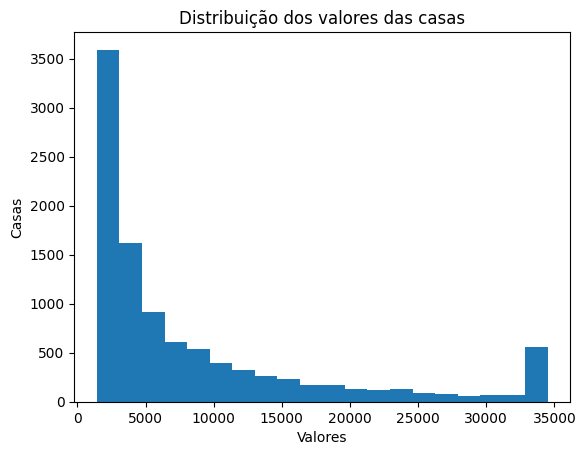

In [ ]:
# Histograma da variável Credit_Limit, dropna() para não levar os dados ausentes e bins é a quantidade de barras.
plt.hist(df_menor['Credit_Limit'].dropna(), bins=20)
plt.title('Distribuição dos valores das casas')
plt.ylabel('Casas')
plt.xlabel('Valores')
plt.show()

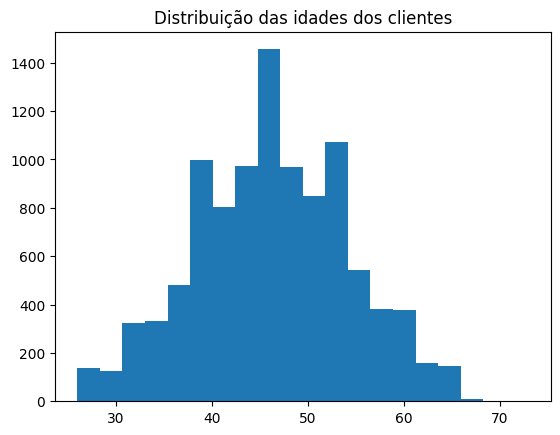

In [ ]:
# Histograma da variável GarageType, dropna() para não levar os dados ausentes e bins é a quantidade de barras.
plt.hist(df_menor['Customer_Age'].dropna(), bins=20)
plt.title('Distribuição das idades dos clientes')
plt.show()

### Subplots

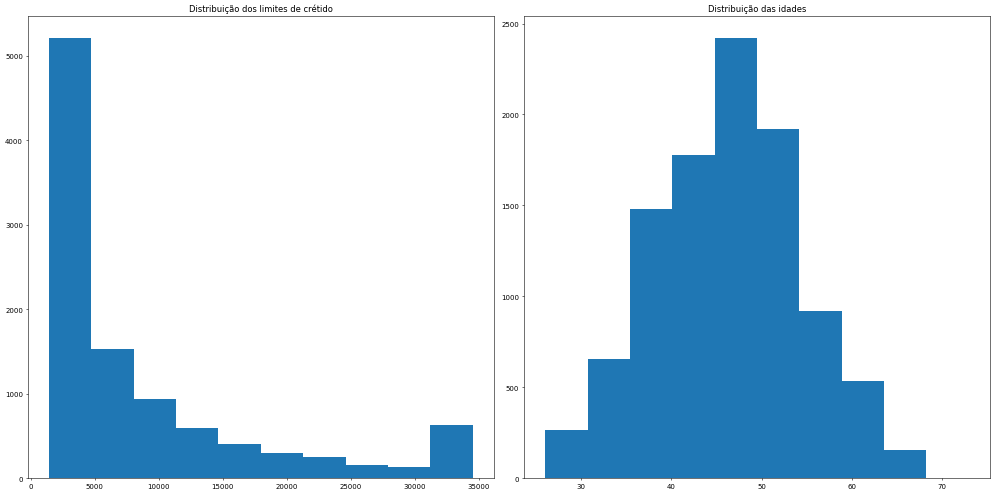

In [ ]:
# 1º forma de criar subplots.

####################################### Atenção: esse comando plt.subplot(1,2,1) significa:
# 1,2,1: Este é um argumento para a função subplot() - define a disposição da grade dos subplots na figura. Neste caso:
# O primeiro número (1) especifica o número de linhas na grade de subplots.
# O segundo número (2) especifica o número de colunas na grade de subplots.
# O terceiro número (1) especifica a posição deste subplot específico na grade, contando de cima para baixo e da esquerda para a direita.

####################################### Atenção: esse comando plt.subplot(1,2,2) significa:
# 1,2,2: Este é um argumento para a função subplot() - define a disposição da grade dos subplots na figura. Neste caso:
# O primeiro número (1) especifica o número de linhas na grade de subplots.
# O segundo número (2) especifica o número de colunas na grade de subplots.
# O terceiro número (2) especifica a posição deste subplot específico na grade, contando de cima para baixo e da esquerda para a direita.

# Cria a figura para plot com altura e largura e qualidade(dpi)
plt.figure(figsize=(20,10), dpi=50)

# 1 linha, 2 coluna, 1º Grafico
plt.subplot(1,2,1)
# Histograma da variável Credit_Limit
plt.hist(df_menor['Credit_Limit'].dropna())
# Titulo do Grafico 1
plt.title('Distribuição dos limites de crétido')

# 1 linha, 2 coluna, 2º Grafico
plt.subplot(1,2,2)
# Histograma da variável Customer_Age
plt.hist(df_menor['Customer_Age'].dropna())
# Titulo do Grafico 2
plt.title('Distribuição das idades')

plt.tight_layout()
plt.show()

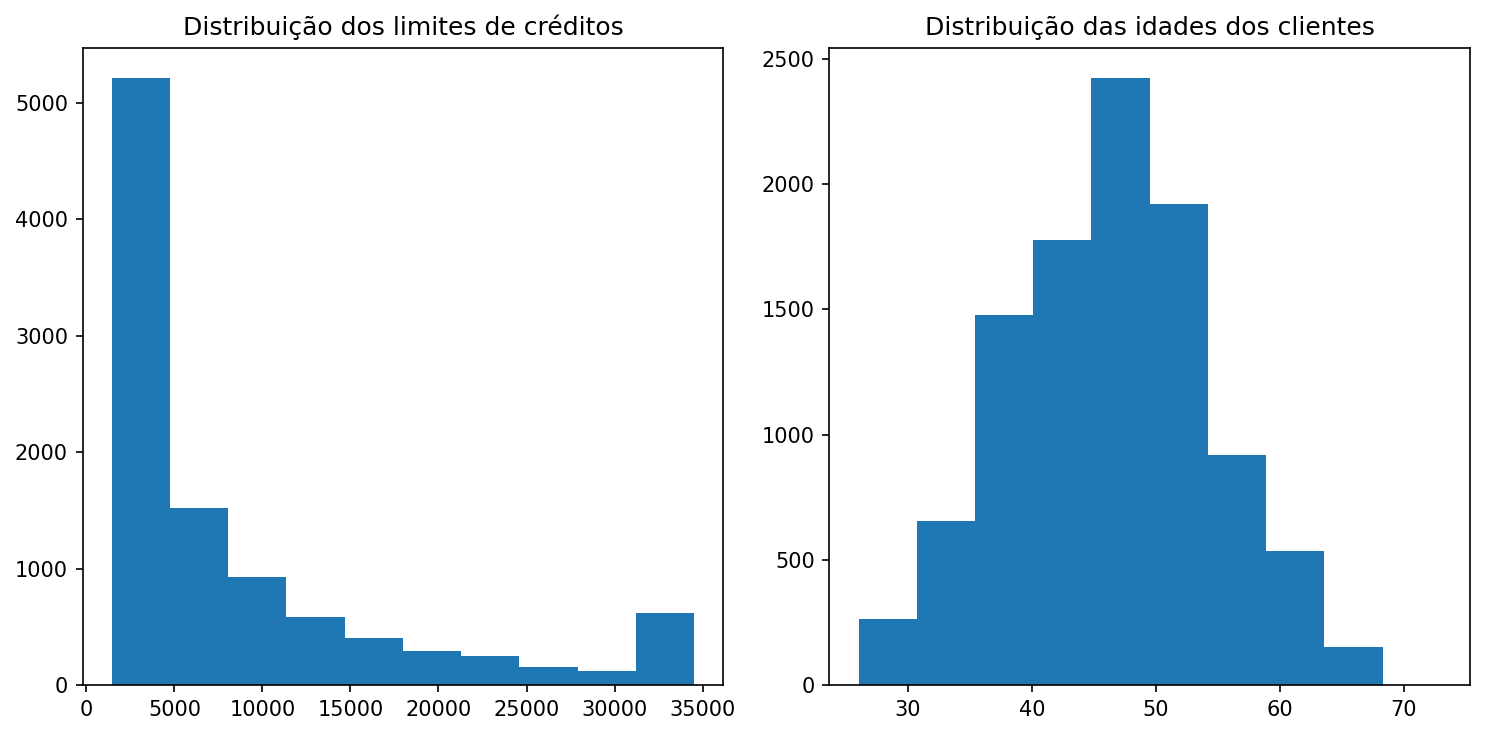

In [ ]:
# 2º Forma de criar subplots

# Cria uma figura (f) e um array de dois eixos (ax) com uma linha e duas colunas, o que significa que estamos criando dois subplots lado a lado.
# O parâmetro figsize define o tamanho da figura como 10 polegadas de largura por 5 polegadas de altura, e dpi define a resolução da figura.
f, ax = plt.subplots(1,2, figsize=(10,5), dpi=150)

# Cria um histograma dos valores na coluna 'Credit_Limit' do DataFrame df_menor e o desenha no primeiro subplot (índice 0) criado anteriormente.
ax[0].hist(df_menor['Credit_Limit'].dropna())
# Define o título do primeiro subplot como 'Distribuição dos limites de créditos'.
ax[0].set_title('Distribuição dos limites de créditos')

# Cria um histograma dos valores na coluna 'Customer_Age' do DataFrame df_menor e o desenha no segundo subplot (índice 1) criado anteriormente.
ax[1].hist(df_menor['Customer_Age'].dropna())
# Define o título do segundo subplot como 'Distribuição das idades dos clientes'.
ax[1].set_title('Distribuição das idades dos clientes')

# Ajusta automaticamente a posição dos subplots para evitar sobreposição de elementos.
plt.tight_layout()
# Exibe a figura com os subplots.
plt.show()

In [ ]:
##################################################################################################
###### ATENÇÃO = COMPILAR COM NÚMERO PEQUENO DE VARIÁVEIS! SUGIRO 4, POIS LEVA ALGUNS MINUTOS
##################################################################################################

# Gera distribuição de todas as variáveis, comando demorado para muitas colunas
sns.pairplot(df_menor)

<Axes: xlabel='Card_Category', ylabel='count'>

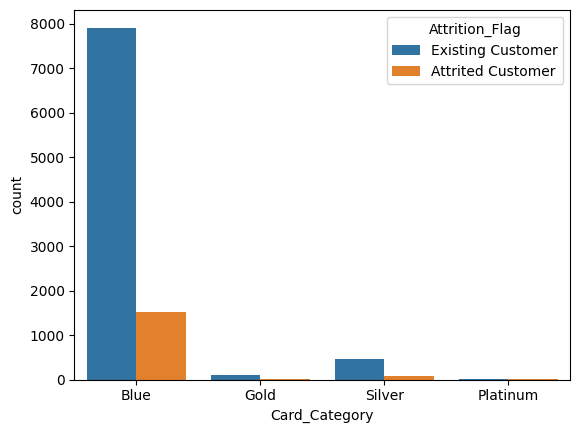

In [ ]:
# Grafico de barras com divisão por uma variável categorica
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=df_menor)

<Axes: xlabel='Card_Category', ylabel='Credit_Limit'>

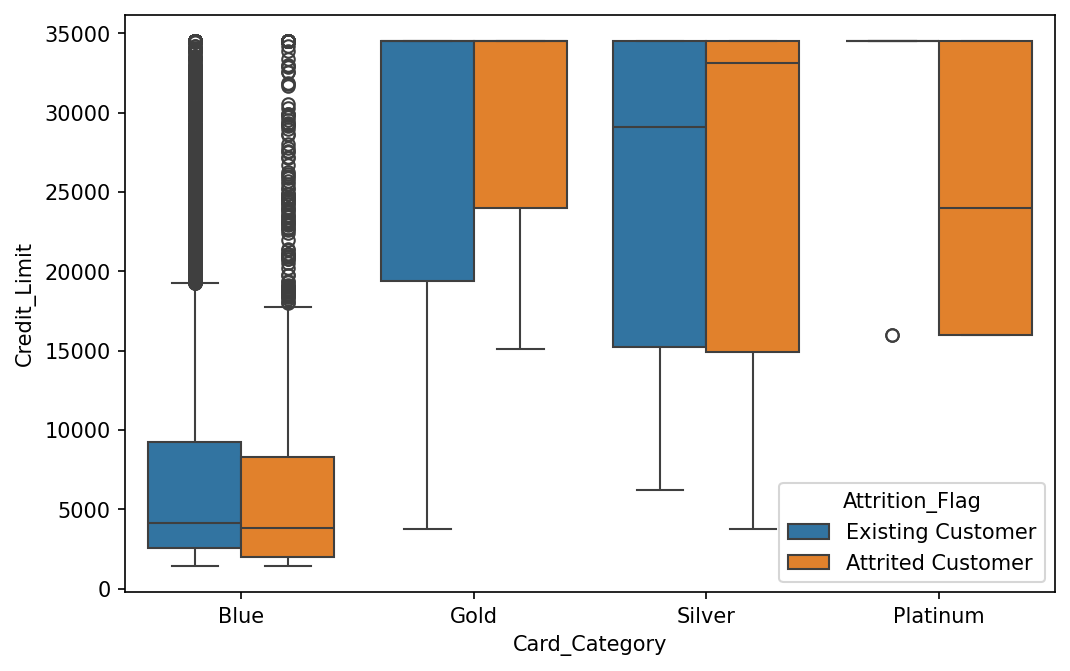

In [ ]:
# Boxplot (quartis) da variável Card_Category e Credit_Limit com segmentação pela variável Attrition_Flag.
plt.figure(figsize=(8,5), dpi=150)
sns.boxplot(x='Card_Category', y='Credit_Limit', hue='Attrition_Flag', data=df_menor)

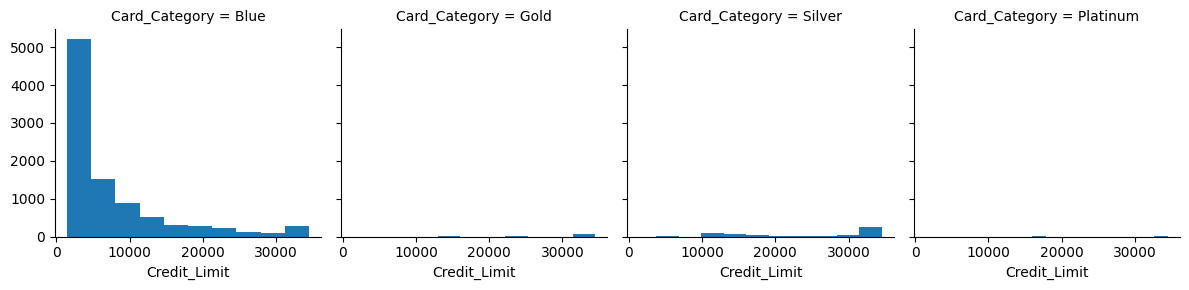

In [ ]:
# Histogramas
# Cria um objeto que terá as classes da variável passada, neste caso 5 classes (Card_Category)
g = sns.FacetGrid(df_menor, col='Card_Category')

# Gera um histograma Credit_Limit
g.map(plt.hist,'Credit_Limit', bins=10)

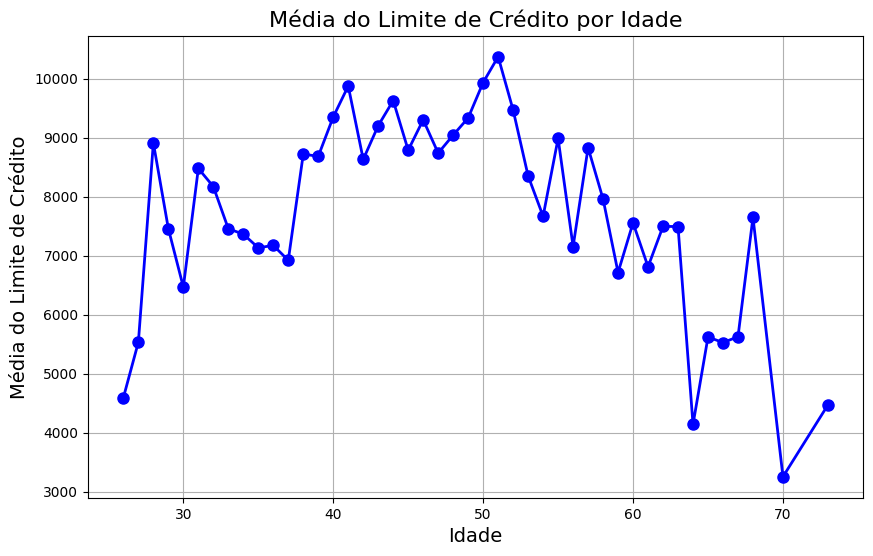

In [ ]:
# Gráfico de linhas
# Calcula a média do limite de crédito para cada idade
media_limite_credito_por_idade = df.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()

# Cria o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(media_limite_credito_por_idade['Customer_Age'], media_limite_credito_por_idade['Credit_Limit'],
         marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.title('Média do Limite de Crédito por Idade', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Média do Limite de Crédito', fontsize=14)
plt.grid(True)  # Adiciona grades ao gráfico
plt.show()

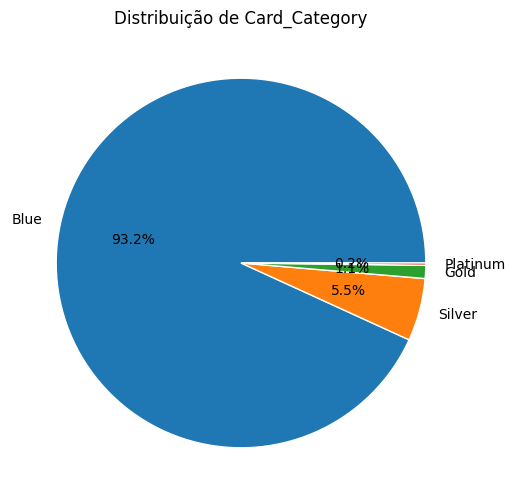

In [ ]:
# Gráfico de pizza ou de setores
# Calcula a contagem de ocorrências de cada categoria
contagem_categorias = df['Card_Category'].value_counts()

# Cria o gráfico de setores
plt.figure(figsize=(8, 6))
contagem_categorias.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab10.colors, wedgeprops=dict(edgecolor='w'))
plt.title('Distribuição de Card_Category')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.show()

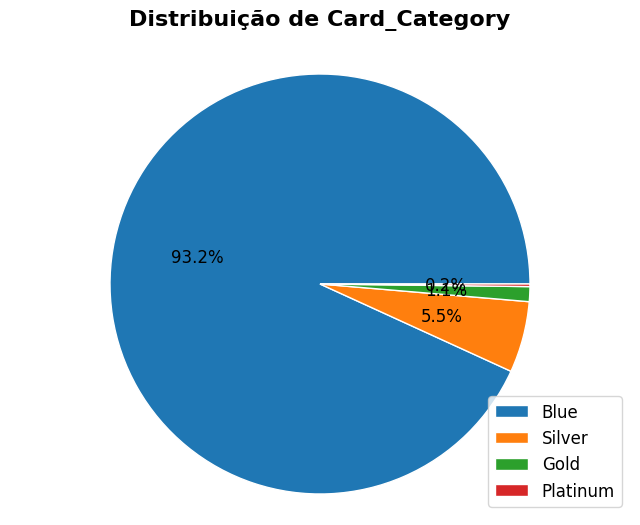

In [ ]:
# Gráfico de pizza ou de setores - mais opções
# Calcula a contagem de ocorrências de cada categoria
contagem_categorias = df['Card_Category'].value_counts()

# Cores para cada categoria
cores = plt.cm.tab10.colors

# Cria o gráfico de setores
plt.figure(figsize=(8, 6))
_, _, texto = plt.pie(contagem_categorias, autopct='%1.1f%%', colors=cores, wedgeprops=dict(edgecolor='w'))

# Formatação do texto dentro do gráfico de setores
for t in texto:
    t.set_fontsize(12)
    t.set_color('black')

plt.title('Distribuição de Card_Category', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')  # Faz com que o gráfico seja desenhado como um círculo
plt.legend(contagem_categorias.index, loc='best', fontsize=12)
plt.show()

# Correlação

In [ ]:
# Tabela com a correlação entre as variáveis duas a duas
df_menor.corr()

<ipython-input-61-c0781eb30a41>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_menor.corr()


,Avg_Open_To_Buy,Avg_Utilization_Ratio,ID,Contacts_Count_12_mon,Credit_Limit,Customer_Age,Dependent_count,Months_Inactive_12_mon,Months_on_book,Card_Category_num
Avg_Open_To_Buy,1.000000,-0.538808,0.005633,0.025646,0.995981,0.001151,0.068291,-0.016605,0.006732,0.489985
Avg_Utilization_Ratio,-0.538808,1.000000,0.000266,-0.055471,-0.482965,0.007114,-0.037135,-0.007503,-0.007541,-0.198711
ID,0.005633,0.000266,1.000000,0.005694,0.005708,0.007613,0.006772,0.005729,0.134588,0.002086
Contacts_Count_12_mon,0.025646,-0.055471,0.005694,1.000000,0.020817,-0.018452,-0.040505,0.029493,-0.010774,-0.000442
Credit_Limit,0.995981,-0.482965,0.005708,0.020817,1.000000,0.002476,0.068065,-0.020394,0.007507,0.492446
Customer_Age,0.001151,0.007114,0.007613,-0.018452,0.002476,1.000000,-0.122254,0.054361,0.788912,-0.018235
Dependent_count,0.068291,-0.037135,0.006772,-0.040505,0.068065,-0.122254,1.000000,-0.010768,-0.103062,0.030469
Months_Inactive_12_mon,-0.016605,-0.007503,0.005729,0.029493,-0.020394,0.054361,-0.010768,1.000000,0.074164,-0.014629
Months_on_book,0.006732,-0.007541,0.134588,-0.010774,0.007507,0.788912,-0.103062,0.074164,1.000000,-0.012535
Card_Category_num,0.489985,-0.198711,0.002086,-0.000442,0.492446,-0.018235,0.030469,-0.014629,-0.012535,1.000000


<ipython-input-62-ec0032a626f9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_menor.corr()


<Axes: >

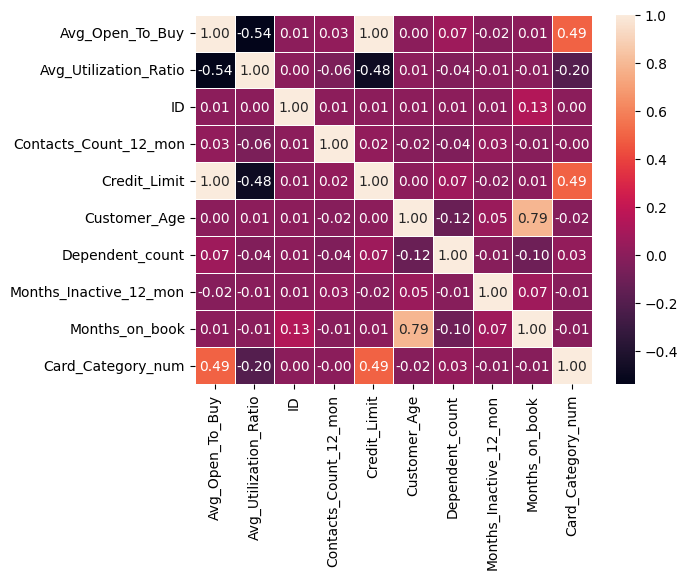

In [ ]:
# plot da matriz de correlação

# análise de correlação

correlation = df_menor.corr()

plot = sns.heatmap(correlation, annot = True, fmt=".2f", linewidths=.6)
plot

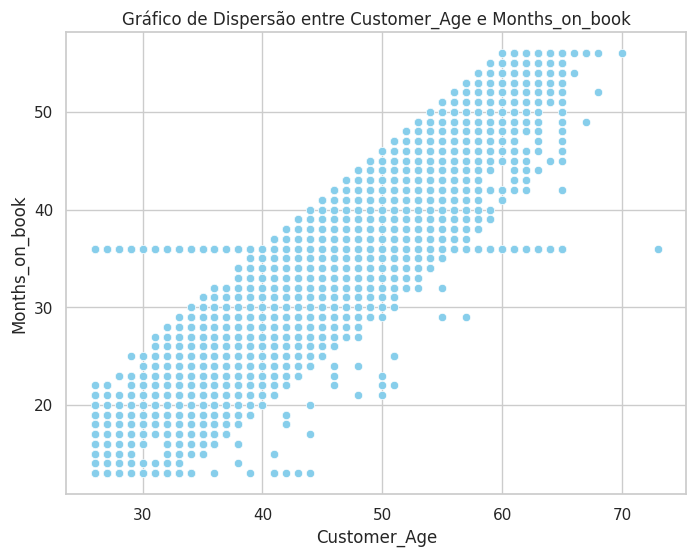

In [ ]:
# Define o estilo estético do Seaborn
sns.set(style="whitegrid")

# Cria o gráfico de dispersão usando o Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Customer_Age', y='Months_on_book', data=df_menor, color='skyblue')
plt.title('Gráfico de Dispersão entre Customer_Age e Months_on_book')
plt.xlabel('Customer_Age')
plt.ylabel('Months_on_book')
plt.show()